<h1 style="font-size:20px;">Análisis de series originales</h1>

In [2]:
pip install torch

   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.2 MB 1.4 MB/s eta 0:02:30
   ---------------------------------------- 0.1/204.2 MB 825.8 kB/s eta 0:04:08
   ---------------------------------------- 0.1/204.2 MB 1.2 MB/s eta 0:02:48
   ---------------------------------------- 0.2/204.2 MB 1.3 MB/s eta 0:02:44
   ---------------------------------------- 0.4/204.2 MB 1.9 MB/s eta 0:01:49
   ---------------------------------------- 0.5/204.2 MB 2.0 MB/s eta 0:01:42
   ---------------------------------------- 1.0/204.2 MB 3.3 MB/s eta 0:01:02
   ---------------------------------------- 1.4/204.2 MB 3.9 MB/s eta 0:00:52
   ---------------------------------------- 2.1/204.2 MB 5.0 MB/s eta 0:00:41
    --------------------------------------- 3.5/204.2 MB 7.7 MB/s eta 0:00:27
    --------------------------------------- 4.3/204.2 MB 8.6 MB/s eta 0:00:24
   - -------------------------------------- 5.3/204.2 MB 9.8 MB/s eta

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sktime.transformations.panel.rocket import MiniRocket

# Generamos datos de prueba (N muestras, L longitud de serie)
N, L = 100, 100
X = np.random.randn(N, L)  # Simulación de una serie temporal
y = np.random.randint(0, 2, size=N)  # Etiquetas binarias

# Aplicamos MiniRocket
minirocket = MiniRocket(num_features=10000)
X_transformed = minirocket.fit_transform(X)

# Entrenamos la Regresión Logística
clf = LogisticRegression(max_iter=1000)
clf.fit(X_transformed, y)

# Extraemos los pesos aprendidos
W = clf.coef_.flatten()

# Calculamos la importancia de cada característica
feature_importance = np.abs(W)

# Graficamos las características más importantes
plt.figure(figsize=(10,5))
plt.bar(range(20), feature_importance[:20])
plt.xlabel("Índice de Característica")
plt.ylabel("Importancia Absoluta del Peso")
plt.title("Top 20 Características Más Importantes en MiniRocket")
plt.show()

# Convertimos X_transformed en tensor para calcular gradientes
X_tensor = torch.tensor(X_transformed, dtype=torch.float32, requires_grad=True)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Definir el modelo en PyTorch
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self, num_features):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel(num_features=10000)
output = model(X_tensor)

# Calcular la pérdida y retropropagar
loss = torch.nn.BCELoss()(output.flatten(), y_tensor)
loss.backward()

# Obtener los gradientes con respecto a X_transformed
gradientes = X_tensor.grad.numpy()

# Graficamos la importancia de la serie original en la predicción
plt.plot(np.mean(np.abs(gradientes), axis=0))
plt.xlabel("Índice de Característica")
plt.ylabel("Importancia de Gradiente")
plt.title("Importancia de la Serie Original en MiniRocket")
plt.show()


C:\Users\Rodne\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


TypeError: MiniRocket.__init__() got an unexpected keyword argument 'num_features'

<h1>Medición de la carga cognitiva de ciertas tareas mediante métodos alternativos e indirectos.</h1>


In [2]:
#Declaraciones

from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
from datetime import datetime
import os
import math
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("""
<style>
div.output_scroll {
    height: auto;  
}
</style>
"""))
folder_directory = 'C:\\Users\\Rodne\\Desktop\\drawings\\' #directorio de las series temporales 
tiempos = []
series = dict()

archivoCoordenadas='P12-NumericoDificil-12-15-2023-T14-44-59.816.txt'
nombre_archivo_elegido = archivoCoordenadas
clave_especifica=archivoCoordenadas
clave_elegida=archivoCoordenadas
archivos = os.listdir(folder_directory)

freq = '0.0150S'  # Frecuencia de resampling, ajusta según tus necesidades

<h1 style="font-size:15px;">Histograma de duraciones de series originales</h1>

Duración de la serie más larga 120.0
Duración de la serie más pequeña 102.049
240


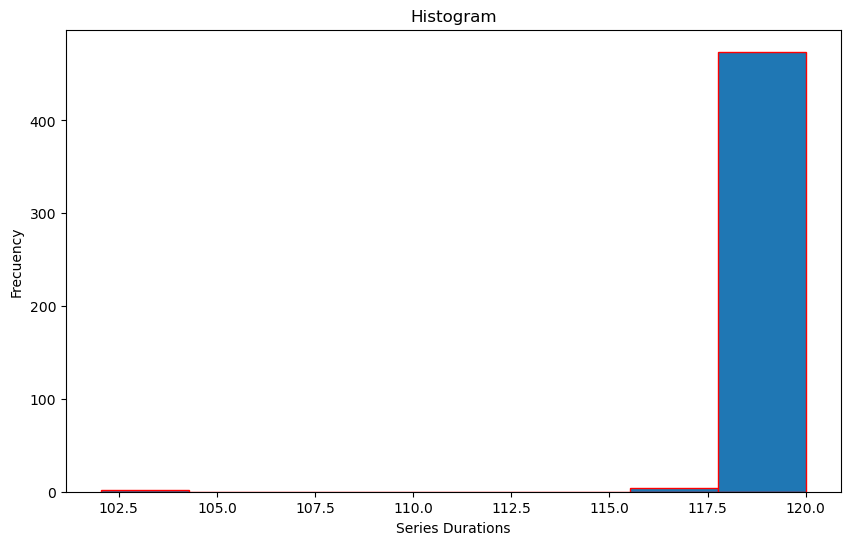

In [4]:
for archivo in archivos:
    if archivo.endswith('.txt'):
        ruta_completa = folder_directory + archivo
        df_tmp = pd.read_csv(ruta_completa, header=None, names=['x', 'y', 'timestamp'])
        series[archivo] = df_tmp
        if df_tmp.shape[0] > 0 and df_tmp.shape[1] == 3:
            instante_inicial = df_tmp.iloc[0, 2]
            instante_final = df_tmp.iloc[-1, 2]
            diferencia_seg = (instante_final - instante_inicial) / 1000.0  # Conversión a segundos
            tiempos.append(diferencia_seg)
        

print("Duración de la serie más larga " + str(max(tiempos)))
print("Duración de la serie más pequeña " + str(min(tiempos)))
print(len(archivos))
plt.figure(figsize=(10, 6))
plt.hist(tiempos, bins=len(set(tiempos)), edgecolor='red')
# Personalizacion del histograma
plt.xlabel('Series Durations')
plt.ylabel('Frecuency')
plt.title('Histogram')

# Mostrar el histograma
plt.show()


<h1 style="font-size:15px;">Eliminacion de outsiders en porcentaje tanto al inicio como al final</h1>

Archivos eliminados después de aplicar percentiles:


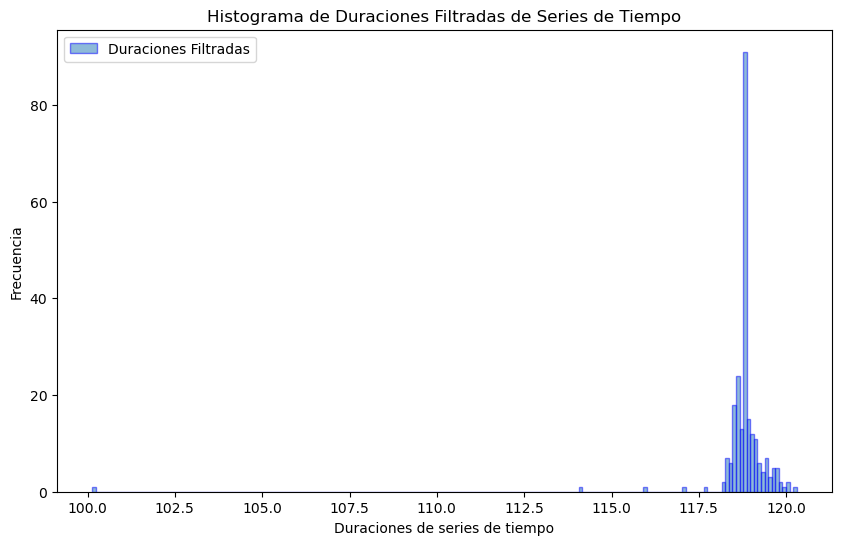

0
Cantidad de series de tiempo luego del tratamiento de datos: 240


In [6]:
porcentaje_eliminacion = 0.5  # Puedes cambiar este valor a 0 para no eliminar ningún dato
archivos = [f for f in os.listdir(folder_directory) if f.endswith('.txt')]

# Estructura para almacenar las duraciones de las series filtradas y los nombres de archivos correspondientes
duraciones_y_archivos = []

for archivo in archivos:
    ruta_completa = os.path.join(folder_directory, archivo)
    df = pd.read_csv(ruta_completa, header=None, names=['x', 'y', 'timestamp'])

    # Eliminar porcentajes de datos del inicio y final solo si el porcentaje no es 0
    num_datos = len(df)
    if porcentaje_eliminacion > 0:
        datos_a_eliminar = int(np.floor(porcentaje_eliminacion / 100 * num_datos))
        df_filtrada = df[datos_a_eliminar:-datos_a_eliminar]
    else:
        df_filtrada = df.copy()

    # Calcular la duración de la serie filtrada
    if not df_filtrada.empty:
        duracion = (df_filtrada['timestamp'].iloc[-1] - df_filtrada['timestamp'].iloc[0]) / 1000.0
        duraciones_y_archivos.append((duracion, archivo))

# Aplicar el filtro de percentiles
duraciones = [d[0] for d in duraciones_y_archivos]
percentil_inicio = np.percentile(duraciones, 0)
percentil_fin = np.percentile(duraciones, 100)

# Identificar los archivos que cumplen con el filtro de percentiles
archivos_filtrados = [archivo for duracion, archivo in duraciones_y_archivos if percentil_inicio <= duracion <= percentil_fin]

# Conjuntos para identificar los archivos eliminados
archivos_antes = set(archivos)
archivos_despues = set(archivos_filtrados)
archivos_eliminados = archivos_antes - archivos_despues

# Imprimir los archivos eliminados
print("Archivos eliminados después de aplicar percentiles:")
for archivo in archivos_eliminados:
    print(archivo)

# Visualización de histograma de duraciones filtradas
tiempos_filtrados = [duracion for duracion, _ in duraciones_y_archivos if percentil_inicio <= duracion <= percentil_fin]
plt.figure(figsize=(10, 6))
plt.hist(tiempos_filtrados, bins=len(set(tiempos_filtrados)), edgecolor='blue', alpha=0.5, label='Duraciones Filtradas')
plt.xlabel('Duraciones de series de tiempo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duraciones Filtradas de Series de Tiempo')
plt.legend()
plt.show()
print(len(archivos_eliminados))
print(f'Cantidad de series de tiempo luego del tratamiento de datos: {len(archivos_filtrados)}')

<h1 style="font-size:20px;">RESAMPLING</h1>

<h1 style="font-size:15px;">Graficas de serie de tiempo filtrada sin resampling</h1>

Cantidad de puntos originales:7115


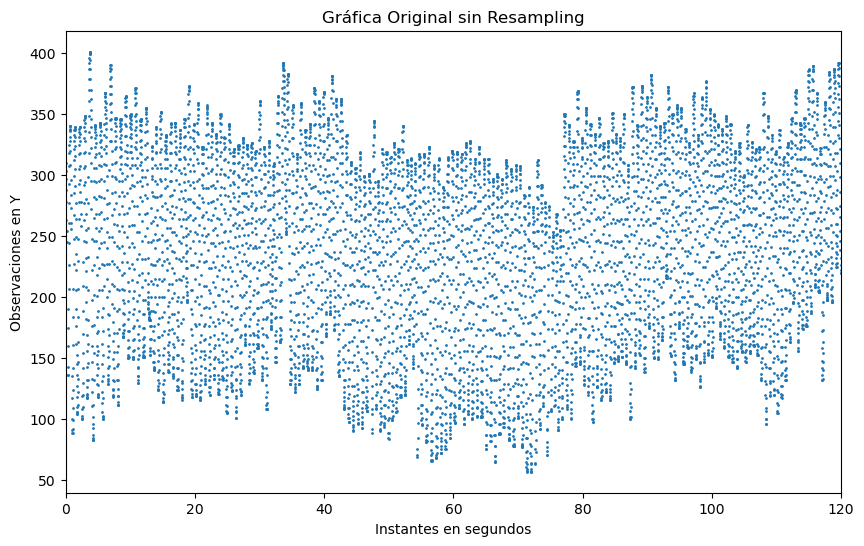

In [7]:
# Cargar datos originales
df_original = pd.read_csv('C:\\Users\\USER\\Desktop\\drawings\\'+archivoCoordenadas, header=None, names=['x', 'y', 'timestamp'])

# Convertir timestamp a datetime
df_original['timestamp'] = pd.to_datetime(df_original['timestamp'], unit='ms')

# Convertir timestamp a segundos para el eje X
df_original['segundos'] = (df_original['timestamp'] - df_original['timestamp'].min()).dt.total_seconds()
print('Cantidad de puntos originales:'+ str(len(df_original)))
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(df_original['segundos'], df_original['y'], s=1)
plt.xlabel('Instantes en segundos')
plt.ylabel('Observaciones en Y')
plt.title('Gráfica Original sin Resampling')
plt.xlim(0, 120)
plt.show()

<h1 style="font-size:15px;">Proceso de resampling</h1>


In [8]:
series_resampled = dict()

# Considerar solo los archivos que no fueron eliminados
archivos_no_eliminados = set(archivos) - archivos_eliminados

for archivo in archivos_no_eliminados:
    ruta_completa = os.path.join(folder_directory, archivo)
    df = pd.read_csv(ruta_completa, header=None, names=['x', 'y', 'timestamp'])

    # Eliminación de porcentajes de datos
    num_datos = len(df)
    datos_a_eliminar = int(np.floor(porcentaje_eliminacion / 100 * num_datos))
    # Asegurarse de trabajar con una copia para evitar SettingWithCopyWarning
    df_filtrada = df[datos_a_eliminar:-datos_a_eliminar].copy()

    # Convertir timestamp a datetime y alinear serie
    df_filtrada["timestamp"] = pd.to_datetime(df_filtrada["timestamp"], unit="ms")
    instante_inicial = df_filtrada.iloc[0]["timestamp"]
    df_filtrada["timestamp"] = df_filtrada["timestamp"] - instante_inicial

    # Resampling e Interpolación
    df_filtrada.set_index('timestamp', inplace=True)
    df_resampled = df_filtrada.resample(freq).mean()
    df_resampled['x'] = df_resampled['x'].interpolate()
    df_resampled['y'] = df_resampled['y'].interpolate()
    df_resampled.reset_index(inplace=True)

    # Almacenar en el nuevo diccionario
    series_resampled[archivo] = df_resampled


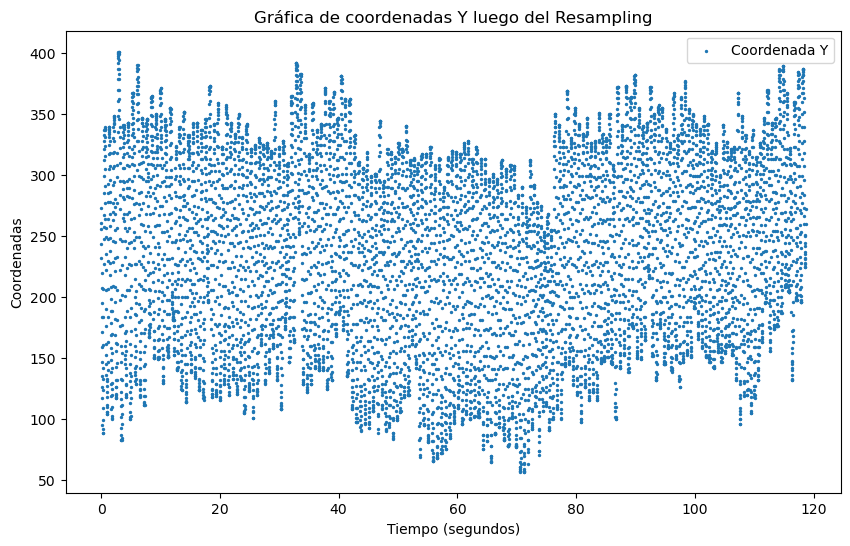

In [9]:
if nombre_archivo_elegido in series_resampled:
    serie_especifica = series_resampled[nombre_archivo_elegido]

    # Convierte los timestamps a segundos para el eje X
    serie_especifica['segundos'] = (serie_especifica['timestamp'] - serie_especifica['timestamp'].min()).dt.total_seconds()

    # Graficar puntos para las coordenadas X e Y
    plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico según sea necesario
    plt.scatter(serie_especifica['segundos'], serie_especifica['y'], label='Coordenada Y', s=2)  # s controla el tamaño de los puntos
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Coordenadas')
    plt.title(f'Gráfica de coordenadas Y luego del Resampling')
    plt.legend()
    plt.show()
else:
    print(f"No se encontró el archivo: {nombre_archivo_elegido}")

<h1 style="font-size:20px;">INTERPOLACION Y STRETCHING</h1> 

In [10]:
# Encuentra la longitud máxima entre todas las series
min_interpolacion= 0
max_interpolacion=1

max_valor = max([df.shape[0] for df in series_resampled.values()])
min_valor = min([df.shape[0] for df in series_resampled.values()])
print('Maximo valor de serie: '+str(max_valor))
print('Minimo valor de serie: '+str(min_valor))

# Diccionario para almacenar las series estiradas
series_estiradas = {}

# Estirar cada serie para que coincida con la longitud máxima
for key, df_tmp in series_resampled.items():
    tamano_serie_tmp = df_tmp.shape[0]
   
    
    # Crear ejes de interpolación
    x_shorter = np.linspace(0, 1, tamano_serie_tmp)
    x_longer = np.linspace(0, 1, max_valor)
    # Funciones de interpolación
    interpolatorx = interp1d(x_shorter, df_tmp['x'])
    interpolatory = interp1d(x_shorter, df_tmp['y'])

    # Interpolar para estirar la serie
    stretched_seriesx = interpolatorx(x_longer)
    stretched_seriesy = interpolatory(x_longer)

    # Crear un nuevo DataFrame
    df_nuevo = pd.DataFrame({'Eje uniforme': x_longer, 'x': stretched_seriesx, 'y': stretched_seriesy})
    series_estiradas[key] = df_nuevo
    

plt.show()
print(series_estiradas)

Maximo valor de serie: 8021
Minimo valor de serie: 6676
{'P3-SecuencialFacil-12-08-2023-T09-35-11.83.txt':       Eje uniforme           x           y
0         0.000000  549.000000  349.000000
1         0.000125  554.913217  343.086783
2         0.000249  559.855362  337.173566
3         0.000374  562.869825  331.260349
4         0.000499  564.884289  324.404988
...            ...         ...         ...
8016      0.999501  303.304748  269.651551
8017      0.999626  292.483561  265.078663
8018      0.999751  281.662374  260.505776
8019      0.999875  271.043392  256.202494
8020      1.000000  274.000000  270.000000

[8021 rows x 3 columns], 'P21-VerbalDificil-12-22-2023-T09-40-24.301.txt':       Eje uniforme           x           y
0         0.000000  570.000000  437.000000
1         0.000125  575.955112  430.052369
2         0.000249  581.910224  422.119701
3         0.000374  586.887781  414.179551
4         0.000499  589.910224  406.239401
...            ...         ...         ...


Cantidad de puntos luego del stretching: 8021


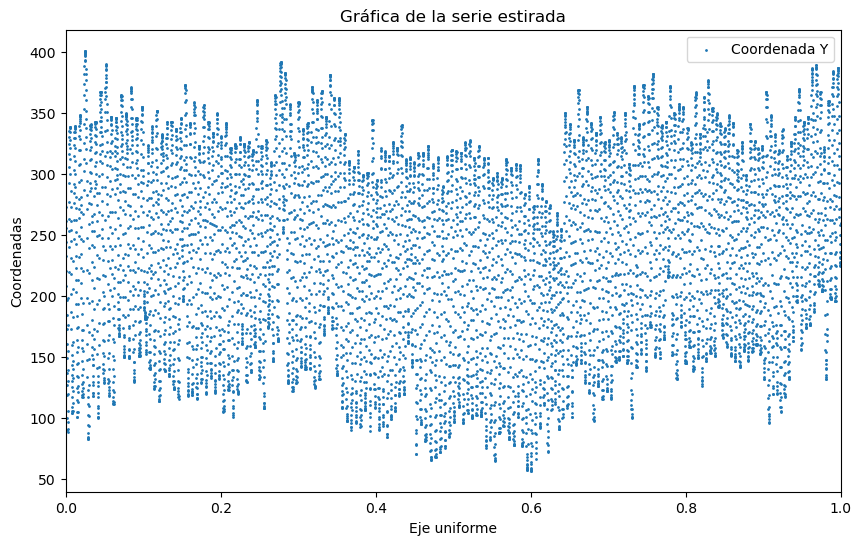

In [11]:


print('Cantidad de puntos luego del stretching: '+ str(len(series_estiradas[clave_elegida])))

if clave_elegida in series_estiradas:
    serie_estirada = series_estiradas[clave_elegida]

    # Crear una figura para la gráfica
    plt.figure(figsize=(10, 6))

    # Graficar las coordenadas X e Y en estilo de puntos
    
    plt.scatter(serie_estirada['Eje uniforme'], serie_estirada['y'], label='Coordenada Y', s=1)

    # Configurar etiquetas y título
    plt.xlabel('Eje uniforme')
    plt.ylabel('Coordenadas')
    plt.title(f'Gráfica de la serie estirada')
    plt.legend()
    plt.xlim(min_interpolacion, max_interpolacion)

    # Mostrar la gráfica
    plt.show()
else:
    print(f"La serie con clave '{clave_elegida}' no se encontró en el diccionario.")

Cantidad de puntos originales:7115 VS Cantidad de puntos luego del stretching: 8021


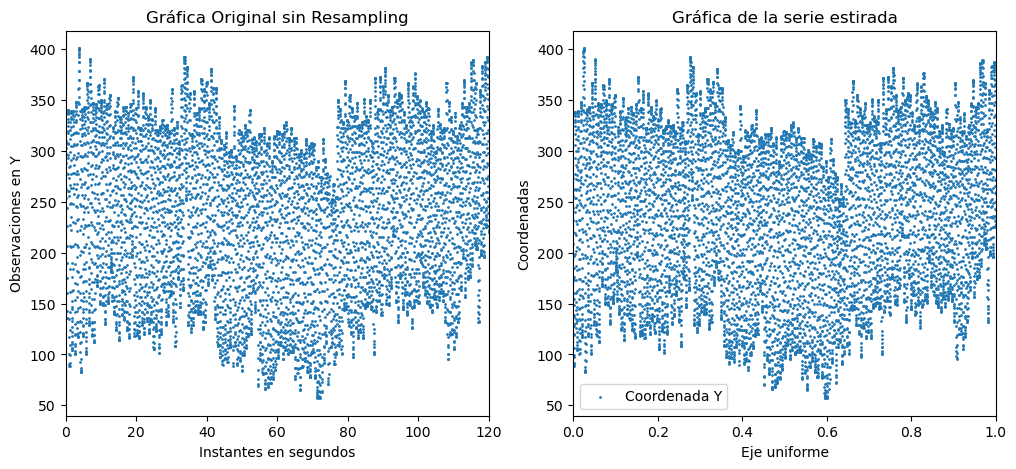

In [12]:
print('Cantidad de puntos originales:'+ str(len(df_original))+' VS '+'Cantidad de puntos luego del stretching: '+ str(len(series_estiradas[clave_elegida])))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Ajusta el tamaño según tus necesidades
# Gráfica 1: Gráfica Original sin Resampling
axes[0].scatter(df_original['segundos'], df_original['y'], s=1)
axes[0].set_xlabel('Instantes en segundos')
axes[0].set_ylabel('Observaciones en Y')
axes[0].set_title('Gráfica Original sin Resampling')
axes[0].set_xlim(0, 120)


serie_estirada = series_estiradas[archivoCoordenadas]
# Gráfica 2: Gráfica de la serie estirada
axes[1].scatter(serie_estirada['Eje uniforme'], serie_estirada['y'], label='Coordenada Y', s=1)
axes[1].set_xlabel('Eje uniforme')
axes[1].set_ylabel('Coordenadas')
axes[1].set_title('Gráfica de la serie estirada')
axes[1].legend()
axes[1].set_xlim(0, 1)


# Mostrar las gráficas
plt.show()

<h1 style="font-size:20px;">PROCESO DE ETIQUETADO</h1>

<h1 style="font-size:16px;">ETIQUETAS POR DIFICULTAD DE LAS TAREAS: "FACIL" y "DIFICIL"</h1>

In [29]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
print(df_final[columnas_seleccionadas])

        X1          X2       Y8020       Y8021 etiqueta
0    488.0  499.848878  280.214090  297.000000    facil
1    593.0  593.000000  230.912718  224.000000    facil
2    399.5  398.759445  463.924439  458.000000  dificil
3    395.0  394.026933  205.676808  194.000000    facil
4    333.0  322.133042  182.721820  160.000000  dificil
..     ...         ...         ...         ...      ...
235  411.0  408.037781  308.125935  318.000000    facil
236  481.5  475.327151  335.925935  330.000000  dificil
237  383.0  388.947631  185.897423  183.333333  dificil
238  289.0  298.381546  355.344140  343.000000    facil
239  555.0  571.815586  180.338224  182.000000  dificil

[240 rows x 5 columns]


In [32]:
import numpy as np
import pandas as pd


X = df_final.drop(columns=['etiqueta']).values
y = df_final['etiqueta'].values
X_reshaped = X.reshape(-1, 2, max_len_x)
X_reshaped = X_reshaped.astype(np.float32)

In [74]:
print(X_reshaped.shape)

(240, 2, 8021)


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


params = fit(X_reshaped, num_features=1000, max_dilations_per_kernel=2)
X_transformed = transform(X_reshaped, params)
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


classifier = RandomForestClassifier() 
classifier.fit(X_train_transformed, y_train)

y_pred = classifier.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7361111111111112


In [73]:
scores = cross_val_score(classifier, X_transformed, y, cv=10)
print(scores)
accuracy_average = np.mean(scores)
print(f'Accuracy promedio con validación cruzada: {accuracy_average}')

[0.75       0.79166667 0.66666667 0.75       0.66666667 0.58333333
 0.54166667 0.75       0.58333333 0.79166667]
Accuracy promedio con validación cruzada: 0.6875


In [353]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 1000  # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RidgeClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

Scores de cross-validation: [0.66666667 0.66666667 0.75       0.70833333 0.79166667 0.75
 0.625      0.83333333 0.625      0.625     ]
Promedio de los scores: 0.7041666666666667


<h1 style="font-size:16px;">Clasificador RandomForest</h1>

In [354]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 1000  # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

Scores de cross-validation: [0.625      0.70833333 0.66666667 0.70833333 0.75       0.75
 0.625      0.83333333 0.58333333 0.70833333]
Promedio de los scores: 0.6958333333333333


<h1 style="font-size:16px;">Grafico RandomForest y Ridge Classifier</h1>

In [32]:
numKernels= [100,500,1000,5000,10000,50000,100000]



ridgeClassifierxy = [[0.75, 0.75, 0.70833333, 0.66666667, 0.75, 0.70833333,
 0.75, 0.58333333, 0.66666667, 0.66666667], [0.66666667, 0.66666667, 0.6666666, 0.70833333, 0.75, 0.70833333, 0.75, 
0.54166667, 0.58333333, 0.75], [0.54166667, 0.70833333, 0.70833333, 0.79166667, 0.75, 0.58333333, 0.66666667, 0.66666667,
0.75, 0.70833333], [0.75, 0.625, 0.625, 0.79166667, 0.70833333, 0.58333333, 0.625, 
0.54166667, 0.70833333, 0.83333333],[0.58333333, 0.70833333, 0.66666667, 0.79166667, 
0.75, 0.70833333, 0.625, 0.54166667, 0.625, 0.75],[0.70833333, 0.70833333, 0.70833333, 0.70833333, 0.79166667, 0.70833333,
0.75, 0.58333333, 0.58333333, 0.75], [0.58333333, 0.70833333, 0.75, 0.79166667, 
0.75, 0.70833333, 0.625, 0.58333333, 0.625, 0.75] ]


randomForestxy = [[0.79166667, 0.70833333, 0.75, 0.66666667, 0.79166667, 0.91666667, 
0.75, 0.66666667, 0.75, 0.83333333], [0.83333333, 0.70833333, 0.70833333, 0.66666667, 0.83333333, 0.95833333,
0.75, 0.70833333, 0.75, 0.75],[0.79166667, 0.75, 0.75, 0.75, 0.75, 0.91666667, 0.79166667, 
0.70833333, 0.79166667, 0.79166667], [0.75, 0.70833333, 0.83333333, 0.75, 0.75, 0.875,
0.79166667, 0.66666667, 0.79166667, 0.70833333],[0.83333333, 0.70833333, 0.70833333, 0.70833333, 0.75, 0.875,0.75, 0.66666667, 0.75, 0.625], [0.70833333, 0.70833333, 
0.70833333, 0.75, 0.875, 0.79166667, 0.75, 0.75, 0.66666667, 0.70833333], [0.83333333, 0.70833333, 
0.70833333, 0.70833333, 0.75, 0.875,0.75, 0.66666667, 0.75, 0.75]]



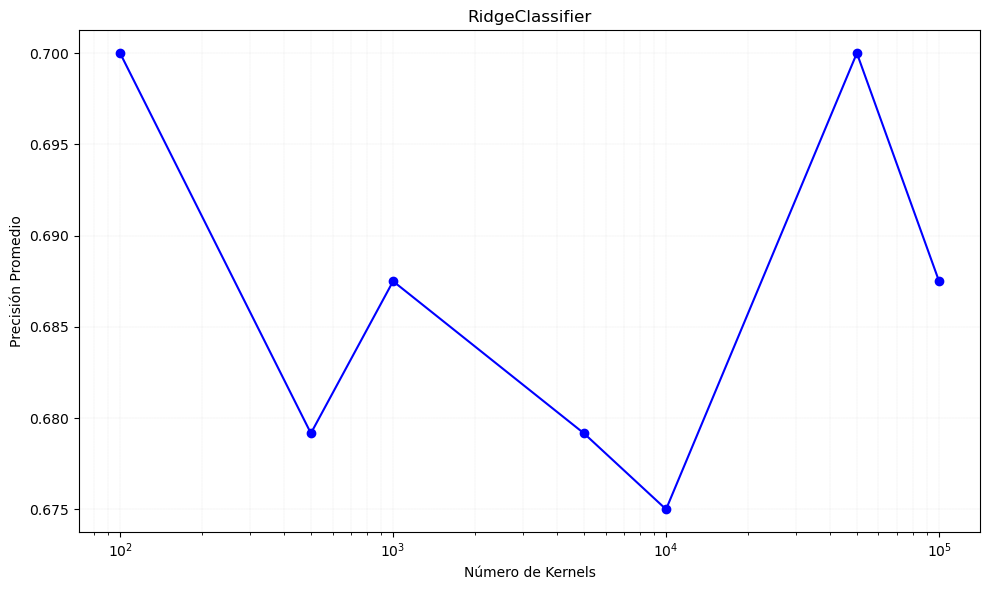

In [256]:
import matplotlib.pyplot as plt
import numpy as np



# Calcular el promedio de los valores en cada array interno
promedios = [np.mean(valores) for valores in ridgeClassifierxy]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('RidgeClassifier')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log')  # Escala logarítmica para el eje X debido a la amplia gama de valores
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


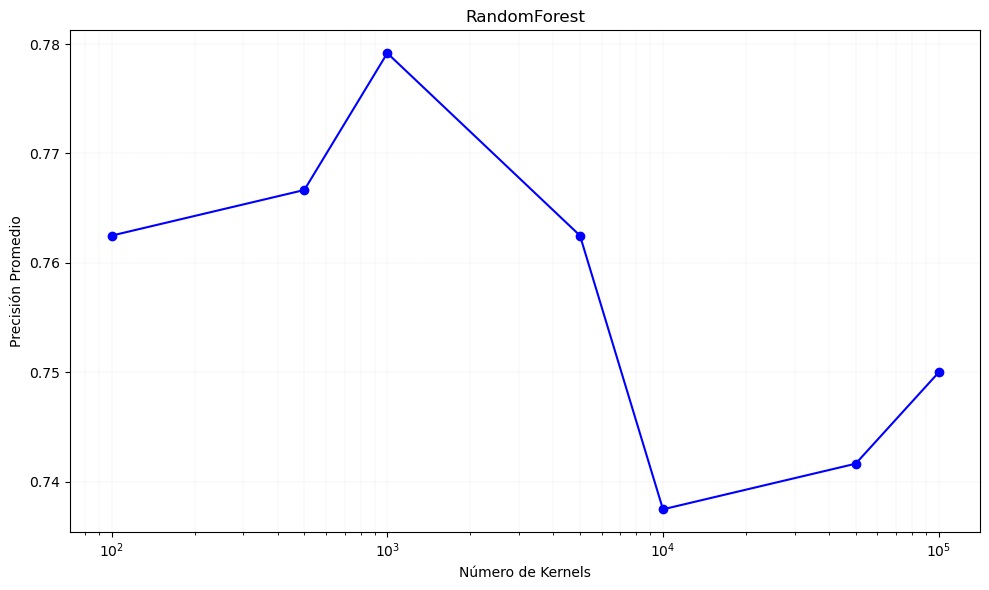

In [23]:
import matplotlib.pyplot as plt
import numpy as np



# Calcular el promedio de los valores en cada array interno
promedios = [np.mean(valores) for valores in randomForestxy]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log')  # Escala logarítmica para el eje X debido a la amplia gama de valores
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

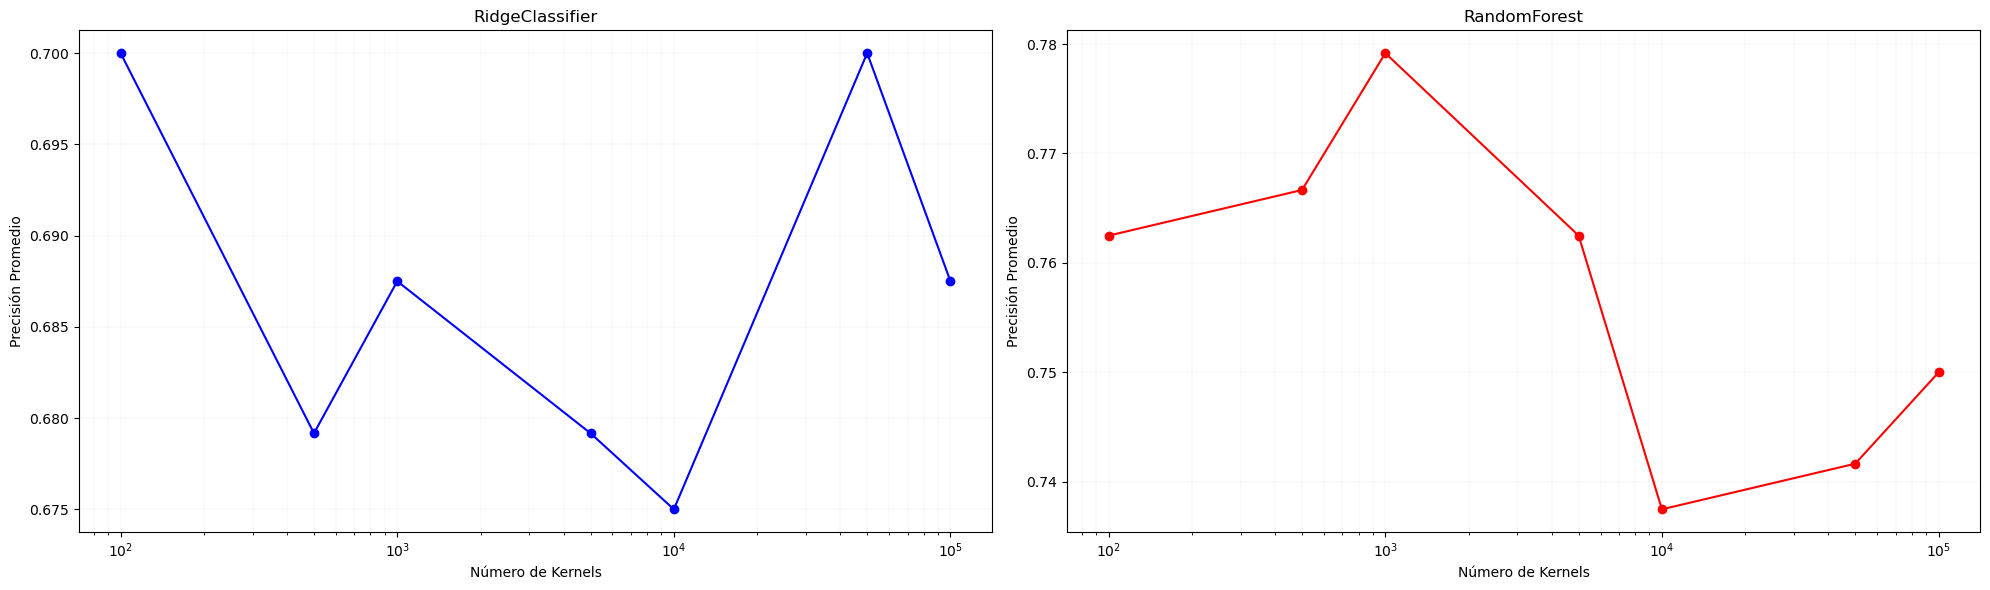

In [34]:

# Crear la figura general y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
promedios_ridgeClassifierxy = [np.mean(valores) for valores in ridgeClassifierxy]
promedios_randomForestxy = [np.mean(valores) for valores in randomForestxy]


# Primer subplot para ridgeClassifierxy
axs[0].plot(numKernels, promedios_ridgeClassifierxy, marker='o', linestyle='-', color='b')
axs[0].set_title('RidgeClassifier')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot para randomForestxy
axs[1].plot(numKernels, promedios_randomForestxy, marker='o', linestyle='-', color='r')
#axs[1].ylim(0.6,0.9)
axs[1].set_title('RandomForest')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

plt.tight_layout()
plt.show()

<h1 style="font-size:16px;">Coordenada X y Y RidgeClassifier</h1>

<h1 style="font-size:16px;">ANÁLISIS DE VELOCIDAD PARA AGREGAR NUEVO FEATURE"</h1>

In [77]:
import os
folder_directory = 'C:\\Users\\USER\\Desktop\\drawings\\' #directorio de las series temporales 

archivos_no_eliminados = [archivo for archivo in os.listdir(folder_directory) if archivo.endswith('.txt') and archivo not in archivos_eliminados]

# Función para calcular las velocidades instantáneas
def calcular_velocidades(df):
    velocidades = []
    for i in range(1, len(df)):
        x1, y1, t1 = df.iloc[i - 1][['x', 'y', 'timestamp']]
        x2, y2, t2 = df.iloc[i][['x', 'y', 'timestamp']]
        distancia = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        tiempo = (t2 - t1) / 1000.0  # Asumiendo que timestamp está en milisegundos
        if tiempo > 0:
            velocidad = distancia / tiempo
            velocidades.append(velocidad)
        else:
            velocidades.append(0)
    return velocidades

# Diccionario para almacenar las velocidades calculadas de cada archivo
velocidades_por_archivo = {}

# Calcular las velocidades para cada archivo
for archivo in archivos_no_eliminados:
    ruta_completa = os.path.join(folder_directory, archivo)
    df = pd.read_csv(ruta_completa, header=None, names=['x', 'y', 'timestamp'])
    velocidades = calcular_velocidades(df)
    velocidades_por_archivo[archivo] = velocidades

In [42]:
import numpy as np

def calcular_velocidades(df):
    velocidades = []
    for i in range(1, len(df)):
        x1, y1, t1 = df.iloc[i - 1][['x', 'y', 'Eje uniforme']]
        x2, y2, t2 = df.iloc[i][['x', 'y', 'Eje uniforme']]
        distancia = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        tiempo = t2 - t1  # Asumiendo que 'Eje uniforme' ya está en segundos
        if tiempo > 0:
            velocidad = distancia / tiempo
            velocidades.append(velocidad)
        else:
            velocidades.append(0)
    return velocidades

# Diccionario para almacenar las velocidades calculadas de cada archivo
velocidades_por_archivo = {}

# Calcular las velocidades para cada archivo en series_estiradas
for archivo, df in series_estiradas.items():
    velocidades = calcular_velocidades(df)
    velocidades_por_archivo[archivo] = velocidades


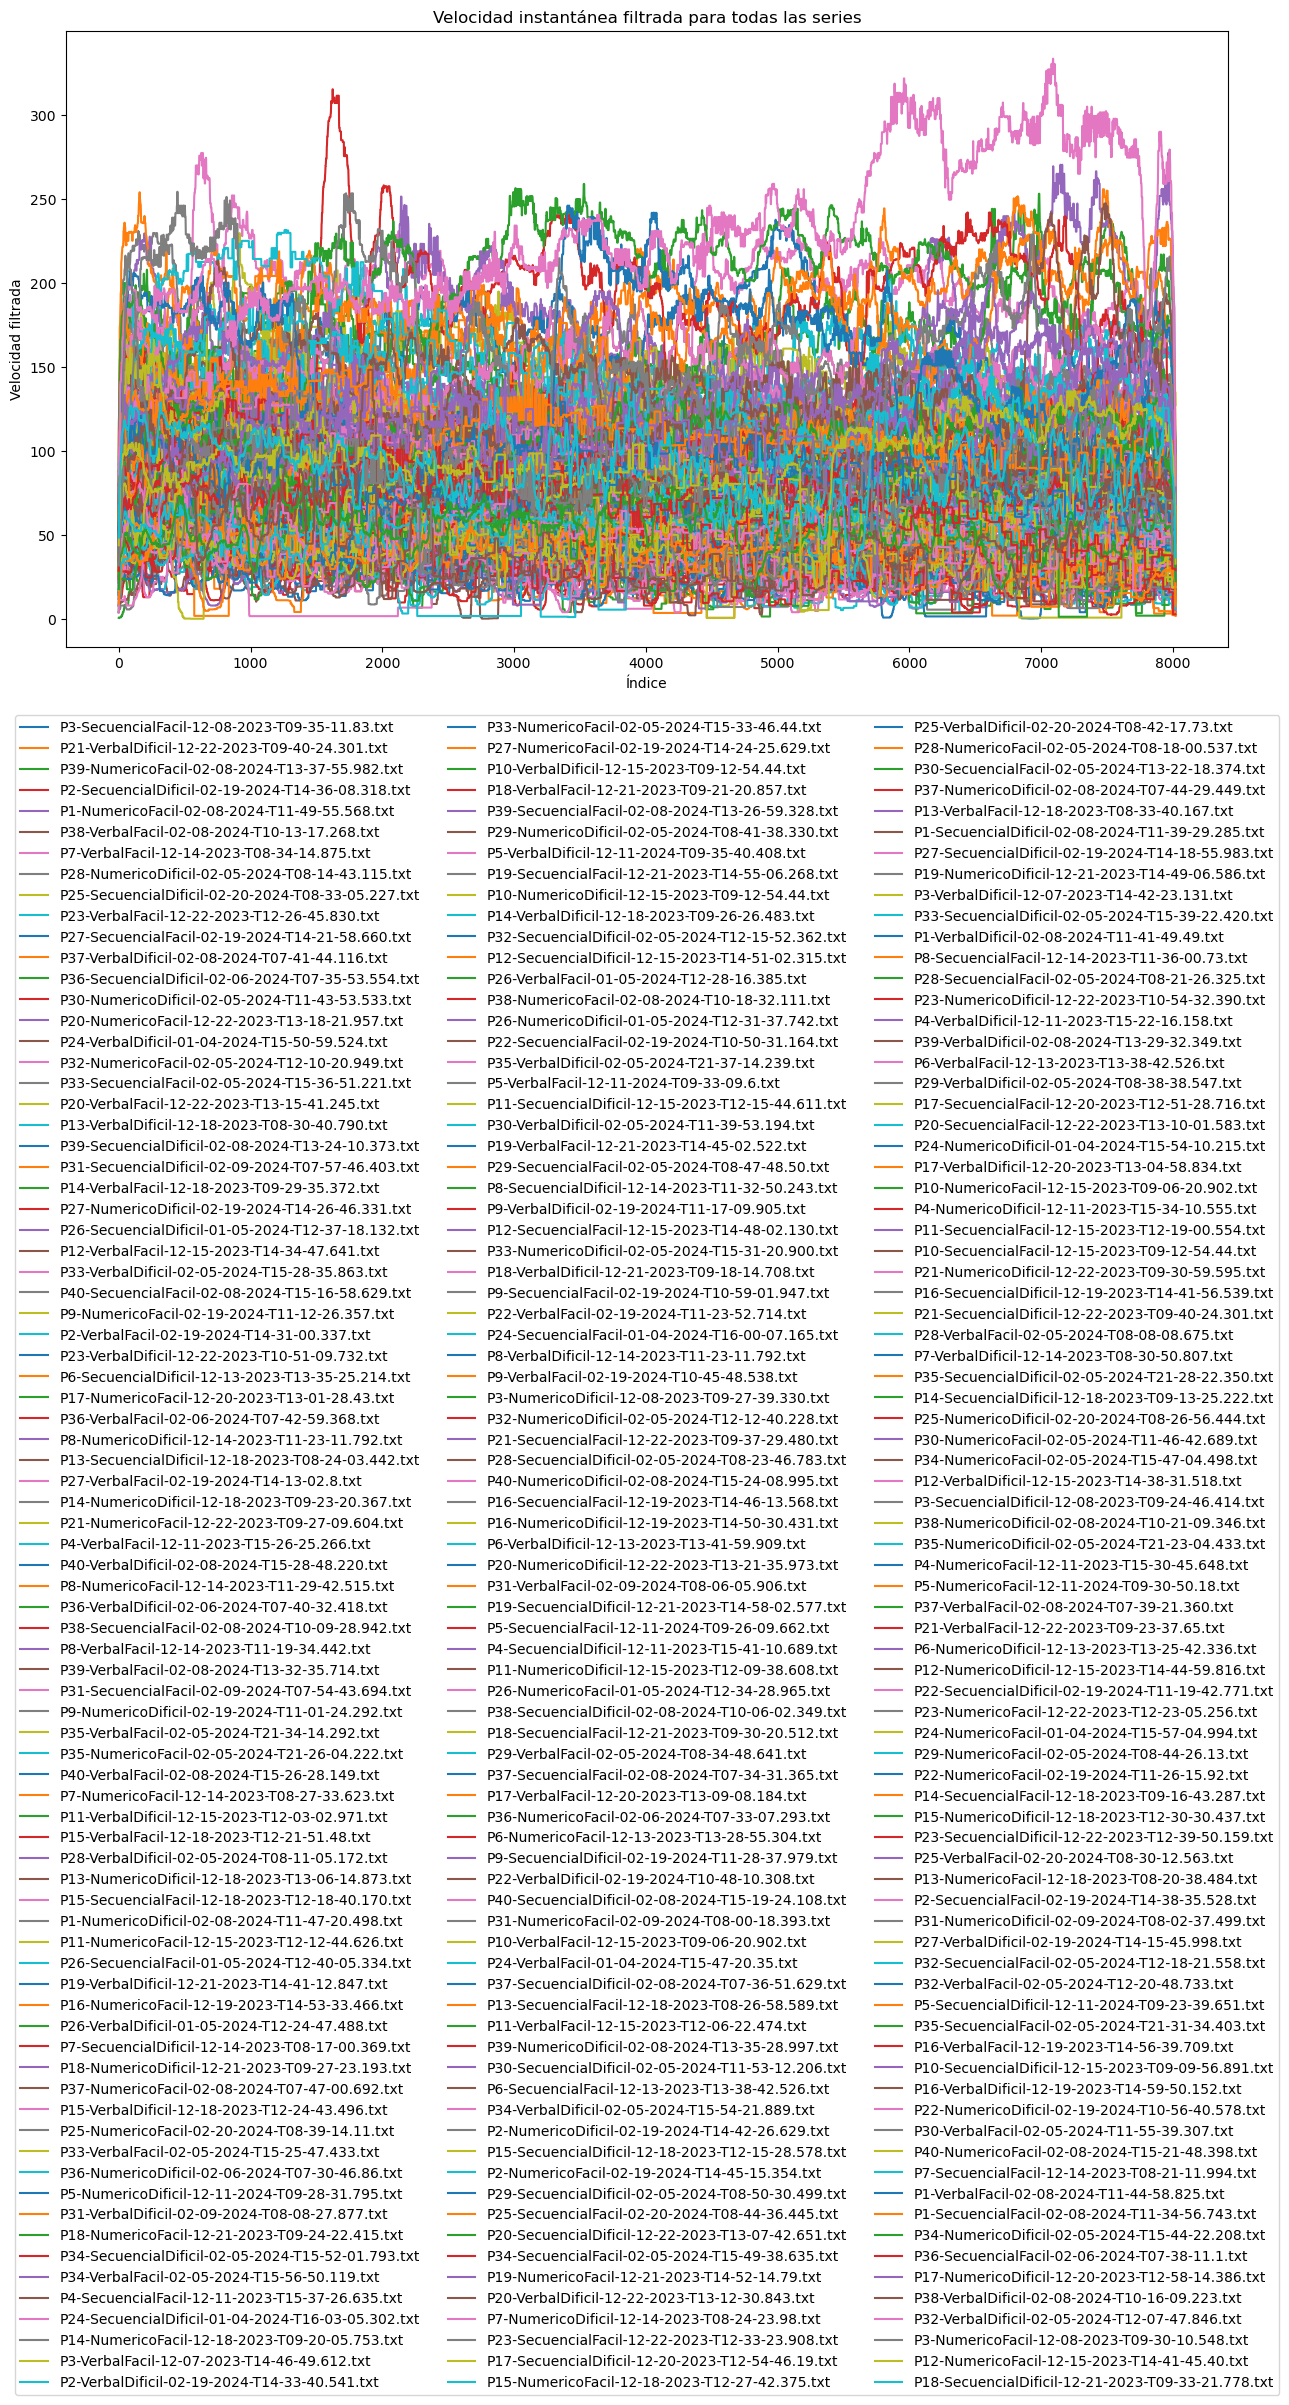

In [43]:
from scipy.signal import medfilt
# Función para aplicar el filtro mediano y guardar las series procesadas
def aplicar_filtro_y_graficar(velocidades_por_archivo, tamaño_ventana, archivo_salida_filtradas):
    velocidades_filtradas = {}
    datos_para_csv_filtradas = []

    # Aplicar el filtro mediano a cada serie de velocidad procesada
    for archivo, velocidades in velocidades_por_archivo.items():
        velocidades_filtradas[archivo] = medfilt(velocidades, tamaño_ventana)/1000



    # Creación del DataFrame y exportación a CSV para las series filtradas
    df_velocidades_filtradas = pd.DataFrame(datos_para_csv_filtradas, columns=['Participante', 'Tarea', 'Dificultad', 'Velocidad'])
    # Graficar las series de velocidad filtradas
    plt.figure(figsize=(15, 8))
    for archivo, velocidad in velocidades_filtradas.items():
        plt.plot(velocidad, label=archivo)
    plt.xlabel('Índice')
    plt.ylabel('Velocidad filtrada')
    plt.title('Velocidad instantánea filtrada para todas las series')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=False, ncol=3)
    plt.show()

    return velocidades_filtradas

# Definimos el tamaño de la ventana para el filtro mediano
tamaño_ventana = 91  # Tamaño de la ventana del filtro mediano

# Ejemplo de uso

archivo_salida_filtradas = 'velocidades_filtradas.csv'

velocidades_filtradas = aplicar_filtro_y_graficar(velocidades_por_archivo, tamaño_ventana, archivo_salida_filtradas)

In [45]:
print(len(velocidades_filtradas['P12-NumericoDificil-12-15-2023-T14-44-59.816.txt']))

8020


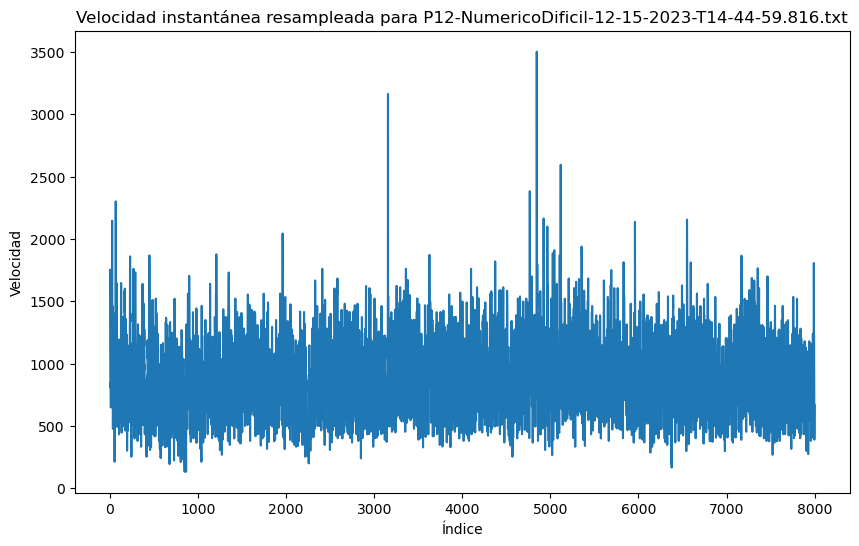

In [14]:
from scipy.signal import medfilt
# Diccionario para almacenar las series resampleadas y sus velocidades

velocidades_resampled = dict()

for archivo in archivos:
    if archivo.endswith('.txt'):
        ruta_completa = os.path.join(folder_directory, archivo)
        df_tmp = pd.read_csv(ruta_completa, header=None, names=['x', 'y', 'timestamp'])
        
        # Aplicar filtro aquí si es necesario, o suponer que las series ya están filtradas

        # Convertir timestamp a datetime para poder hacer resampling
        df_tmp["timestamp"] = pd.to_datetime(df_tmp["timestamp"], unit="ms")
        instante_inicial = df_tmp.iloc[0]["timestamp"]
        df_tmp["timestamp"] = df_tmp["timestamp"] - instante_inicial
        
        # Establecer timestamp como índice
        df_tmp.set_index('timestamp', inplace=True)
        
        # Realizar resampling
        df_resampled = df_tmp.resample(freq).mean().interpolate()

        # Volver a calcular las velocidades para las series resampleadas
        df_resampled.reset_index(inplace=True)
        df_resampled['timestamp'] = df_resampled['timestamp'].dt.total_seconds()
        distancias = np.sqrt(np.diff(df_resampled['x'])**2 + np.diff(df_resampled['y'])**2)
        tiempos = np.diff(df_resampled['timestamp'])
        velocidades_instantaneas = np.divide(distancias, tiempos, out=np.zeros_like(distancias), where=tiempos>0)      
        velocidades_resampled[archivo] = velocidades_instantaneas

# Ejemplo de cómo graficar la velocidad resampleada para una serie específica
archivo_ejemplo = 'P12-NumericoDificil-12-15-2023-T14-44-59.816.txt'
if archivo_ejemplo in velocidades_resampled:
    plt.figure(figsize=(10, 6))
    plt.plot(velocidades_resampled[archivo_ejemplo])
    plt.xlabel('Índice')
    plt.ylabel('Velocidad')
    plt.title(f'Velocidad instantánea resampleada para {archivo_ejemplo}')
    plt.show()


In [43]:
min_interpolacion = 0
max_interpolacion = 1

# Determinar la longitud máxima entre todas las series resampleadas
max_longitud = max([len(v) for v in velocidades_resampled.values()])

# Diccionario para almacenar las velocidades estiradas
velocidades_estiradas = {}


for key, velocidad in velocidades_resampled.items():
    longitud_actual = len(velocidad)
    x_shorter = np.linspace(min_interpolacion, max_interpolacion, longitud_actual)
    x_longer = np.linspace(min_interpolacion, max_interpolacion, max_longitud)
    interpolator = interp1d(x_shorter, velocidad, kind='linear', fill_value="extrapolate")
    stretched_velocidad = interpolator(x_longer)
    velocidades_estiradas[key] = stretched_velocidad

print(len(velocidades_estiradas))

240


In [47]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
print(df_final[columnas_seleccionadas])
max_len_velocity = max([len(v) for v in velocidades_filtradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_filtradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

        X1          X2       Y8020  Y8021 etiqueta
0    549.0  554.913217  256.202494  270.0    facil
1    570.0  575.955112  315.059850  323.0  dificil
2    593.0  593.000000  230.912718  224.0    facil
3    567.0  572.937157  205.170274  200.0  dificil
4    445.0  454.875312  276.775561  259.0    facil
..     ...         ...         ...    ...      ...
235  458.0  468.939651  161.475312  157.0  dificil
236  545.0  545.000000  422.684165  453.0  dificil
237  545.0  549.935786  288.619895  284.0    facil
238  534.0  523.080923  131.948504  125.0    facil
239  171.0  178.902244  357.963342  355.0  dificil

[240 rows x 5 columns]


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 500 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

Scores de cross-validation: [0.875      0.66666667 0.70833333 0.58333333 0.66666667 0.83333333
 0.79166667 0.625      0.66666667 0.70833333]
Promedio de los scores: 0.7125


In [17]:
datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Asegúrate de que estás tomando 8020 elementos después de eliminar el primero
    x_datos_ajustados = df['x'][1:].tolist()  # Debería tener 8020 elementos
    y_datos_ajustados = df['y'][1:].tolist()  # Debería tener 8020 elementos
    
    # Verifica que la velocidad también tiene 8020 elementos
    velocidad_serie = velocidades_filtradas[archivo].tolist() 
    
    datos_serie = x_datos_ajustados + y_datos_ajustados + velocidad_serie
    
    # Verificar que la longitud de la serie sea la esperada (24060 puntos)
    assert len(x_datos_ajustados) == 8020, f"Longitud incorrecta para X en {archivo}: {len(x_datos_ajustados)}"
    assert len(y_datos_ajustados) == 8020, f"Longitud incorrecta para Y en {archivo}: {len(y_datos_ajustados)}"
    assert len(velocidad_serie) == 8020, f"Longitud incorrecta para velocidad en {archivo}: {len(velocidad_serie)}"
    assert len(datos_serie) == 24060, f"La longitud de la serie no es la esperada: {len(datos_serie)} para el archivo {archivo}"

    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Definir los nombres de las columnas para el nuevo DataFrame
nombres_columnas = ['X{}'.format(i+1) for i in range(8020)] + ['Y{}'.format(i+1) for i in range(8020)] + ['V{}'.format(i+1) for i in range(8020)]

# Crear el DataFrame final
df_finalVelocity = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_finalVelocity['etiqueta'] = etiquetas



In [18]:
print(df_finalVelocity.shape)

(240, 24061)


In [39]:
from minirocket_multivariate import fit, transform
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Asume que df_finalVelocity ya está preparado con tus datos
X = df_finalVelocity.drop(columns=['etiqueta']).values  # Extrae las características
y = df_finalVelocity['etiqueta'].values  # Extrae las etiquetas

# Reforma X para que tenga la forma esperada por tu MiniRocket: (número de muestras, número de canales, longitud de la serie)
X_reshaped = X.reshape(-1, 3, 8020)  # -1 aquí infiere automáticamente el número de muestras, 3 para los canales (X, Y, velocidad)
X_reshaped = X_reshaped.astype(np.float32)  # Asegura que los datos sean float32

# Ajusta los parámetros de MiniRocket
params = fit(X_reshaped, num_features=100, max_dilations_per_kernel=52)

# Transforma los datos usando MiniRocket
X_transformed = transform(X_reshaped, params)

# Utiliza un clasificador RandomForest para evaluar el rendimiento
classifier = RandomForestClassifier(random_state=42)
scores = cross_val_score(classifier, X_transformed, y, cv=10)  # Realiza una validación cruzada

# Calcula y muestra la precisión promedio
accuracy_average = np.mean(scores)
print(f'Accuracy promedio con validación cruzada: {accuracy_average}')
print("Scores de validación cruzada:", scores)



Accuracy promedio con validación cruzada: 0.7124999999999999
Scores de validación cruzada: [0.875      0.66666667 0.83333333 0.70833333 0.625      0.75
 0.70833333 0.625      0.58333333 0.75      ]


<h1 style="font-size:18px;">Coordenada X y Y RandomForest feature velocidad</h1>


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 1000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

Scores de cross-validation: [0.79166667 0.70833333 0.70833333 0.83333333 0.625      0.83333333
 0.70833333 0.54166667 0.58333333 0.66666667]
Promedio de los scores: 0.7


In [380]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)


Matriz de confusión:
[[98 22]
 [35 85]]


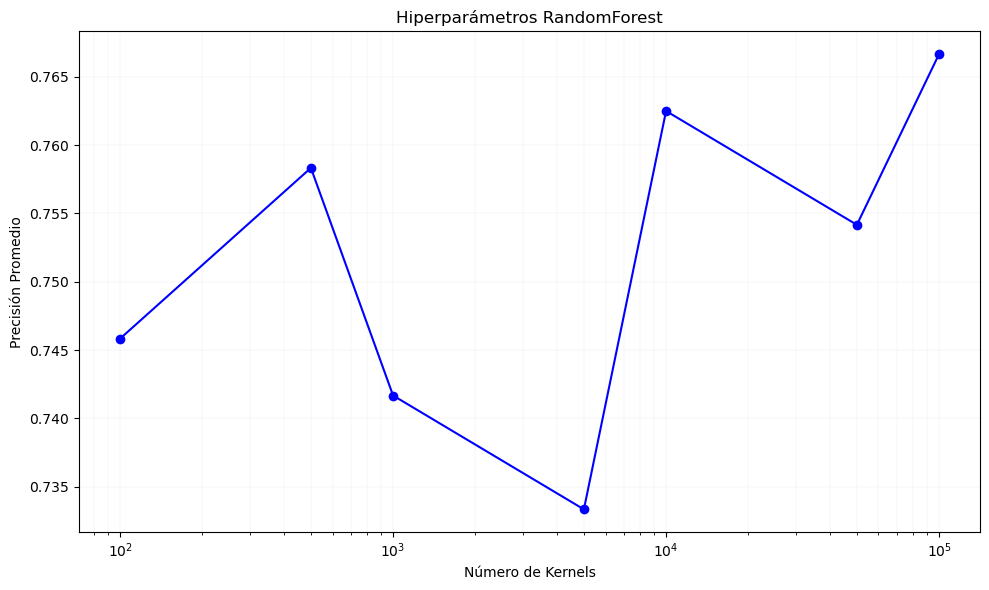

In [527]:
numKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

arrayVelocidad = [[0.70833333, 0.75, 0.79166667, 0.70833333, 0.875, 0.70833333,
 0.70833333, 0.75, 0.70833333, 0.75],[0.70833333, 0.75, 0.83333333, 0.70833333, 0.875, 0.70833333,
 0.75, 0.79166667, 0.70833333, 0.75], [0.66666667, 0.70833333, 0.83333333, 0.66666667, 0.83333333, 0.75,
 0.75, 0.79166667, 0.70833333, 0.70833333], [0.66666667, 0.70833333, 0.79166667, 0.66666667, 0.83333333, 0.75,
 0.79166667, 0.75, 0.66666667, 0.70833333], [0.66666667, 0.79166667, 0.875, 0.70833333, 0.875, 0.75,
 0.83333333, 0.75, 0.66666667, 0.70833333], [0.70833333, 0.79166667, 0.83333333, 0.70833333, 0.875, 0.70833333,
 0.75, 0.75, 0.70833333, 0.70833333], [0.70833333, 0.83333333, 0.83333333, 0.70833333, 0.875, 0.75,
 0.75, 0.75, 0.70833333, 0.75]]

# Calcular el promedio de los valores en cada array interno
promedios = [np.mean(valores) for valores in arrayVelocidad]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

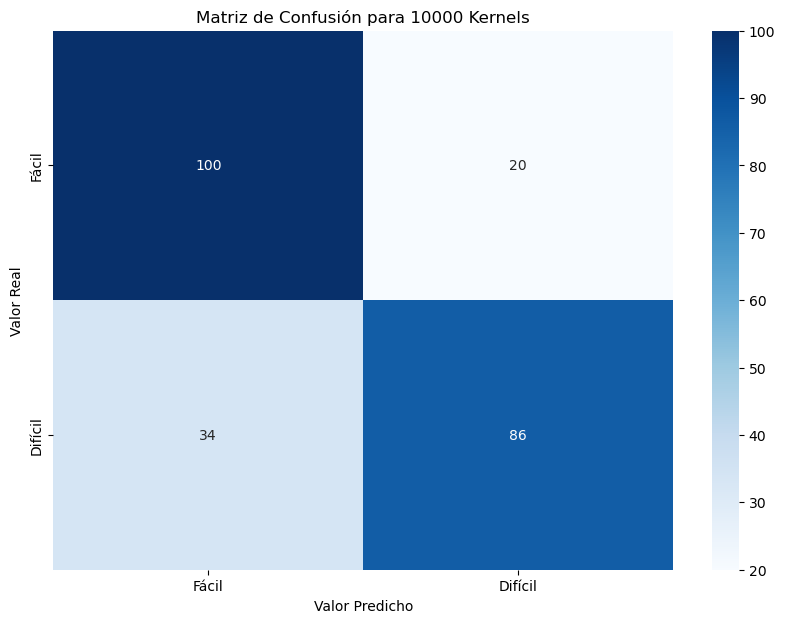

In [644]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    100: np.array([[100, 20], [34, 86]]),
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Matriz de Confusión para 10000 Kernels')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
    plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    plt.show()

# Ejemplo de uso para el número de kernels 100
plot_confusion_matrix(100, matrices_confusion[100])


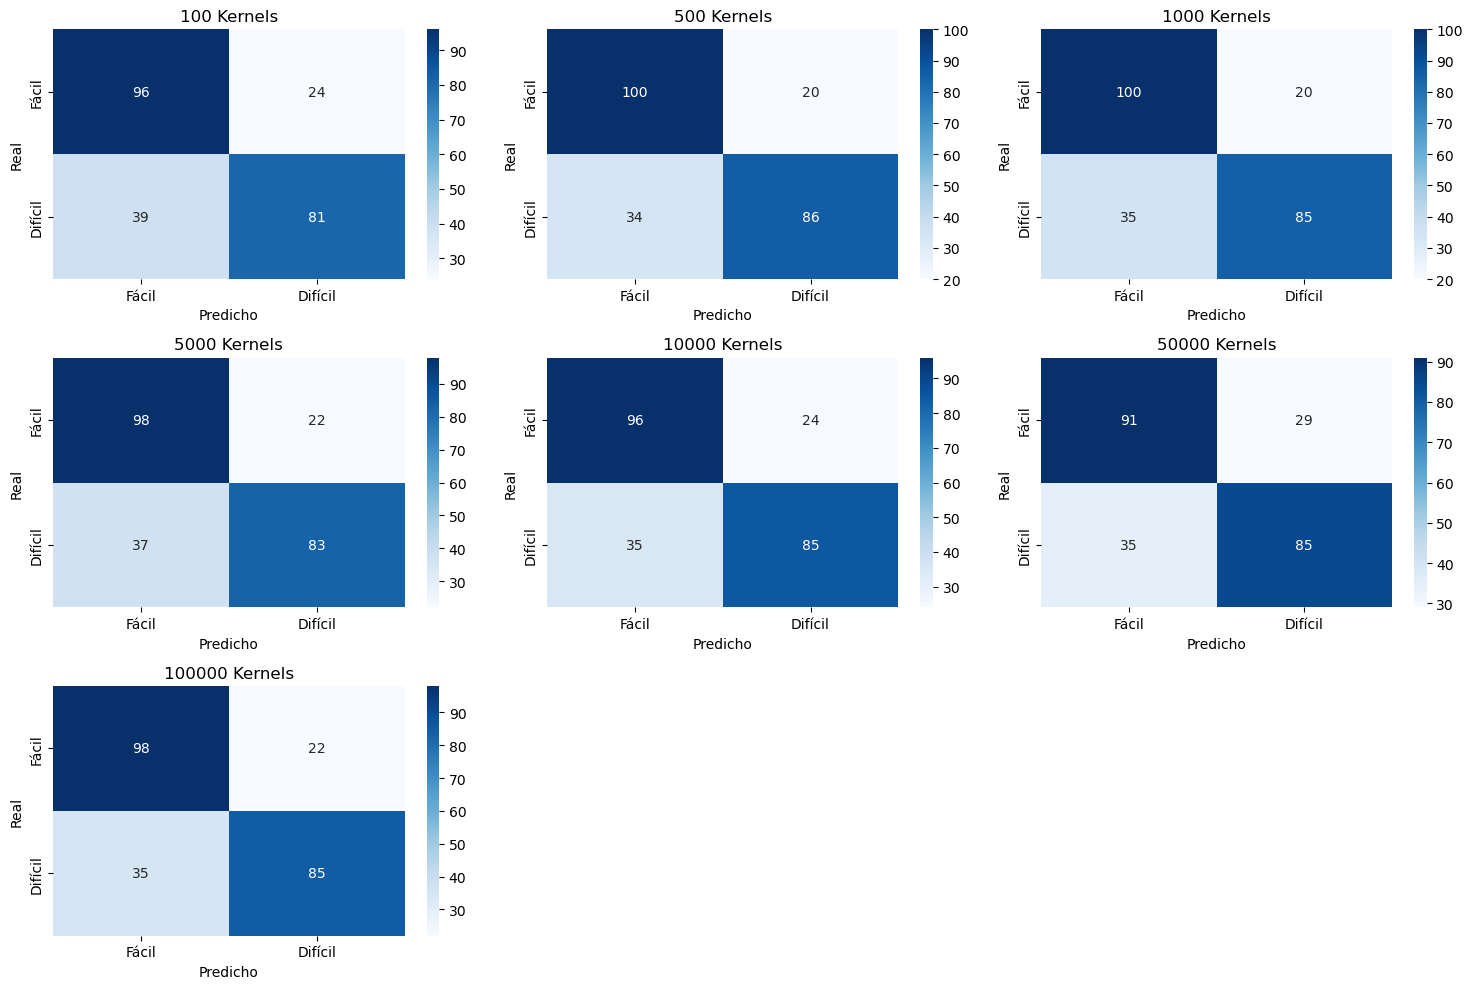

In [489]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    100: np.array([[96, 24], [39, 81]]),
    500: np.array([[100, 20], [34, 86]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[100, 20], [35, 85]]),
    5000: np.array([[98, 22], [37, 83]]),
    10000: np.array([[96, 24], [35, 85]]),
    50000: np.array([[91, 29], [35, 85]]),
    100000: np.array([[98, 22], [35, 85]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)


<h1 style="font-size:16px;">ETIQUETA POR TAREA MATRIZ DE CONFUSION</h1>

In [408]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Numerico' in nombre_archivo:
        return 'numerico'
    elif 'Verbal' in nombre_archivo:
        return 'verbal'
    elif 'Secuencial' in nombre_archivo:
        return 'secuencial'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])
# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas


In [410]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 5000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')


# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["verbal", "numerico","secuencial"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Scores de cross-validation: [0.375      0.29166667 0.29166667 0.33333333 0.33333333 0.25
 0.29166667 0.375      0.375      0.33333333]
Promedio de los scores: 0.32500000000000007
Matriz de confusión:
[[29 30 21]
 [19 31 30]
 [34 25 21]]


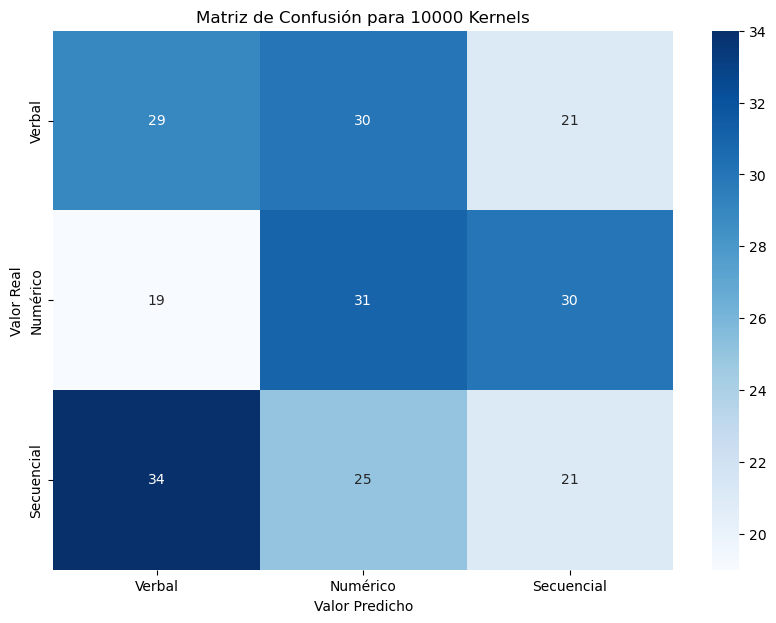

In [551]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    10000: np.array([[29, 30, 21], [19, 31, 30], [34, 25, 21]]),  # Matriz 3x3
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Matriz de Confusión para 10000 Kernels')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.xticks([0.5, 1.5, 2.5], ['Verbal', 'Numérico', 'Secuencial'])
    plt.yticks([0.5, 1.5, 2.5], ['Verbal', 'Numérico', 'Secuencial'], va='center')
    plt.show()

# Ejemplo de uso para el número de kernels 100
plot_confusion_matrix(10000, matrices_confusion[10000])



<h1 style="font-size:16px;">ETIQUETA POR TAREA y DIFICULTAD MATRIZ DE CONFUSION</h1>

In [411]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'NumericoFacil' in nombre_archivo:
        return 'numericofacil'
    elif 'NumericoDificil' in nombre_archivo:
        return 'numericodificil'
    elif 'VerbalFacil' in nombre_archivo:
        return 'verbalfacil'
    elif 'VerbalDificil' in nombre_archivo:
        return 'verbaldificil'
    elif 'SecuencialDificil' in nombre_archivo:
        return 'secuencialdificil'
    elif 'SecuencialFacil' in nombre_archivo:
        return 'secuencialfacil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])


# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas



In [412]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 5000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')


# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["verbalfacil", "verbaldificil","secuencialfacil","secuencialdificil","numericofacil","numericodificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Scores de cross-validation: [0.20833333 0.125      0.20833333 0.25       0.375      0.20833333
 0.04166667 0.25       0.125      0.08333333]
Promedio de los scores: 0.1875
Matriz de confusión:
[[ 9  2 10  0 17  2]
 [ 7  3  6  8  3 13]
 [11  5 10  1 11  2]
 [ 3  7  4 11  4 11]
 [10  3 10  2 11  4]
 [ 2  8  5 12  5  8]]


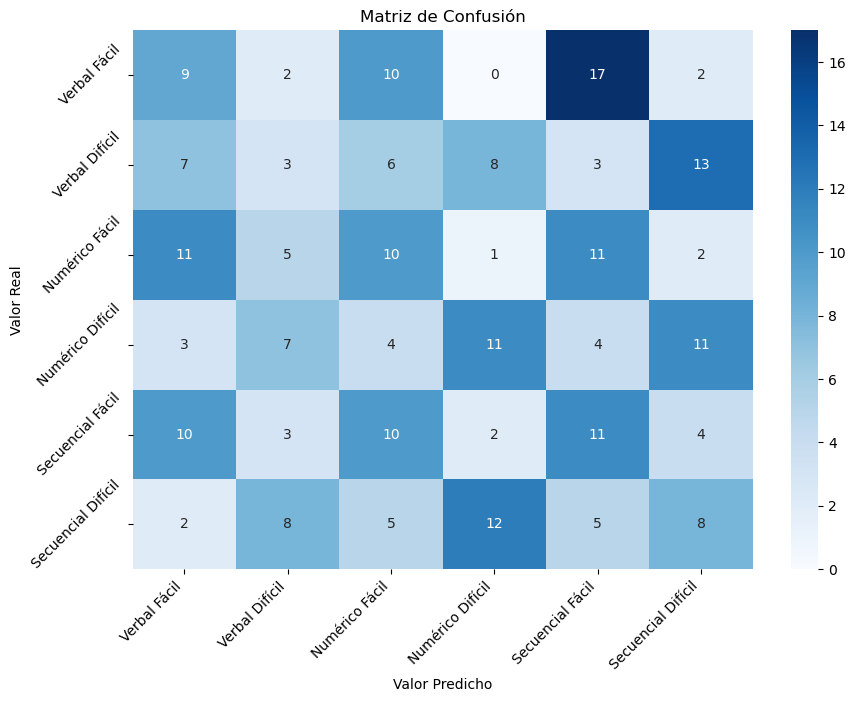

In [499]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la matriz de confusión
matriz_confusion = np.array([[9, 2, 10, 0, 17, 2],
                             [7, 3, 6, 8, 3, 13],
                             [11, 5, 10, 1, 11, 2],
                             [3, 7, 4, 11, 4, 11],
                             [10, 3, 10, 2, 11, 4],
                             [2, 8, 5, 12, 5, 8]])

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    etiquetas = ['Verbal Fácil', 'Verbal Difícil', 'Numérico Fácil', 'Numérico Difícil', 'Secuencial Fácil', 'Secuencial Difícil']
    plt.xticks(np.arange(6) + 0.5, etiquetas, rotation=45, ha='right')
    plt.yticks(np.arange(6) + 0.5, etiquetas, rotation=45, va='center')
    plt.show()

plot_confusion_matrix(matriz_confusion)

<h1 style="font-size:20px;">Hiperparámetros</h1>

<h1 style="font-size:20px;">N. estimators: 100, max Leaf nodes: 200</h1>

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 5000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')


# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=400, min_samples_leaf=4, max_leaf_nodes=200, max_depth=10, min_samples_split=5))

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

In [18]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

ArrayMaxLeaf200= [[0.70833333, 0.70833333, 0.83333333, 0.70833333, 0.875, 0.75,
0.70833333, 0.75, 0.75, 0.79166667], [0.70833333, 0.70833333, 0.79166667, 0.70833333, 0.83333333, 0.70833333,
0.83333333, 0.75, 0.70833333, 0.75], [0.70833333, 0.70833333, 0.875, 0.70833333, 0.83333333, 0.70833333,
0.83333333, 0.79166667, 0.625, 0.79166667], [0.66666667, 0.79166667, 0.875, 0.70833333, 0.875, 0.75,
 0.83333333, 0.75, 0.66666667, 0.70833333], [0.70833333, 0.79166667, 0.83333333, 0.70833333, 0.875, 0.70833333,
 0.75, 0.75, 0.70833333, 0.70833333], [0.70833333, 0.83333333, 0.83333333, 0.70833333, 0.875, 0.75,
 0.75, 0.75, 0.70833333, 0.75],[0.70833333, 0.70833333, 0.83333333, 0.70833333, 0.875, 0.75,
0.70833333, 0.75, 0.75, 0.79166667] ]

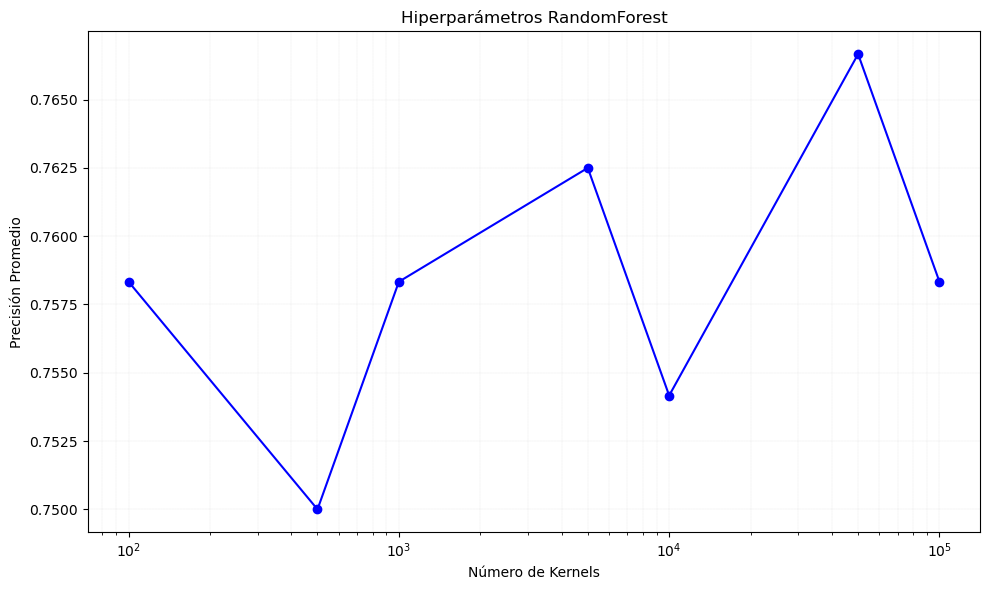

In [646]:
# Calcular el promedio de los valores en cada array interno
promedios = [np.mean(valores) for valores in ArrayMaxLeaf200]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

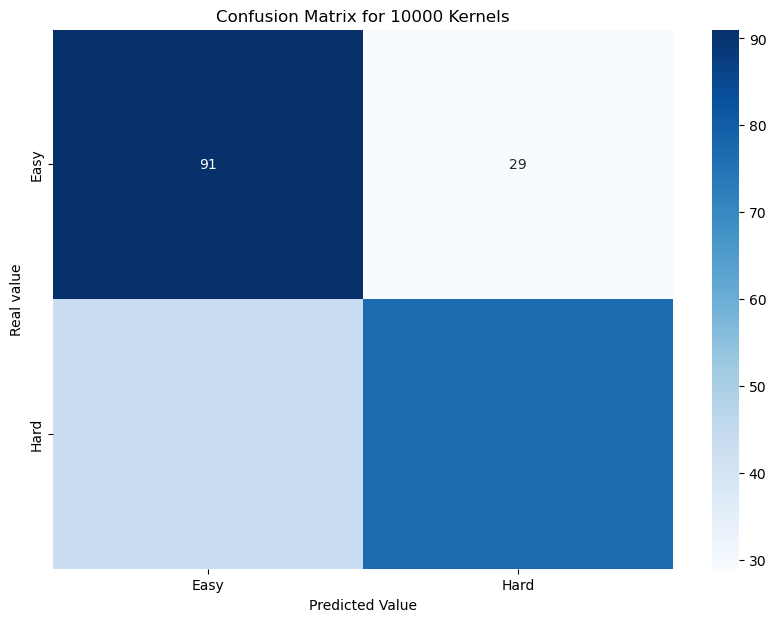

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionUnHiperparametro = {
    100: np.array([[91, 29], [43,77 ]]),
}

def plot_confusion_matrix(numeroKernels, matrices_confusionUnHiperparametro):
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrices_confusionUnHiperparametro, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix for 10000 Kernels')
    plt.xlabel('Predicted Value')
    plt.ylabel('Real value')
    plt.xticks([0.5, 1.5], ['Easy', 'Hard'])
    plt.yticks([0.5, 1.5], ['Easy', 'Hard'])
    plt.show()

# Ejemplo de uso para el número  kernels 100
plot_confusion_matrix(100, matrices_confusionUnHiperparametro[100])

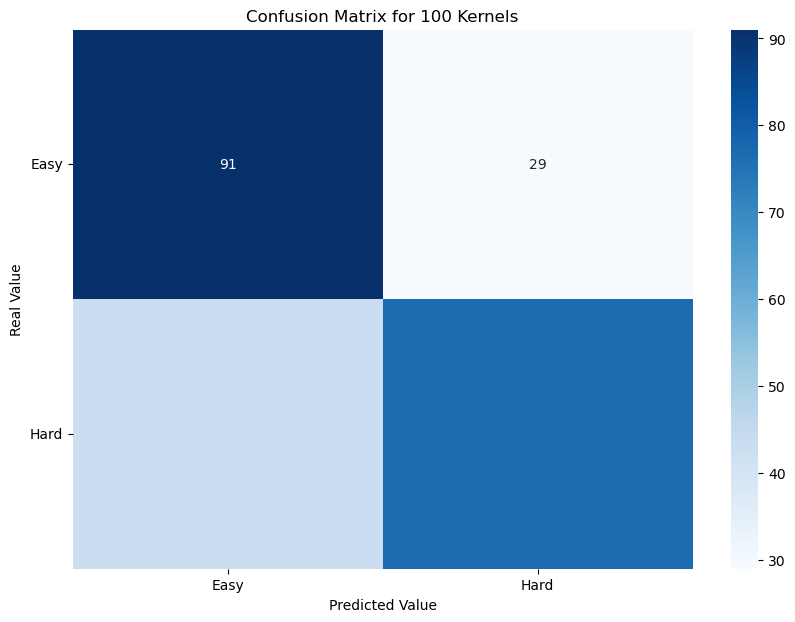

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionUnHiperparametro = {
    100: np.array([[91, 29], [43, 77]]),
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix for {kernel_number} Kernels')
    plt.xlabel('Predicted Value')
    plt.ylabel('Real Value')
    plt.xticks([0.5, 1.5], ['Easy', 'Hard'], rotation=0)
    plt.yticks([0.5, 1.5], ['Easy', 'Hard'], rotation=0)
    plt.show()

# Ejemplo de uso para el número de kernels 100
plot_confusion_matrix(100, matrices_confusionUnHiperparametro[100])


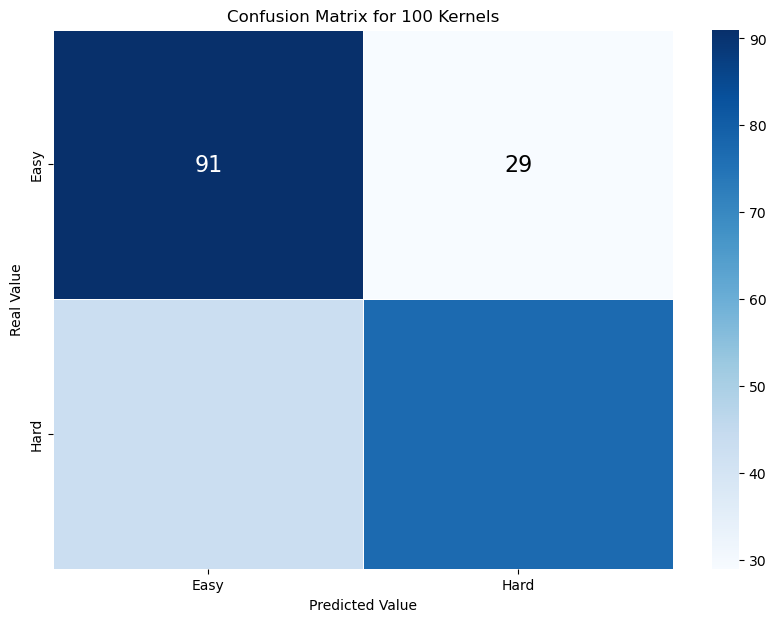

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionUnHiperparametro = {
    100: np.array([[91, 29], [43, 77]]),
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    
    # Crear el heatmap con un umbral para cambiar el color del texto
    ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues', cbar=True, 
                     xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'],
                     annot_kws={"size": 16}, linewidths=.5)
    
    # Cambiar el color del texto basado en el umbral de la celda
    for text in ax.texts:
        value = int(text.get_text())
        if value > 50:  # Umbral para cambiar el color del texto
            text.set_color('white')
        else:
            text.set_color('black')
    
    plt.title(f'Confusion Matrix for {kernel_number} Kernels')
    plt.xlabel('Predicted Value')
    plt.ylabel('Real Value')
    plt.show()

# Ejemplo de uso para el número de kernels 100
plot_confusion_matrix(100, matrices_confusionUnHiperparametro[100])


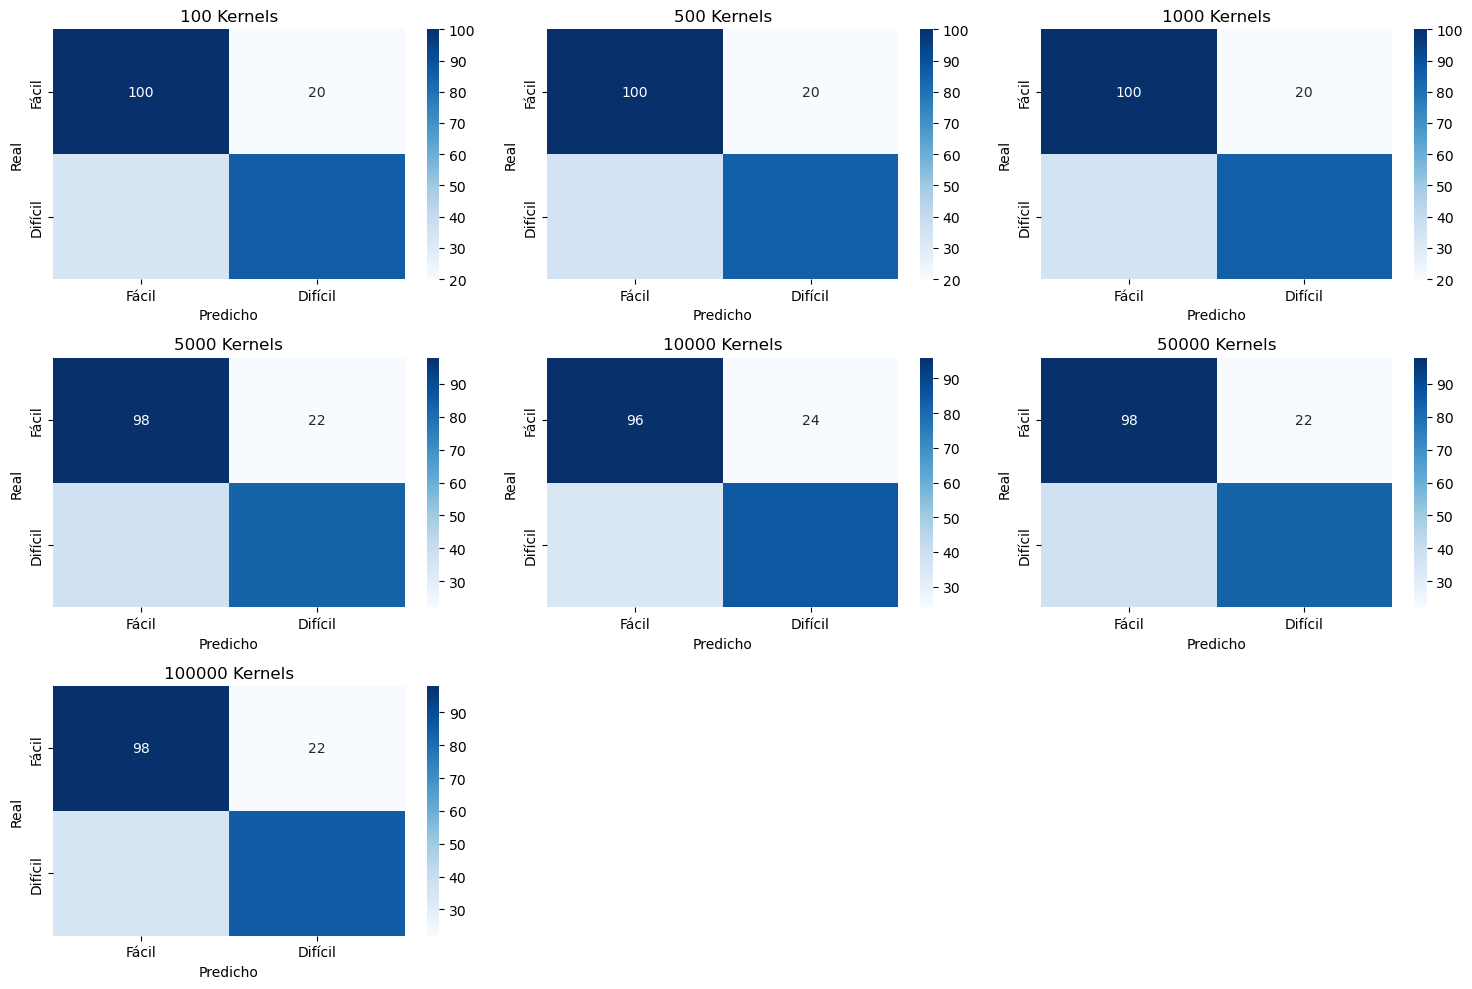

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionHiperparametros = {
    100: np.array([[100, 20], [34, 86]]),
    500: np.array([[100, 20], [35, 85]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[100, 20], [35, 85]]),
    5000: np.array([[98, 22], [37, 83]]),
    10000: np.array([[96, 24], [35, 85]]),
    50000: np.array([[98, 22], [37, 83]]),
    100000: np.array([[98, 22], [35, 85]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionHiperparametros)

<h1 style="font-size:20px;">N. estimators: 200, max Leaf nodes: 400</h1>

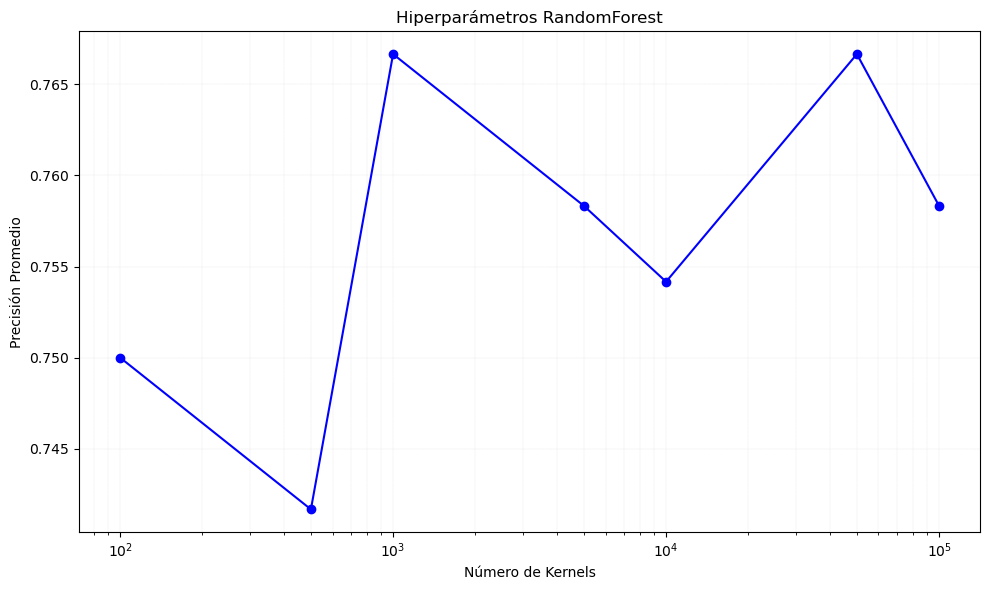

In [516]:
ArrayMaxLeaf400=[[0.70833333, 0.70833333, 0.83333333, 0.70833333, 0.875, 0.70833333,
0.75, 0.75, 0.66666667, 0.79166667], [0.70833333, 0.70833333, 0.75, 0.70833333, 0.83333333, 0.75,
0.75, 0.79166667, 0.70833333, 0.70833333], [0.70833333, 0.79166667, 0.875, 0.70833333, 0.875, 0.75,
 0.83333333, 0.75, 0.66666667, 0.70833333], [0.70833333, 0.83333333, 0.75, 0.70833333, 0.875, 0.75,
 0.75, 0.75, 0.70833333, 0.75],[0.70833333, 0.79166667, 0.83333333, 0.70833333, 0.875, 0.70833333,
 0.75, 0.75, 0.70833333, 0.70833333], [0.70833333, 0.79166667, 0.83333333, 0.70833333, 0.875, 0.75,
0.70833333, 0.75, 0.75, 0.79166667], [0.70833333, 0.70833333, 0.83333333, 0.70833333, 0.875, 0.75,
0.70833333, 0.75, 0.75, 0.79166667]]
# Calcular el promedio de los valores en cada array interno
promedios = [np.mean(valores) for valores in ArrayMaxLeaf400]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

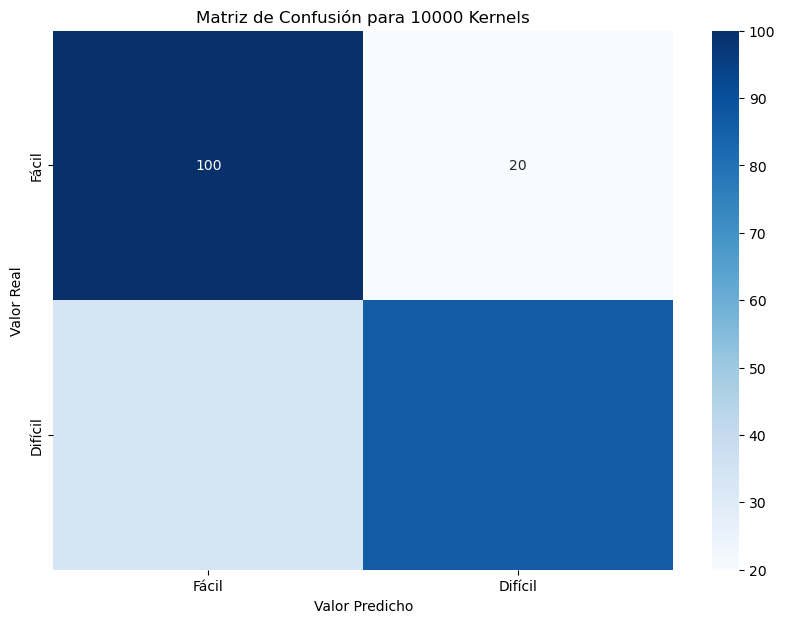

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionUnHiperparametro400 = {
    100: np.array([[100, 20], [34, 86]]),
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Matriz de Confusión para 10000 Kernels')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
    plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    plt.show()

# Ejemplo de uso para el número  kernels 100
plot_confusion_matrix(100, matrices_confusionUnHiperparametro400[100])

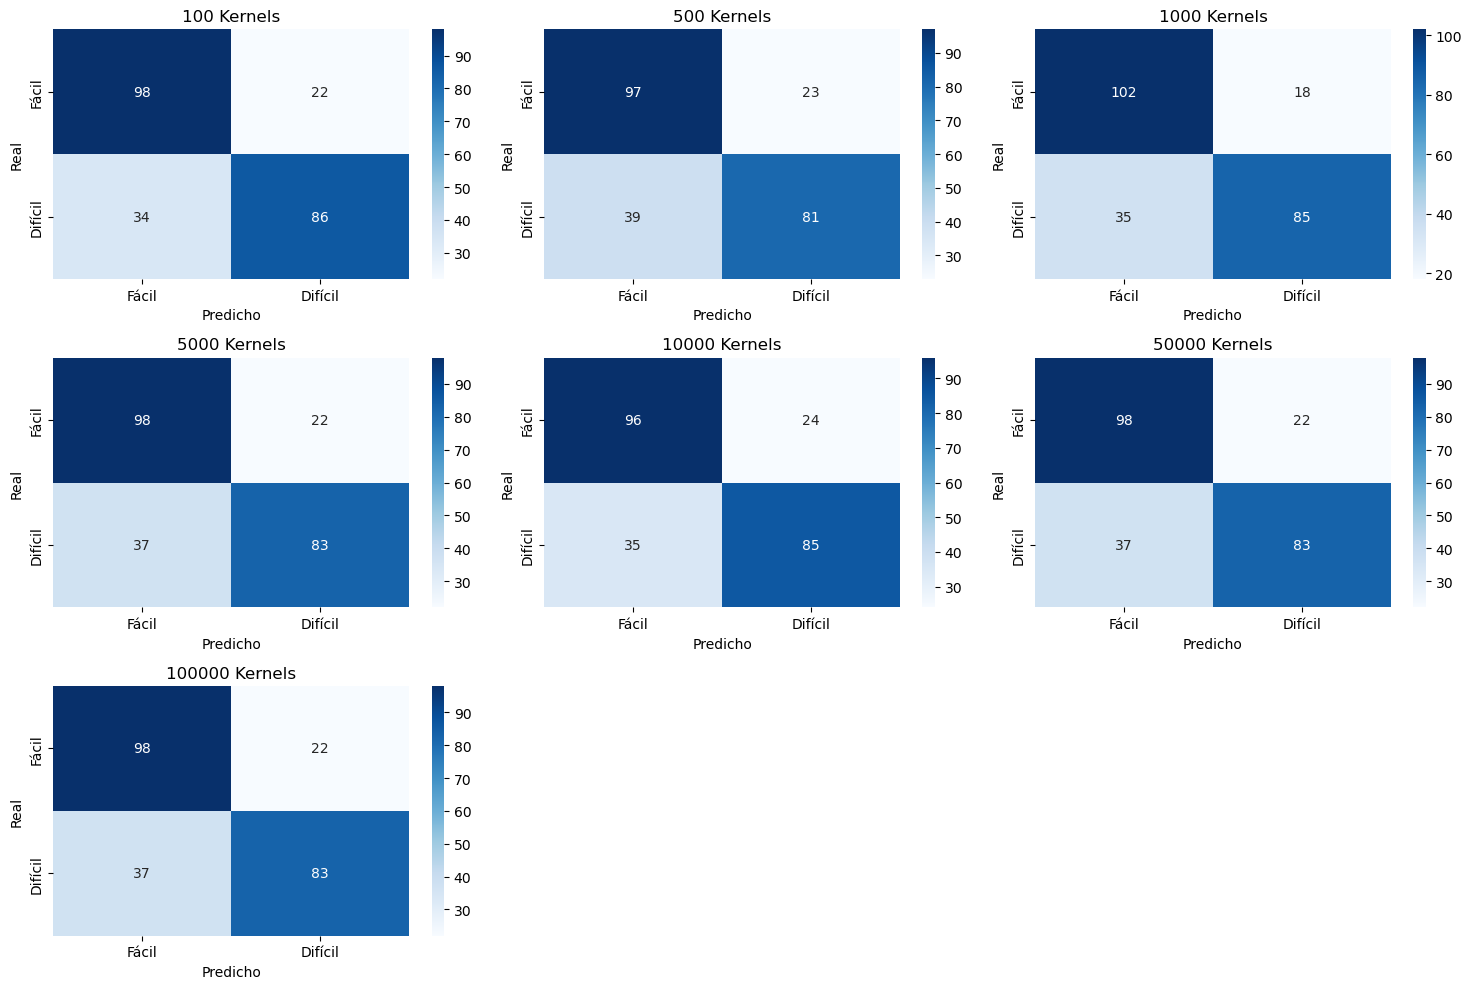

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    100: np.array([[98, 22], [34, 86]]),
    500: np.array([[97, 23], [39, 81]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[102, 18], [35, 85]]),
    5000: np.array([[98, 22], [37, 83]]),
    10000: np.array([[96, 24], [35, 85]]),
    50000: np.array([[98, 22], [37, 83]]),
    100000: np.array([[98, 22], [37, 83]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)

<h1 style="font-size:20px;">N. estimators: 200, max Leaf nodes: 400, min_samples_leaf: 4</h1>

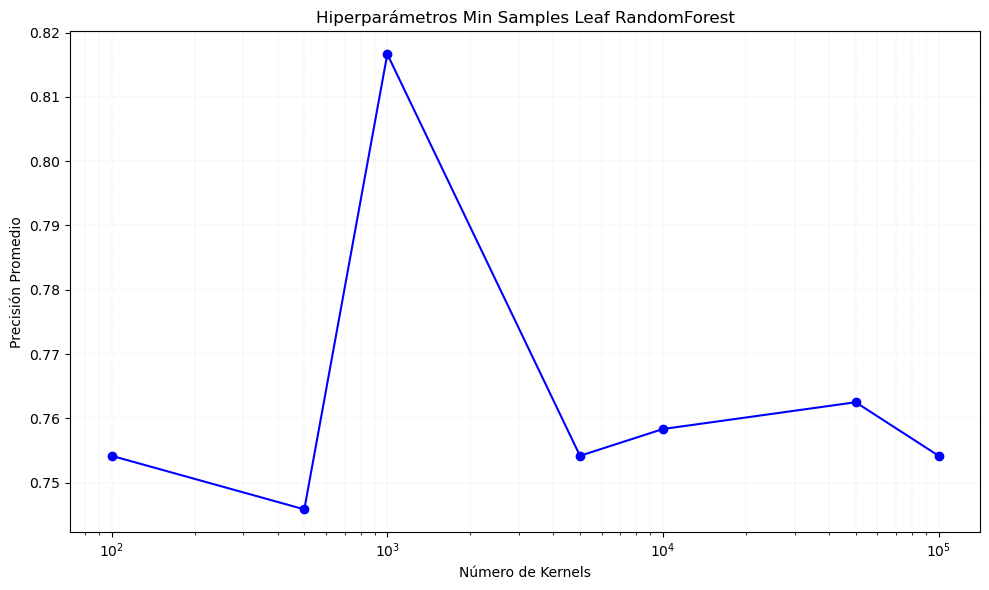

In [521]:
ArrayminLeaf4=[[0.75, 0.66666667, 0.79166667, 0.66666667, 0.875, 0.75,
0.83333333, 0.75, 0.75, 0.70833333], [0.66666667, 0.79166667, 0.83333333, 0.66666667, 0.83333333, 0.75,
0.79166667, 0.75, 0.66666667, 0.70833333], [0.91666667, 0.66666667, 0.91666667, 0.75, 0.91666667, 0.75,
 0.79166667, 0.75,0.91666667, 0.79166667], [0.75, 0.79166667, 0.83333333, 0.66666667, 0.83333333, 0.75,
0.79166667, 0.75, 0.66666667, 0.70833333], [0.70833333, 0.70833333, 0.875, 0.70833333, 0.83333333, 0.70833333,
0.83333333, 0.79166667, 0.625, 0.79166667], [0.66666667, 0.79166667, 0.875, 0.70833333, 0.875, 0.75,
 0.83333333, 0.75, 0.66666667, 0.70833333], [0.70833333, 0.79166667, 0.83333333, 0.70833333, 0.875, 0.70833333,
 0.75, 0.75, 0.70833333, 0.70833333]]
promedios = [np.mean(valores) for valores in ArrayminLeaf4]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros Min Samples Leaf RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

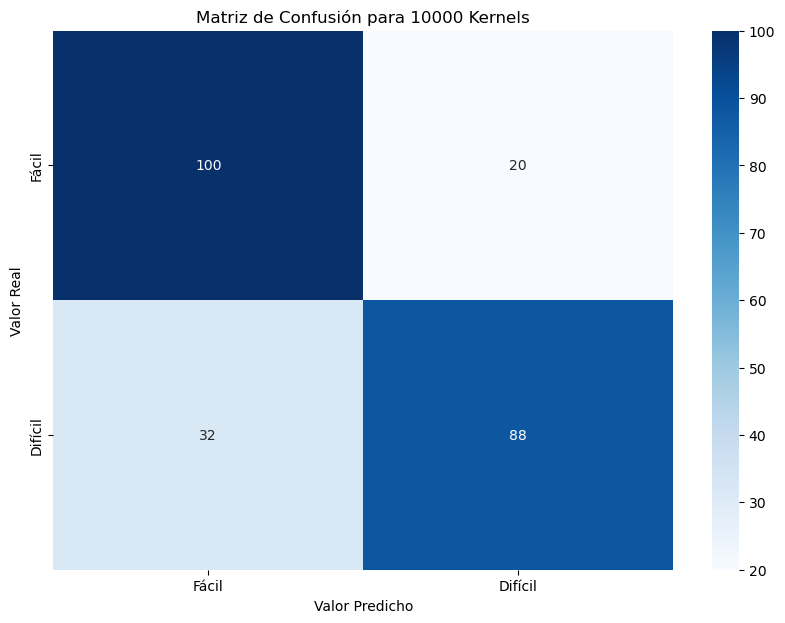

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionUnHiperparametroMinLeaf = {
    100: np.array([[100, 20], [32, 88]]),
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Matriz de Confusión para 10000 Kernels')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
    plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    plt.show()

# Ejemplo de uso para el número  kernels 100
plot_confusion_matrix(100, matrices_confusionUnHiperparametroMinLeaf[100])

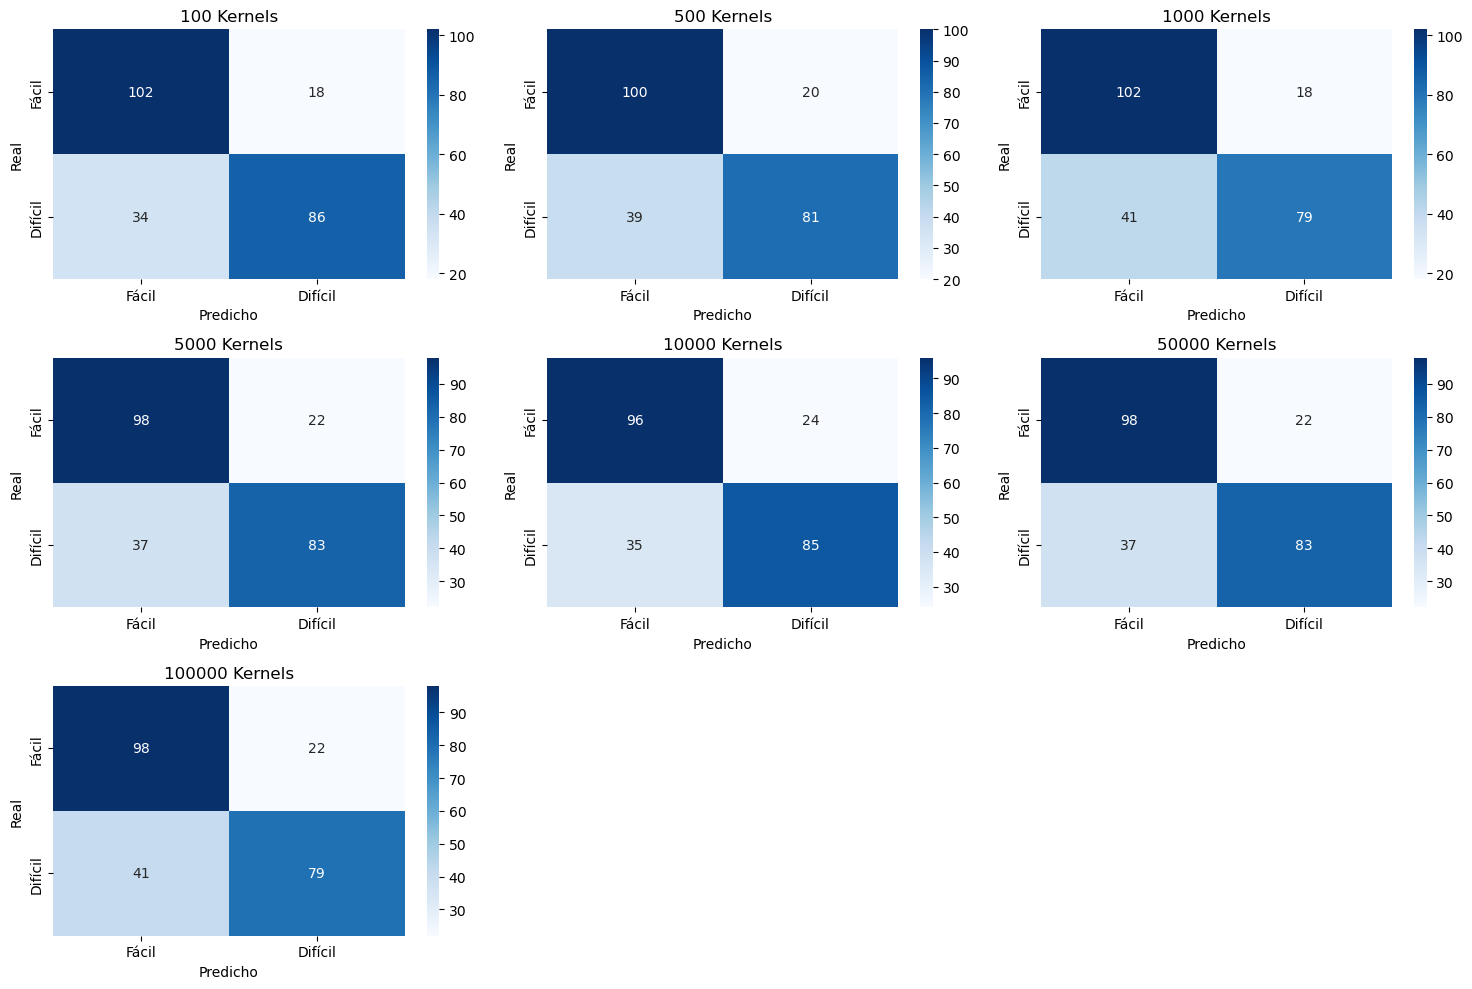

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    100: np.array([[102, 18], [34, 86]]),
    500: np.array([[100, 20], [39, 81]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[102, 18], [41, 79]]),
    5000: np.array([[98, 22], [37, 83]]),
    10000: np.array([[96, 24], [35, 85]]),
    50000: np.array([[98, 22], [37, 83]]),
    100000: np.array([[98, 22], [41, 79]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)

<h1 style="font-size:20px;">Nestimators=400, min_samples_leaf=4, max_leaf_nodes=200, max_depth=10, min_samples_split=5</h1>

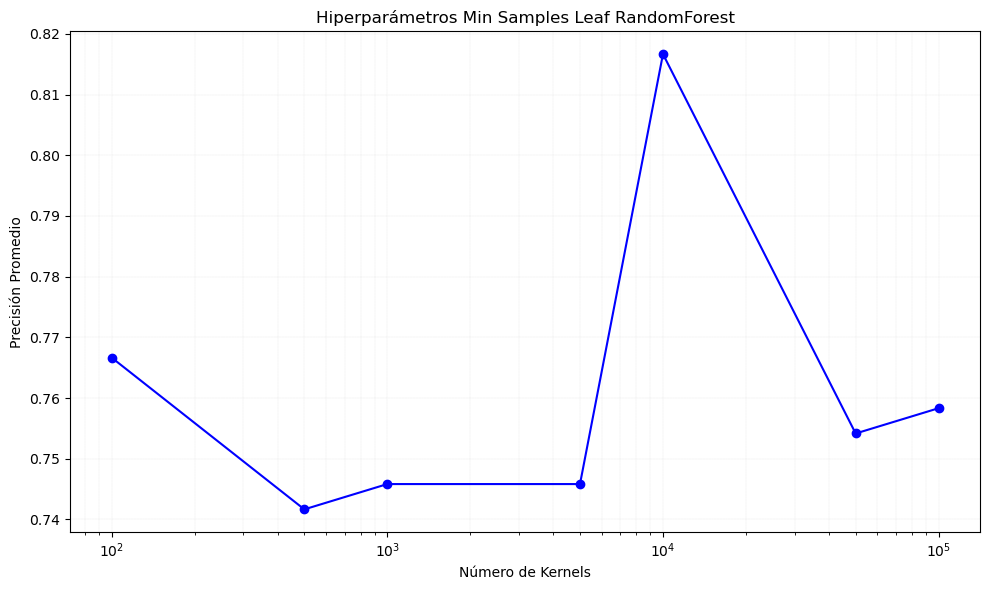

In [525]:
ArrayAllEstimators= [[0.66666667, 0.70833333, 0.875, 0.75, 0.83333333, 0.79166667,
0.75, 0.79166667, 0.70833333, 0.79166667], [0.70833333, 0.70833333, 0.79166667, 0.70833333, 0.875, 0.70833333,
0.75, 0.70833333, 0.70833333, 0.75 ], [0.66666667, 0.66666667, 0.875, 0.70833333, 0.875, 0.75,
0.70833333, 0.79166667, 0.66666667, 0.75],[0.66666667, 0.79166667, 0.83333333, 0.66666667, 0.83333333, 0.75,
0.79166667, 0.75, 0.66666667, 0.70833333], [0.91666667, 0.66666667, 0.91666667, 0.75, 0.91666667, 0.75,
 0.79166667, 0.75,0.91666667, 0.79166667],[0.75, 0.79166667, 0.83333333, 0.66666667, 0.83333333, 0.75,
0.79166667, 0.75, 0.66666667, 0.70833333], [0.70833333, 0.70833333, 0.875, 0.70833333, 0.83333333, 0.70833333,
0.83333333, 0.79166667, 0.625, 0.79166667]]

promedios = [np.mean(valores) for valores in ArrayAllEstimators]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros Min Samples Leaf RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



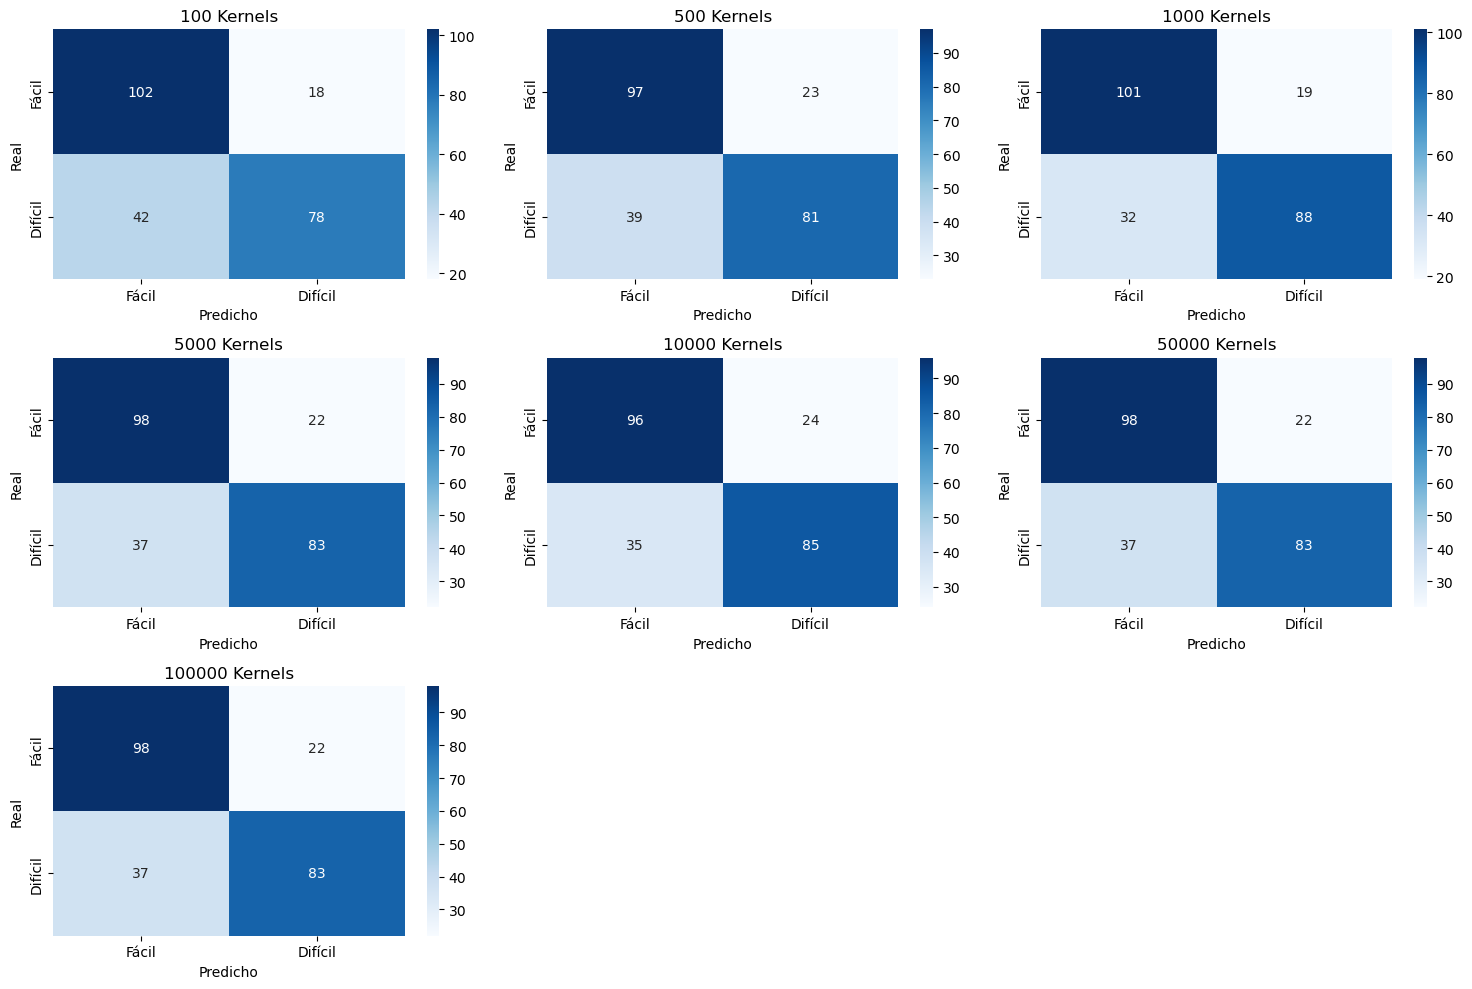

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    100: np.array([[102, 18], [42, 78]]),
    500: np.array([[97, 23], [39, 81]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[101, 19], [32, 88]]),
    5000: np.array([[98, 22], [37, 83]]),
    10000: np.array([[96, 24], [35, 85]]),
    50000: np.array([[98, 22], [37, 83]]),
    100000: np.array([[98, 22], [37, 83]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)

<h1 style="font-size:20px;">Comparaciones entre Hiperparámetros y accuracy promedio</h1>

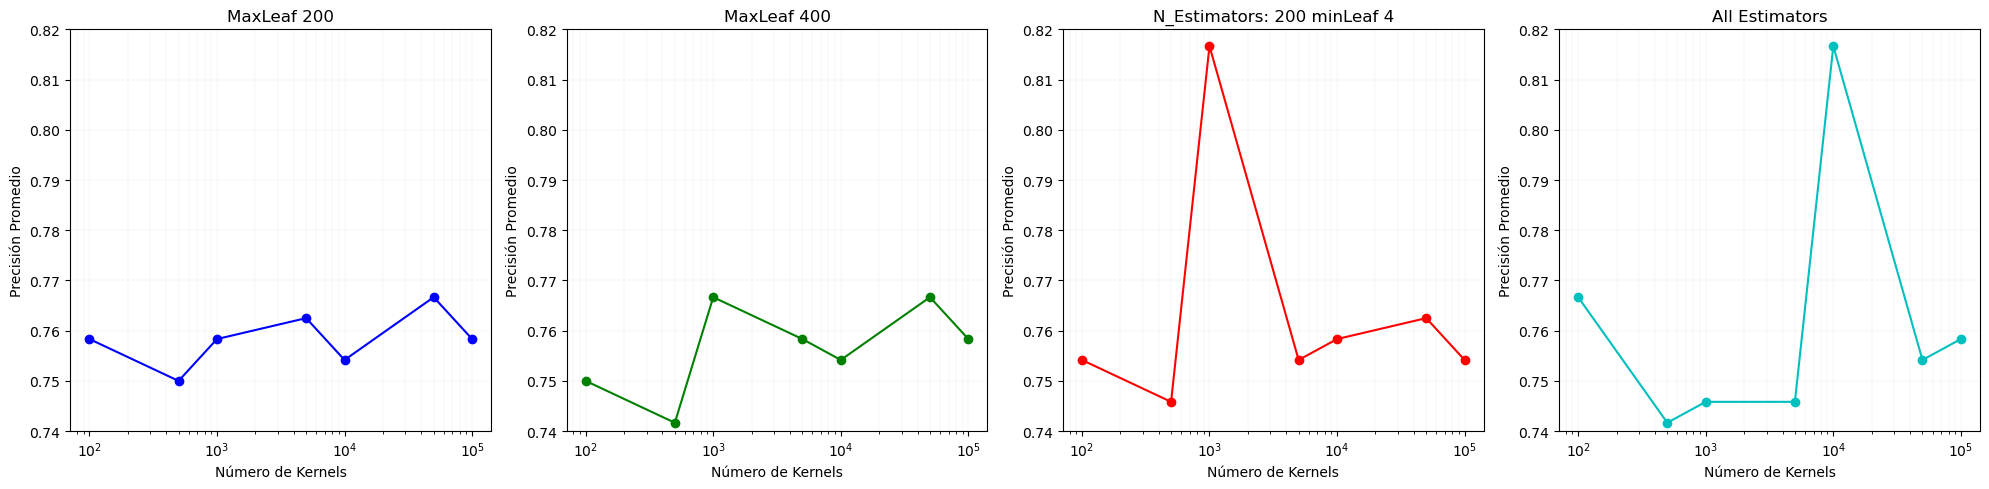

In [531]:
# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila, 4 columnas

# Colores para cada subplot
colores = ['b', 'g', 'r', 'c']

y_lim_inferior = 0.74
y_lim_superior = 0.82

axs[0].plot(numeroKernels, [np.mean(valores) for valores in ArrayMaxLeaf200], marker='o', linestyle='-', color=colores[0])
axs[0].set_title('MaxLeaf 200')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].set_ylim(x_lim_inferior, x_lim_superior)
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot
axs[1].plot(numeroKernels, [np.mean(valores) for valores in ArrayMaxLeaf400], marker='o', linestyle='-', color=colores[1])
axs[1].set_title('MaxLeaf 400')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].set_ylim(x_lim_inferior, x_lim_superior)
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

# Tercer subplot
axs[2].plot(numeroKernels, [np.mean(valores) for valores in ArrayminLeaf4], marker='o', linestyle='-', color=colores[2])
axs[2].set_title('N_Estimators: 200 minLeaf 4')
axs[2].set_xlabel('Número de Kernels')
axs[2].set_ylabel('Precisión Promedio')
axs[2].set_xscale('log')
axs[2].set_ylim(x_lim_inferior, x_lim_superior)
axs[2].grid(True, which="both", ls="--", linewidth=0.1)

# Cuarto subplot
axs[3].plot(numeroKernels, [np.mean(valores) for valores in ArrayAllEstimators], marker='o', linestyle='-', color=colores[3])
axs[3].set_title('All Estimators')
axs[3].set_xlabel('Número de Kernels')
axs[3].set_ylabel('Precisión Promedio')
axs[3].set_xscale('log')
axs[3].set_ylim(x_lim_inferior, x_lim_superior)
axs[3].grid(True, which="both", ls="--", linewidth=0.1)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h1 style="font-size:20px;">Comparaciones entre Hiperparámetros matriz de confusión</h1>

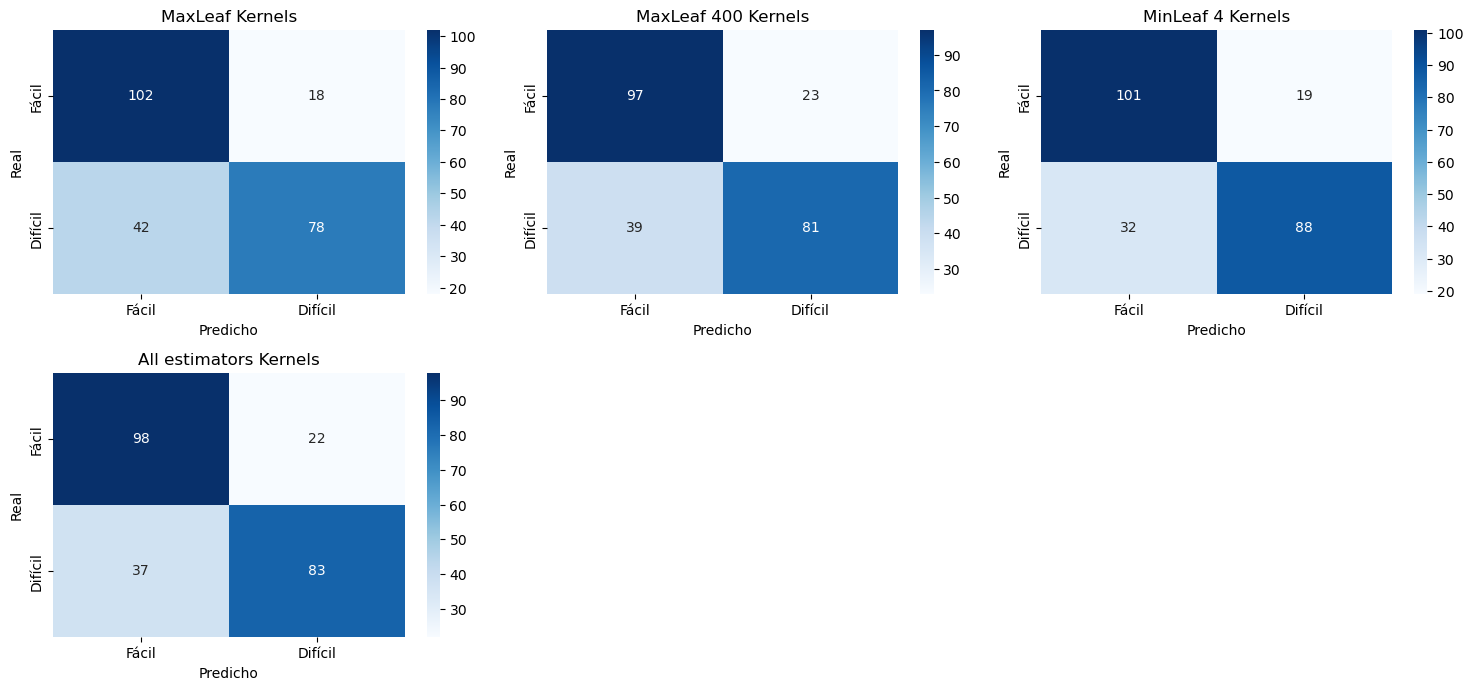

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = ["MaxLeaf", "MaxLeaf 400", "MinLeaf 4", "All estimators"]
matrices_confusion = {
    "MaxLeaf": np.array([[102, 18], [42, 78]]),
    "MaxLeaf 400": np.array([[97, 23], [39, 81]]),  # Modifica estas matrices con tus datos reales
    "MinLeaf 4": np.array([[101, 19], [32, 88]]),
    "All estimators": np.array([[98, 22], [37, 83]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)

<h1 style="font-size:20px;">Feature distancia euclidiana</h1>

In [414]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])
# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas


In [41]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Asumiendo que tienes un diccionario de DataFrames con tus series originales
series_originales = series_resampled
# Paso 1: Calcular el promedio de X e Y para cada serie de tiempo
promedios = {key: (df['x'].mean(), df['y'].mean()) for key, df in series_originales.items()}

# Paso 2: Calcular la distancia euclidiana para cada punto en la serie respecto al promedio
distancias_euclidianas = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = promedios[key]
    distancias = np.sqrt((df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2)
    distancias_euclidianas[key] = distancias

# Paso 3: Realizar el stretching de las distancias euclidianas
max_longitud = max(len(distancias) for distancias in distancias_euclidianas.values())
distancias_estiradas = {}
for key, distancias in distancias_euclidianas.items():
    x_original = np.linspace(0, 1, len(distancias))
    x_stretch = np.linspace(0, 1, max_longitud)
    interpolator = interp1d(x_original, distancias, kind='linear', fill_value="extrapolate")
    distancias_estiradas[key] = interpolator(x_stretch)



# Paso 4: Construir un nuevo DataFrame para las distancias y luego concatenar
distancias_df = pd.DataFrame({f'D{j}': np.nan for j in range(1, max_longitud + 1)}, index=df_final.index)

for i, distancias in enumerate(distancias_estiradas.values()):
    distancias_df.iloc[i, :len(distancias)] = distancias  # Uso de .iloc en lugar de .loc

df_final_sin_etiqueta = df_final.drop('etiqueta', axis=1)
df_final_con_distancias = pd.concat([df_final_sin_etiqueta, distancias_df], axis=1)

# Añadir la columna de etiquetas al final
df_final_con_distancias['etiqueta'] = df_final['etiqueta']

# Mostrar el DataFrame final
print(df_final_con_distancias)


             X1          X2          X3          X4          X5          X6  \
0    554.913217  559.855362  562.869825  564.884289  565.927681  565.086783   
1    575.955112  581.910224  586.887781  589.910224  592.887781  594.910224   
2    593.000000  593.975062  594.000000  594.000000  593.062344  592.074813   
3    572.937157  576.916209  579.905736  582.874314  585.842893  587.874314   
4    454.875312  465.725686  476.588529  488.401496  500.251870  511.177057   
..          ...         ...         ...         ...         ...         ...   
235  468.939651  479.879302  491.802494  503.736658  517.615960  531.539152   
236  545.000000  543.088279  535.529676  526.794514  516.213840  503.721446   
237  549.935786  554.871571  559.807357  564.743142  570.614713  576.537656   
238  523.080923  512.161845  501.242768  490.323691  483.257481  479.176559   
239  178.902244  189.731172  201.560100  215.315711  231.961347  252.460349   

             X7          X8          X9         X10

In [422]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_distancias.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_distancias['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 1000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)


Scores de cross-validation: [0.66666667 0.75       0.875      0.70833333 0.79166667 0.70833333
 0.83333333 0.79166667 0.70833333 0.625     ]
Promedio de los scores: 0.7458333333333333
Matriz de confusión:
[[94 26]
 [35 85]]


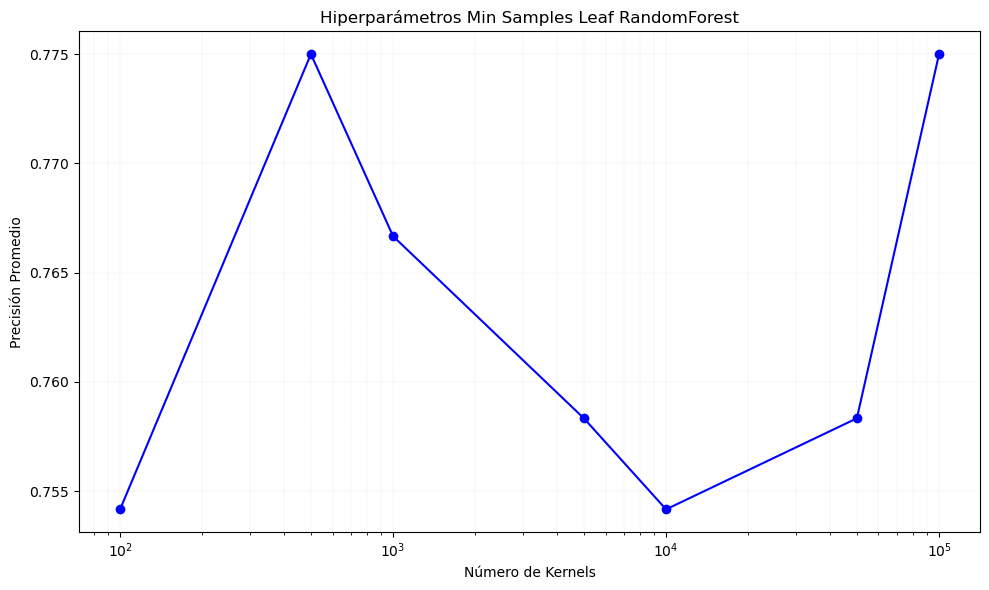

In [536]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

arrayDistanciaEuclidiana=[ [0.75, 0.70833333, 0.75, 0.70833333, 0.83333333, 0.75,
0.83333333, 0.79166667, 0.70833333, 0.70833333], [0.79166667, 0.75, 0.83333333, 0.70833333, 0.83333333, 0.75,
0.83333333, 0.79166667, 0.75, 0.70833333],[0.75, 0.75, 0.83333333, 0.70833333, 0.79166667, 0.75,
0.83333333, 0.75, 0.75, 0.75], [0.70833333, 0.79166667, 0.79166667, 0.70833333, 0.83333333, 0.70833333,
0.83333333, 0.79166667, 0.66666667, 0.75],[0.70833333, 0.70833333, 0.875, 0.70833333, 0.875, 0.70833333,
0.79166667, 0.75, 0.70833333, 0.70833333], [0.70833333, 0.75, 0.875, 0.70833333, 0.79166667, 0.70833333,
0.83333333, 0.79166667, 0.70833333, 0.70833333], [0.70833333, 0.70833333, 0.875, 0.70833333, 0.875, 0.875,
0.79166667, 0.75, 0.70833333, 0.75]]

promedios = [np.mean(valores) for valores in arrayDistanciaEuclidiana]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros Min Samples Leaf RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


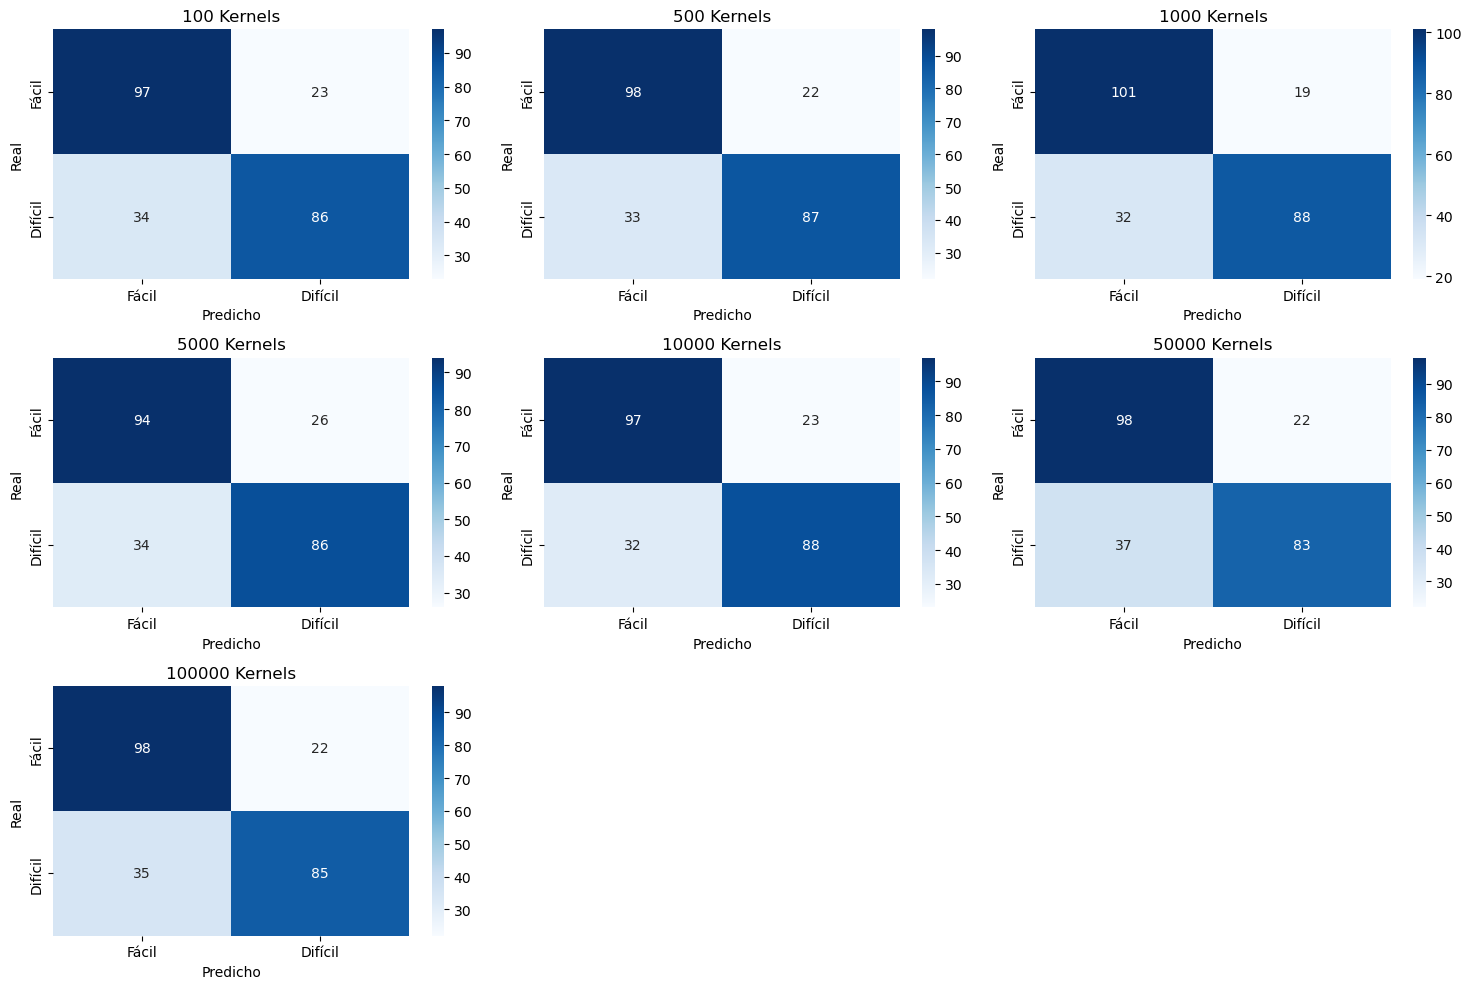

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionArrayDistancia = {
    100: np.array([[97, 23], [34, 86]]),
    500: np.array([[98, 22], [33, 87]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[101, 19], [32, 88]]),
    5000: np.array([[94, 26], [34, 86]]),
    10000: np.array([[97, 23], [32, 88]]),
    50000: np.array([[98, 22], [37, 83]]),
    100000: np.array([[98, 22], [35, 85]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayDistancia)

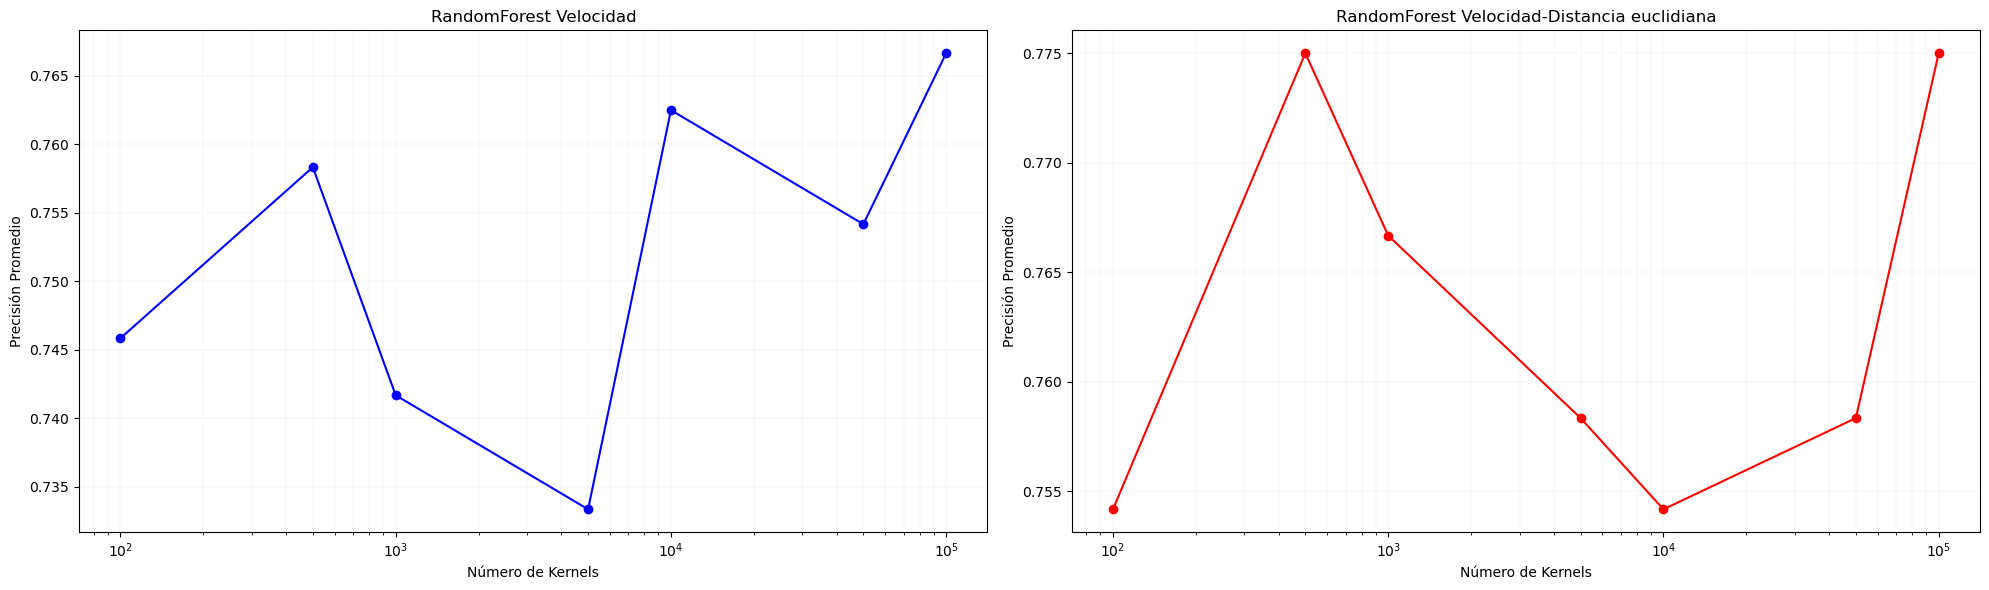

In [539]:
# Crear la figura general y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
promedios_arrayVelocidad = [np.mean(valores) for valores in arrayVelocidad]
promedios_arrayDistanciaEuclidiana = [np.mean(valores) for valores in arrayDistanciaEuclidiana]


# Primer subplot para ridgeClassifierxy
axs[0].plot(numeroKernels, promedios_arrayVelocidad, marker='o', linestyle='-', color='b')
axs[0].set_title('RandomForest Velocidad')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot para randomForestxy
axs[1].plot(numeroKernels, promedios_arrayDistanciaEuclidiana, marker='o', linestyle='-', color='r')
axs[1].set_title('RandomForest Velocidad-Distancia euclidiana')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

plt.tight_layout()
plt.show()

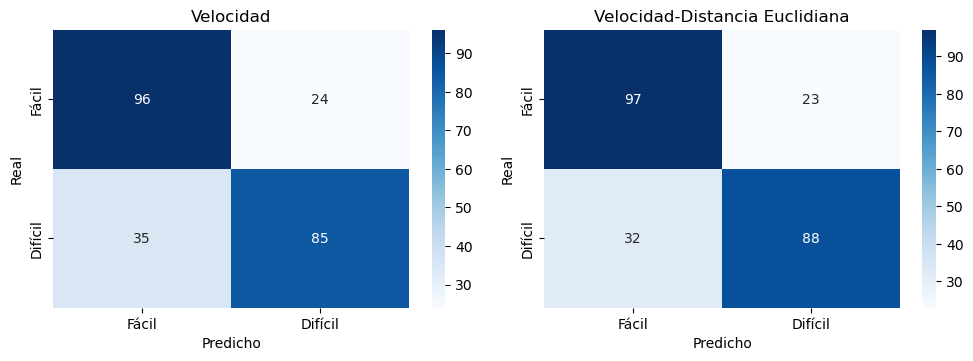

In [544]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = ['Velocidad', 'Velocidad-Distancia Euclidiana']
matrices_confusionArrayDistancia = {
    'Velocidad': np.array([[96, 24], [35, 85]]),
    'Velocidad-Distancia Euclidiana':  np.array([[97, 23], [32, 88]]), 
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayDistancia)

<h1 style="font-size:20px;">Por tareas FEATURE DISTANCIA EUCLIDIANA</h1>

In [545]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Numerico' in nombre_archivo:
        return 'numerico'
    elif 'Verbal' in nombre_archivo:
        return 'verbal'
    elif 'Secuencial' in nombre_archivo:
        return 'secuencial'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])
# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Asumiendo que tienes un diccionario de DataFrames con tus series originales
series_originales = series_resampled
# Paso 1: Calcular el promedio de X e Y para cada serie de tiempo
promedios = {key: (df['x'].mean(), df['y'].mean()) for key, df in series_originales.items()}

# Paso 2: Calcular la distancia euclidiana para cada punto en la serie respecto al promedio
distancias_euclidianas = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = promedios[key]
    distancias = np.sqrt((df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2)
    distancias_euclidianas[key] = distancias

# Paso 3: Realizar el stretching de las distancias euclidianas
max_longitud = max(len(distancias) for distancias in distancias_euclidianas.values())
distancias_estiradas = {}
for key, distancias in distancias_euclidianas.items():
    x_original = np.linspace(0, 1, len(distancias))
    x_stretch = np.linspace(0, 1, max_longitud)
    interpolator = interp1d(x_original, distancias, kind='linear', fill_value="extrapolate")
    distancias_estiradas[key] = interpolator(x_stretch)



# Paso 4: Construir un nuevo DataFrame para las distancias y luego concatenar
distancias_df = pd.DataFrame({f'D{j}': np.nan for j in range(1, max_longitud + 1)}, index=df_final.index)
for i, distancias in enumerate(distancias_estiradas.values()):
    distancias_df.iloc[i, :len(distancias)] = distancias  # Uso de .iloc en lugar de .loc

df_final_sin_etiqueta = df_final.drop('etiqueta', axis=1)
df_final_con_distancias = pd.concat([df_final_sin_etiqueta, distancias_df], axis=1)

# Añadir la columna de etiquetas al final
df_final_con_distancias['etiqueta'] = df_final['etiqueta']

# Mostrar el DataFrame final
#print(df_final_con_distancias)



In [546]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_distancias.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_distancias['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 100 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["numerico", "verbal","secuencial"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)


Scores de cross-validation: [0.375      0.33333333 0.41666667 0.29166667 0.20833333 0.45833333
 0.25       0.33333333 0.45833333 0.375     ]
Promedio de los scores: 0.35
Matriz de confusión:
[[30 26 24]
 [31 27 22]
 [34 25 21]]


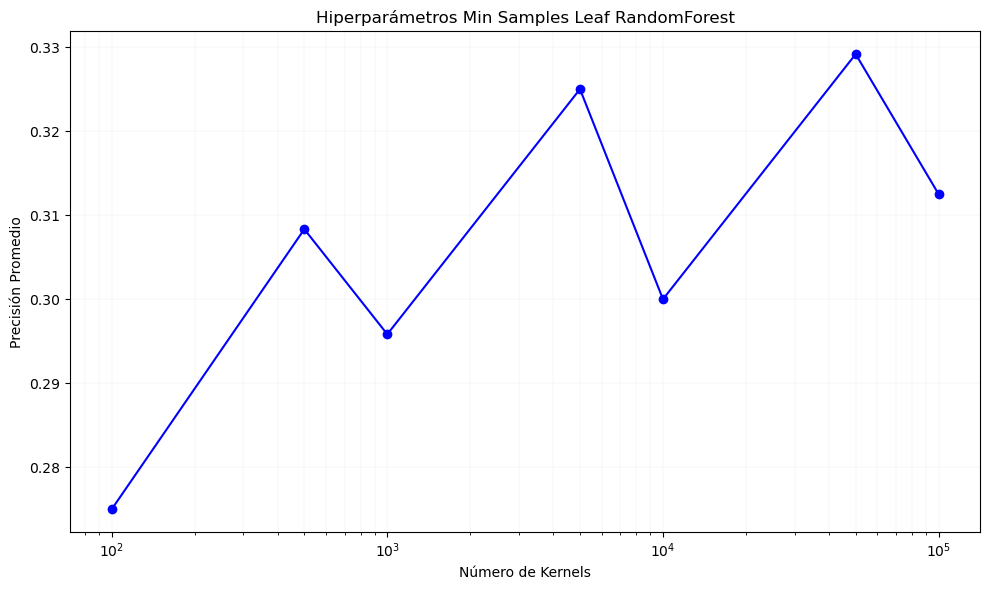

In [550]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
arrayDistanciaTarea = [[0.33333333, 0.29166667, 0.33333333, 0.16666667, 0.125, 0.20833333,
0.25, 0.33333333, 0.5, 0.20833333], [0.45833333, 0.41666667, 0.29166667, 0.29166667, 0.20833333, 0.41666667,
0.25, 0.25, 0.29166667, 0.20833333], [0.375, 0.41666667, 0.33333333, 0.25, 0.125, 0.33333333,
0.20833333, 0.16666667, 0.41666667, 0.33333333], [0.375, 0.33333333, 0.375, 0.16666667, 0.25, 0.41666667,
0.29166667, 0.33333333, 0.45833333, 0.25], [0.33333333, 0.33333333, 0.41666667, 0.29166667, 0.125, 0.25,
0.16666667, 0.54166667, 0.33333333, 0.20833333], [0.45833333, 0.41666667, 0.29166667, 0.29166667, 0.20833333, 0.41666667,
0.25, 0.25, 0.29166667, 0.41666667], [0.375, 0.41666667, 0.33333333, 0.25, 0.125, 0.33333333,
0.2083333, 0.33333333, 0.41666667, 0.33333333]]

promedios = [np.mean(valores) for valores in arrayDistanciaTarea]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros Min Samples Leaf RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

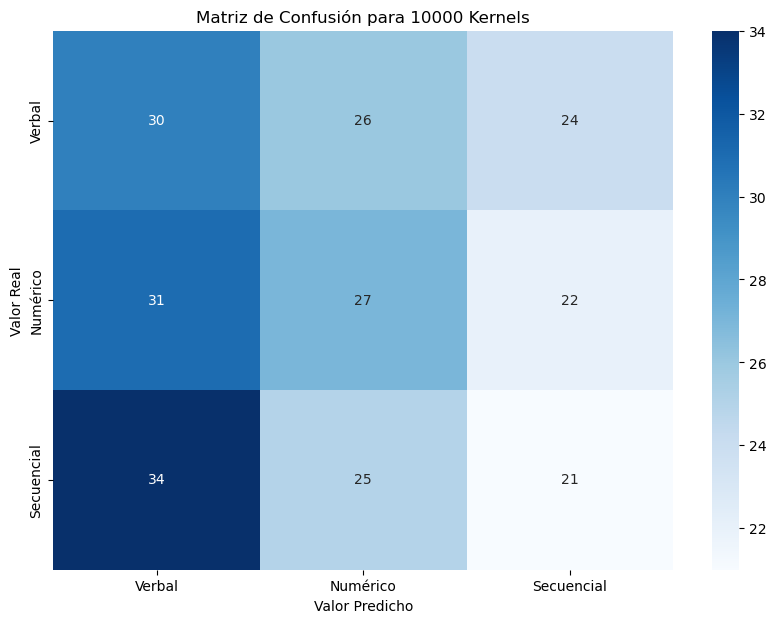

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusion = {
    10000: np.array([[30, 26, 24],[31, 27, 22], [34, 25, 21]]),  # Matriz 3x3
}

def plot_confusion_matrix(kernel_number, confusion_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Matriz de Confusión para 10000 Kernels')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.xticks([0.5, 1.5, 2.5], ['Verbal', 'Numérico', 'Secuencial'])
    plt.yticks([0.5, 1.5, 2.5], ['Verbal', 'Numérico', 'Secuencial'], va='center')
    plt.show()

# Ejemplo de uso para el número de kernels 100
plot_confusion_matrix(10000, matrices_confusion[10000])

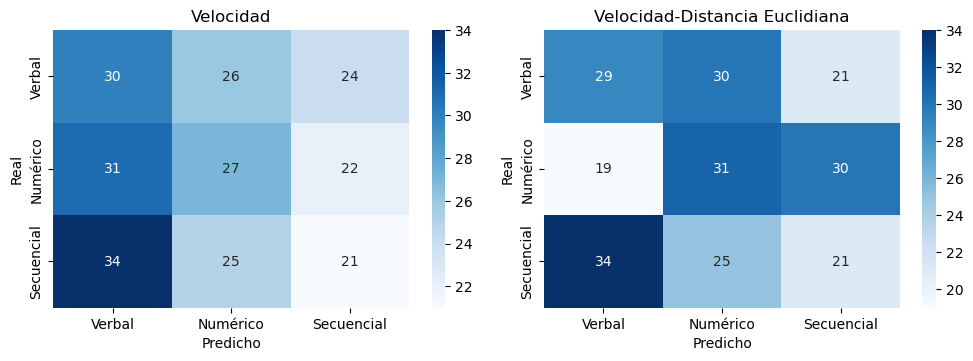

In [561]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = ["Velocidad", "Velocidad-Distancia Euclidiana"]
matrices_confusion = {
    "Velocidad": np.array([[30, 26, 24],[31, 27, 22], [34, 25, 21]]),  # Matriz 3x3
    "Velocidad-Distancia Euclidiana": np.array([[29, 30, 21], [19, 31, 30], [34, 25, 21]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5, 2.5], ['Verbal', 'Numérico', 'Secuencial'])
        plt.yticks([0.5, 1.5, 2.5], ['Verbal', 'Numérico', 'Secuencial'], va='center')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)


In [429]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'NumericoFacil' in nombre_archivo:
        return 'numericofacil'
    elif 'NumericoDificil' in nombre_archivo:
        return 'numericodificil'
    elif 'VerbalFacil' in nombre_archivo:
        return 'verbalfacil'
    elif 'VerbalDificil' in nombre_archivo:
        return 'verbaldificil'
    elif 'SecuencialDificil' in nombre_archivo:
        return 'secuencialdificil'
    elif 'SecuencialFacil' in nombre_archivo:
        return 'secuencialfacil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])


# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas


import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Asumiendo que tienes un diccionario de DataFrames con tus series originales
series_originales = series_resampled
# Paso 1: Calcular el promedio de X e Y para cada serie de tiempo
promedios = {key: (df['x'].mean(), df['y'].mean()) for key, df in series_originales.items()}

# Paso 2: Calcular la distancia euclidiana para cada punto en la serie respecto al promedio
distancias_euclidianas = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = promedios[key]
    distancias = np.sqrt((df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2)
    distancias_euclidianas[key] = distancias

# Paso 3: Realizar el stretching de las distancias euclidianas
max_longitud = max(len(distancias) for distancias in distancias_euclidianas.values())
distancias_estiradas = {}
for key, distancias in distancias_euclidianas.items():
    x_original = np.linspace(0, 1, len(distancias))
    x_stretch = np.linspace(0, 1, max_longitud)
    interpolator = interp1d(x_original, distancias, kind='linear', fill_value="extrapolate")
    distancias_estiradas[key] = interpolator(x_stretch)



# Paso 4: Construir un nuevo DataFrame para las distancias y luego concatenar
distancias_df = pd.DataFrame({f'D{j}': np.nan for j in range(1, max_longitud + 1)}, index=df_final.index)
for i, distancias in enumerate(distancias_estiradas.values()):
    distancias_df.iloc[i, :len(distancias)] = distancias  # Uso de .iloc en lugar de .loc

df_final_sin_etiqueta = df_final.drop('etiqueta', axis=1)
df_final_con_distancias = pd.concat([df_final_sin_etiqueta, distancias_df], axis=1)

# Añadir la columna de etiquetas al final
df_final_con_distancias['etiqueta'] = df_final['etiqueta']

# Mostrar el DataFrame final
#print(df_final_con_distancias)



In [436]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_distancias.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_distancias['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 100 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["numericofacil","numericodificil", "verbalfacil","verbaldificil","secuencialfacil","secuencialdificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)


Scores de cross-validation: [0.29166667 0.20833333 0.33333333 0.25       0.29166667 0.29166667
 0.16666667 0.29166667 0.08333333 0.16666667]
Promedio de los scores: 0.2375
Matriz de confusión:
[[13  0 11  5 10  1]
 [ 5  8  3 10  3 11]
 [14  1  7  7 11  0]
 [ 2 11  8  2  5 12]
 [14  2  9  3  9  3]
 [ 3 12  4  5  3 13]]


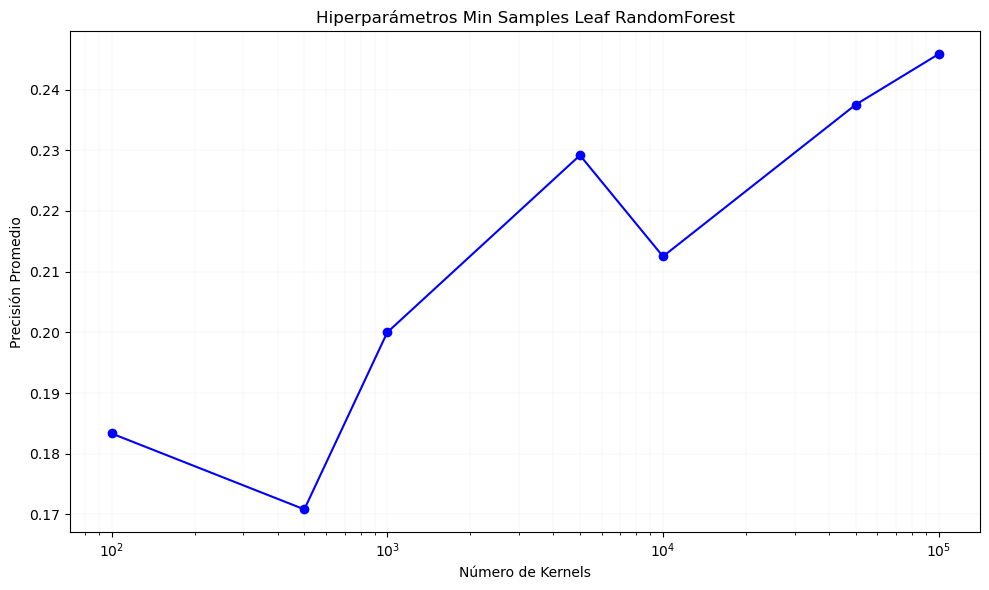

In [562]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
arrayDistanciaTarea = [[0.125, 0.125, 0.33333333, 0.125, 0.125, 0.25,
0.20833333, 0.20833333, 0.16666667, 0.16666667], [0.125, 0.20833333, 0.20833333, 0.16666667, 0.20833333, 0.20833333,
0.16666667, 0.125, 0.125, 0.16666667], [0.20833333, 0.125, 0.20833333, 0.25, 0.16666667, 0.25,
0.125, 0.33333333, 0.16666667, 0.16666667], [0.20833333, 0.125, 0.33333333, 0.16666667, 0.20833333, 0.25,
0.125, 0.33333333, 0.25, 0.29166667], [0.20833333, 0.20833333, 0.29166667, 0.16666667, 0.25, 0.16666667,
0.16666667, 0.33333333, 0.16666667, 0.16666667], [0.29166667, 0.20833333, 0.33333333, 0.25, 0.29166667, 0.29166667,
0.16666667, 0.29166667, 0.08333333, 0.16666667], [0.29166667, 0.20833333, 0.33333333, 0.25, 0.29166667, 0.29166667,
0.16666667, 0.29166667, 0.16666667, 0.16666667]]

promedios = [np.mean(valores) for valores in arrayDistanciaTarea]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Hiperparámetros Min Samples Leaf RandomForest')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

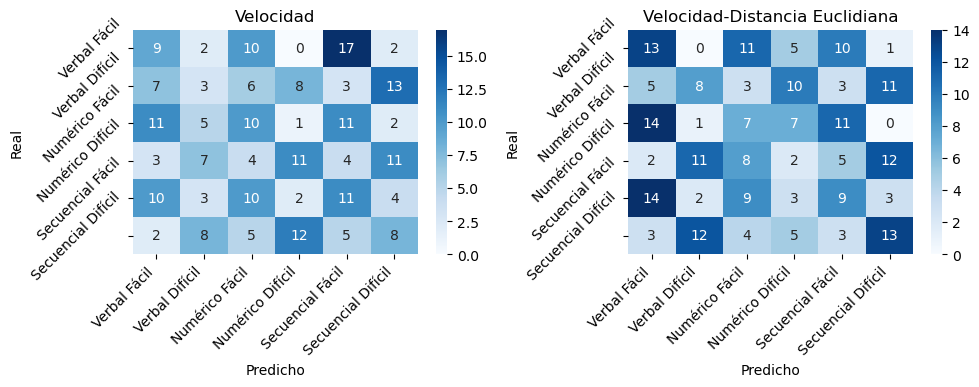

In [564]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los números de kernels y las matrices de confusión correspondientes
numeroKernels = ["Velocidad", "Velocidad-Distancia Euclidiana"]
matrices_confusion = {
    "Velocidad":  np.array([[9, 2, 10, 0, 17, 2],
                             [7, 3, 6, 8, 3, 13],
                             [11, 5, 10, 1, 11, 2],
                             [3, 7, 4, 11, 4, 11],
                             [10, 3, 10, 2, 11, 4],
                             [2, 8, 5, 12, 5, 8]]),  # Matriz 3x3
    "Velocidad-Distancia Euclidiana": np.array([[13, 0, 11, 5, 10, 1],
 [ 5, 8, 3, 10, 3, 11],
 [14, 1, 7, 7, 11, 0],
 [ 2, 11, 8, 2, 5, 12],
 [14, 2, 9, 3, 9, 3],
 [ 3, 12, 4, 5, 3, 13]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        etiquetas = ['Verbal Fácil', 'Verbal Difícil', 'Numérico Fácil', 'Numérico Difícil', 'Secuencial Fácil', 'Secuencial Difícil']
        plt.xticks(np.arange(6) + 0.5, etiquetas, rotation=45, ha='right')
        plt.yticks(np.arange(6) + 0.5, etiquetas, rotation=45, va='center')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusion)


<h1 style="font-size:20px;">Feature X2 y Y2</h1>


In [438]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])

# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Asumiendo que tienes un diccionario de DataFrames con tus series originales
series_originales = series_resampled
# Paso 1: Calcular el promedio de X e Y para cada serie de tiempo
promedios = {key: (df['x'].mean(), df['y'].mean()) for key, df in series_originales.items()}

# Paso 2: Calcular la distancia euclidiana para cada punto en la serie respecto al promedio
distancias_euclidianas = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = promedios[key]
    distancias = (df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2
    distancias_euclidianas[key] = distancias

# Paso 3: Realizar el stretching de las distancias euclidianas
max_longitud = max(len(distancias) for distancias in distancias_euclidianas.values())
distancias_estiradas = {}
for key, distancias in distancias_euclidianas.items():
    x_original = np.linspace(0, 1, len(distancias))
    x_stretch = np.linspace(0, 1, max_longitud)
    interpolator = interp1d(x_original, distancias, kind='linear', fill_value="extrapolate")
    distancias_estiradas[key] = interpolator(x_stretch)



# Paso 4: Construir un nuevo DataFrame para las distancias y luego concatenar
distancias_df = pd.DataFrame({f'D{j}': np.nan for j in range(1, max_longitud + 1)}, index=df_final.index)
for i, distancias in enumerate(distancias_estiradas.values()):
    distancias_df.iloc[i, :len(distancias)] = distancias  # Uso de .iloc en lugar de .loc

df_final_sin_etiqueta = df_final.drop('etiqueta', axis=1)
df_final_con_distancias = pd.concat([df_final_sin_etiqueta, distancias_df], axis=1)

# Añadir la columna de etiquetas al final
df_final_con_distancias['etiqueta'] = df_final['etiqueta']

# Mostrar el DataFrame final

In [446]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_distancias.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_distancias['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 500 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Scores de cross-validation: [0.75       0.75       0.70833333 0.75       0.79166667 0.66666667
 0.58333333 0.79166667 0.66666667 0.79166667]
Promedio de los scores: 0.725
Matriz de confusión:
[[87 33]
 [38 82]]


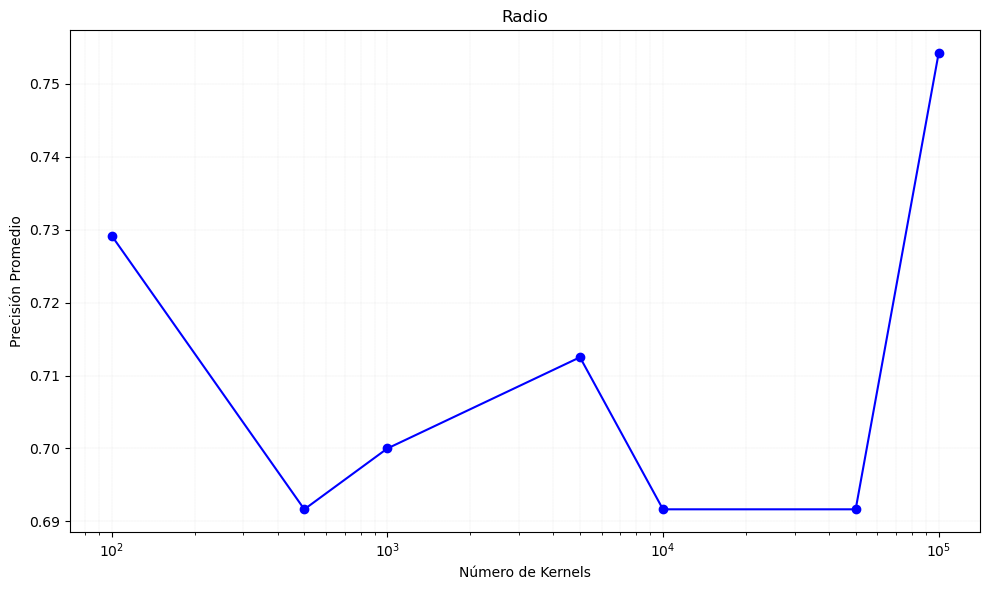

In [577]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

arrayRadio = [ [0.70833333, 0.66666667, 0.70833333, 0.75, 0.75, 0.79166667,
0.625, 0.83333333, 0.70833333, 0.75], [0.75, 0.625, 0.625, 0.66666667, 0.75, 0.70833333,
0.54166667, 0.75, 0.70833333, 0.79166667], [0.70833333, 0.625, 0.625, 0.75, 0.79166667, 0.66666667,
0.625, 0.83333333, 0.66666667, 0.70833333], [0.70833333, 0.70833333, 0.70833333, 0.70833333, 0.79166667, 0.75,
0.625, 0.83333333, 0.58333333, 0.70833333], [0.70833333, 0.75, 0.58333333, 0.70833333, 0.79166667, 0.625,
0.54166667, 0.79166667, 0.625, 0.79166667], [0.70833333, 0.75, 0.58333333, 0.70833333, 0.79166667, 0.625,
0.54166667, 0.79166667, 0.625, 0.79166667], [0.70833333, 0.75, 0.75, 0.75, 0.83333333, 0.70833333,
0.875, 0.79166667, 0.70833333, 0.66666667]]

promedios = [np.mean(valores) for valores in arrayRadio]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Radio')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

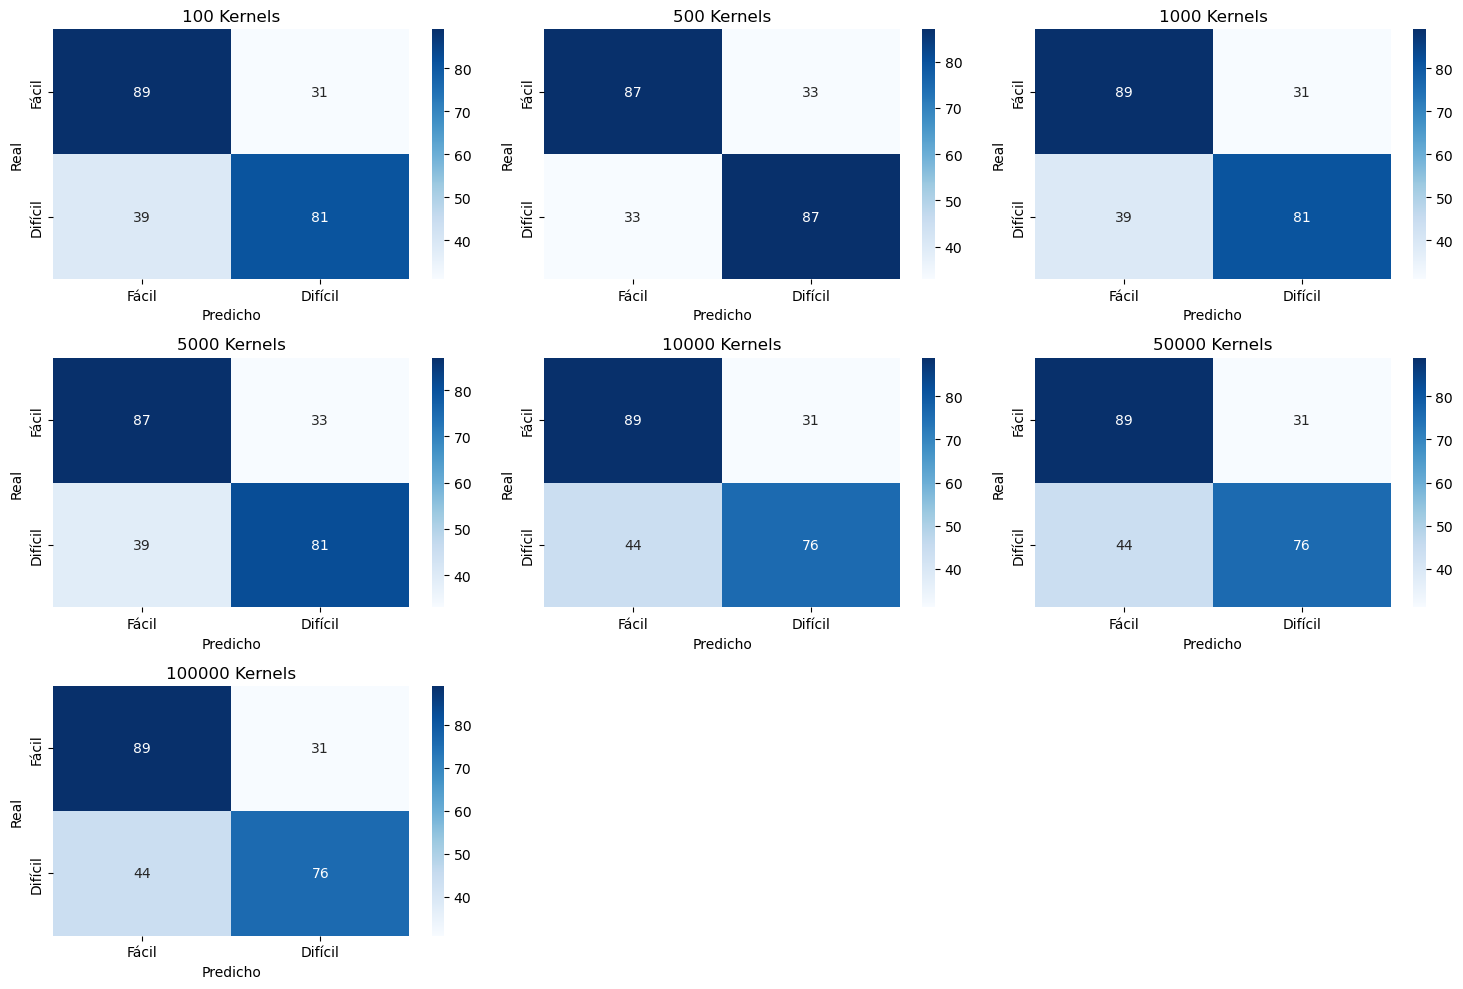

In [626]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionArrayRadio = {
    100: np.array([[89, 31], [39, 81]]),
    500: np.array([[87, 33], [33, 87]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[89, 31], [39, 81]]),
    5000: np.array([[87, 33], [39, 81]]),
    10000: np.array([[89, 31], [44, 76]]),
    50000: np.array([[89, 31], [44, 76]]),
    100000: np.array([[89, 31], [44, 76]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayRadio)

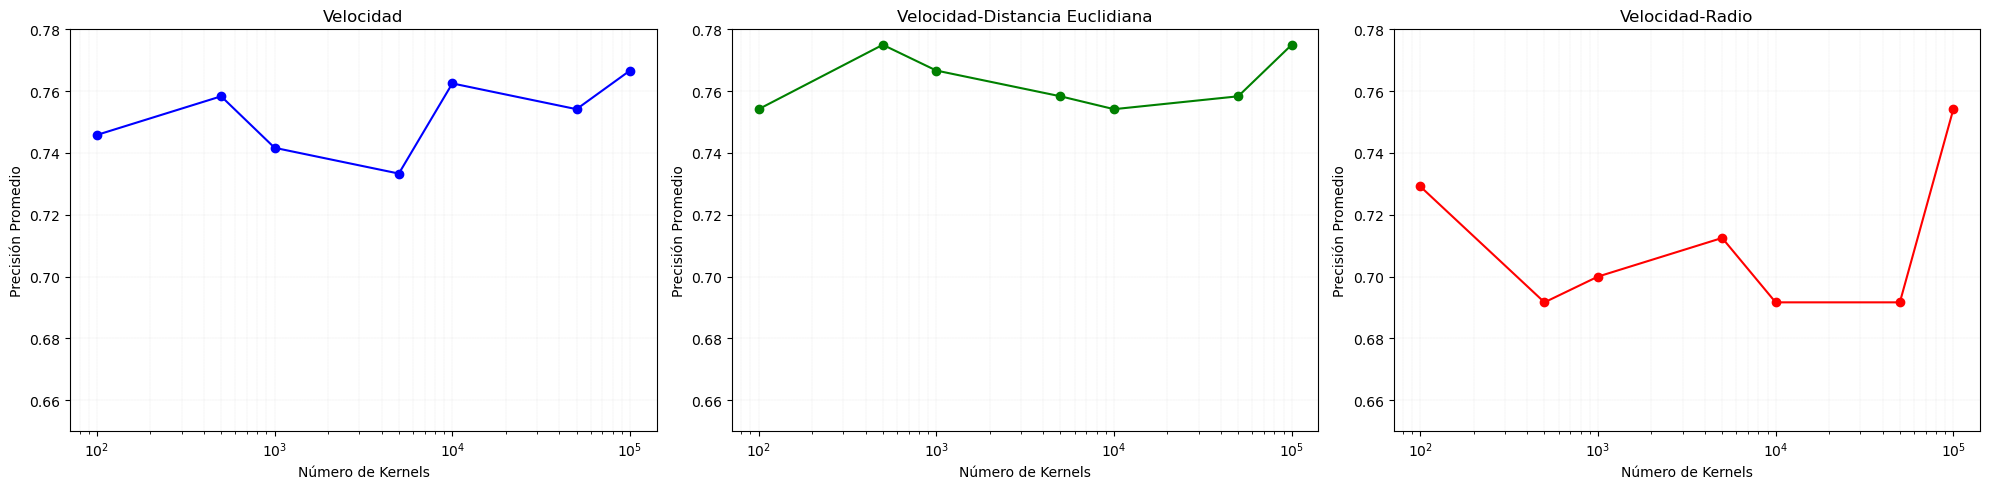

In [572]:
# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 fila, 4 columnas
colores = ['b', 'g', 'r', 'c']

y_lim_inferior = 0.65
y_lim_superior = 0.78

axs[0].plot(numeroKernels, [np.mean(valores) for valores in arrayVelocidad], marker='o', linestyle='-', color=colores[0])
axs[0].set_title('Velocidad')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].set_ylim(y_lim_inferior, y_lim_superior)
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot
axs[1].plot(numeroKernels, [np.mean(valores) for valores in arrayDistanciaEuclidiana], marker='o', linestyle='-', color=colores[1])
axs[1].set_title('Velocidad-Distancia Euclidiana')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].set_ylim(y_lim_inferior, y_lim_superior)
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

# Tercer subplot
axs[2].plot(numeroKernels, [np.mean(valores) for valores in arrayRadio], marker='o', linestyle='-', color=colores[2])
axs[2].set_title('Velocidad-Radio')
axs[2].set_xlabel('Número de Kernels')
axs[2].set_ylabel('Precisión Promedio')
axs[2].set_xscale('log')
axs[2].set_ylim(y_lim_inferior, y_lim_superior)
axs[2].grid(True, which="both", ls="--", linewidth=0.1)



# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

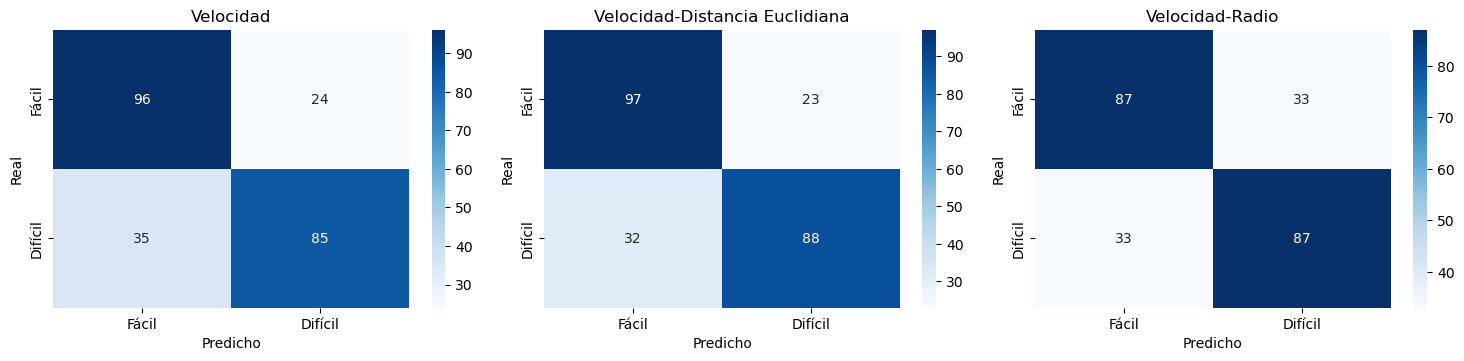

In [574]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = ['Velocidad', 'Velocidad-Distancia Euclidiana', 'Velocidad-Radio']
matrices_confusionArrayRadio = {
    'Velocidad': np.array([[96, 24], [35, 85]]),
    'Velocidad-Distancia Euclidiana':  np.array([[97, 23], [32, 88]]), 
    'Velocidad-Radio': np.array([[87, 33], [33, 87]]),  # Modifica estas matrices con tus datos reales
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayRadio)

<h1 style="font-size:16px;">"ANALISIS NUEVO FEATURE DISTANCIA EUCLIDIANA Y X2 y Y2"</h1>

In [448]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
print(df_final[columnas_seleccionadas])
# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Asumiendo que tienes un diccionario de DataFrames con tus series originales
series_originales = series_resampled
# Paso 1: Calcular el promedio de X e Y para cada serie de tiempo
promedios = {key: (df['x'].mean(), df['y'].mean()) for key, df in series_originales.items()}

# Paso 2: Calcular la distancia euclidiana para cada punto en la serie respecto al promedio
distancias_euclidianas = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = promedios[key]
    distancias = np.sqrt((df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2)
    distancias_euclidianas[key] = distancias

# Paso 3: Realizar el stretching de las distancias euclidianas
max_longitud = max(len(distancias) for distancias in distancias_euclidianas.values())
distancias_estiradas = {}
for key, distancias in distancias_euclidianas.items():
    x_original = np.linspace(0, 1, len(distancias))
    x_stretch = np.linspace(0, 1, max_longitud)
    interpolator = interp1d(x_original, distancias, kind='linear', fill_value="extrapolate")
    distancias_estiradas[key] = interpolator(x_stretch)



# Paso 4: Construir un nuevo DataFrame para las distancias y luego concatenar
distancias_df = pd.DataFrame({f'D{j}': np.nan for j in range(1, max_longitud + 1)}, index=df_final.index)
for i, distancias in enumerate(distancias_estiradas.values()):
    distancias_df.iloc[i, :len(distancias)] = distancias  # Uso de .iloc en lugar de .loc

df_final_sin_etiqueta = df_final.drop('etiqueta', axis=1)
df_final_con_distancias = pd.concat([df_final_sin_etiqueta, distancias_df], axis=1)

# Añadir la columna de etiquetas al final
df_final_con_distancias['etiqueta'] = df_final['etiqueta']

# Mostrar el DataFrame final
#print(df_final_con_distancias)


        X1          X2       Y8020  Y8021 etiqueta
0    410.0  388.271571  408.938279  404.0    facil
1    525.0  530.957357  289.042643  295.0  dificil
2    367.0  362.059850  359.463748  358.0  dificil
3    486.0  492.910100  450.038529  453.0  dificil
4    546.0  547.897257  290.359601  297.0  dificil
..     ...         ...         ...    ...      ...
235  344.0  338.073317  330.743392  310.0    facil
236  565.5  586.750686  310.046384  314.0  dificil
237  506.0  490.187531  155.533521  157.0  dificil
238  604.0  608.950125  256.860349  243.0    facil
239  630.0  630.000000  414.880939  416.0  dificil

[240 rows x 5 columns]


In [449]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Utilizando series_originales que ya contiene tus series resampleadas
series_originales = series_resampled

# Paso adicional para calcular el "radio" (distancia euclidiana al cuadrado)
radios = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = (df['x'].mean(), df['y'].mean())
    radio = (df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2  # Distancia al cuadrado
    radios[key] = radio

# Realizar el stretching de los radios
radios_estirados = {}
max_longitud_radios = max([len(radio) for radio in radios.values()])
for key, radio in radios.items():
    x_original = np.linspace(0, 1, len(radio))
    x_stretch = np.linspace(0, 1, max_longitud_radios)
    interpolator = interp1d(x_original, radio, kind='linear', fill_value="extrapolate")
    radios_estirados[key] = interpolator(x_stretch)

# Crear DataFrame para los radios
radios_df = pd.DataFrame({f'R{j}': np.nan for j in range(1, max_longitud_radios + 1)}, index=df_final_con_distancias.index)
for i, radio in enumerate(radios_estirados.values()):
    radios_df.iloc[i, :len(radio)] = radio

# Concatenar los radios al DataFrame df_final_con_distancias antes de la columna 'etiqueta'
df_final_con_radios = pd.concat([df_final_con_distancias.drop('etiqueta', axis=1), radios_df, df_final_con_distancias[['etiqueta']]], axis=1)

# Mostrar el DataFrame final
#print(df_final_con_radios)

In [456]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_radios.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_radios['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 100 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Scores de cross-validation: [0.66666667 0.79166667 0.66666667 0.75       0.79166667 0.66666667
 0.625      0.83333333 0.66666667 0.70833333]
Promedio de los scores: 0.7166666666666667
Matriz de confusión:
[[88 32]
 [35 85]]


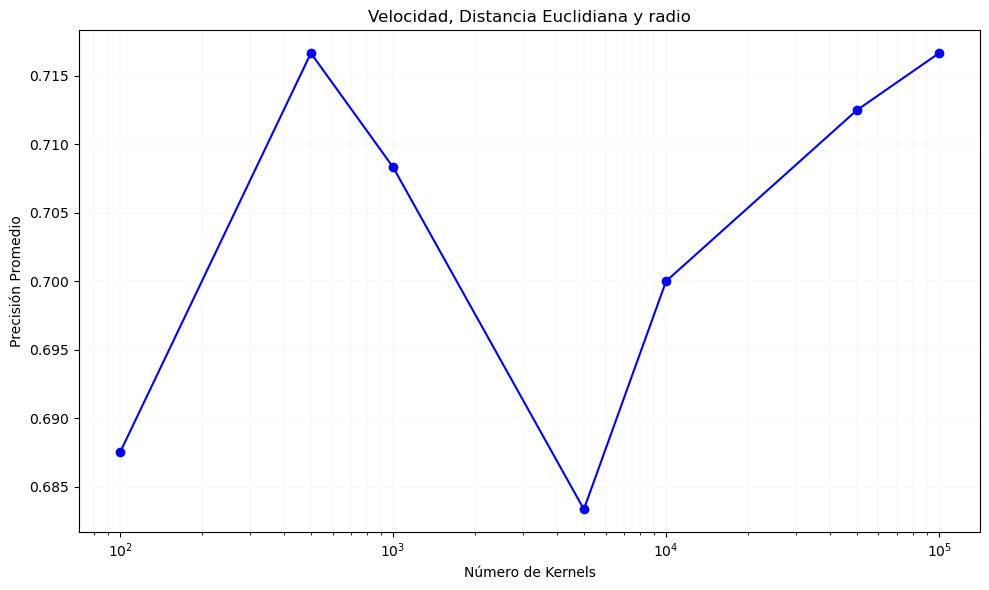

In [576]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

arrayRadioDistancia = [ [0.70833333, 0.70833333, 0.70833333, 0.66666667, 0.79166667, 0.66666667,
0.5, 0.83333333, 0.58333333, 0.70833333], [0.70833333, 0.79166667, 0.625, 0.70833333, 0.79166667, 0.75,
0.625, 0.79166667, 0.70833333, 0.66666667], [0.70833333, 0.70833333, 0.625, 0.66666667, 0.83333333, 0.70833333,
0.58333333, 0.83333333, 0.75, 0.66666667], [0.75, 0.66666667, 0.625, 0.66666667, 0.75, 0.70833333,
0.58333333, 0.75, 0.625, 0.70833333], [0.75, 0.70833333, 0.70833333, 0.70833333, 0.75, 0.66666667,
0.54166667, 0.79166667, 0.7083333,  0.66666667], [0.75, 0.70833333, 0.66666667, 0.625, 0.79166667, 0.66666667,
0.625, 0.875, 0.70833333, 0.70833333], [0.66666667, 0.79166667, 0.66666667, 0.75, 0.79166667, 0.66666667,
0.625, 0.83333333, 0.66666667, 0.70833333]]

promedios = [np.mean(valores) for valores in arrayRadioDistancia]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Velocidad, Distancia Euclidiana y radio')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 fila, 4 columnas
colores = ['b', 'g', 'r', 'c']

y_lim_inferior = 0.65
y_lim_superior = 0.78

axs[0].plot(numeroKernels, [np.mean(valores) for valores in arrayVelocidad], marker='o', linestyle='-', color=colores[0])
axs[0].set_title('Velocidad')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].set_ylim(y_lim_inferior, y_lim_superior)
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot
axs[1].plot(numeroKernels, [np.mean(valores) for valores in arrayDistanciaEuclidiana], marker='o', linestyle='-', color=colores[1])
axs[1].set_title('Velocidad-Distancia Euclidiana')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].set_ylim(y_lim_inferior, y_lim_superior)
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

# Tercer subplot
axs[2].plot(numeroKernels, [np.mean(valores) for valores in arrayRadio], marker='o', linestyle='-', color=colores[2])
axs[2].set_title('Velocidad-Radio')
axs[2].set_xlabel('Número de Kernels')
axs[2].set_ylabel('Precisión Promedio')
axs[2].set_xscale('log')
axs[2].set_ylim(y_lim_inferior, y_lim_superior)
axs[2].grid(True, which="both", ls="--", linewidth=0.1)



# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

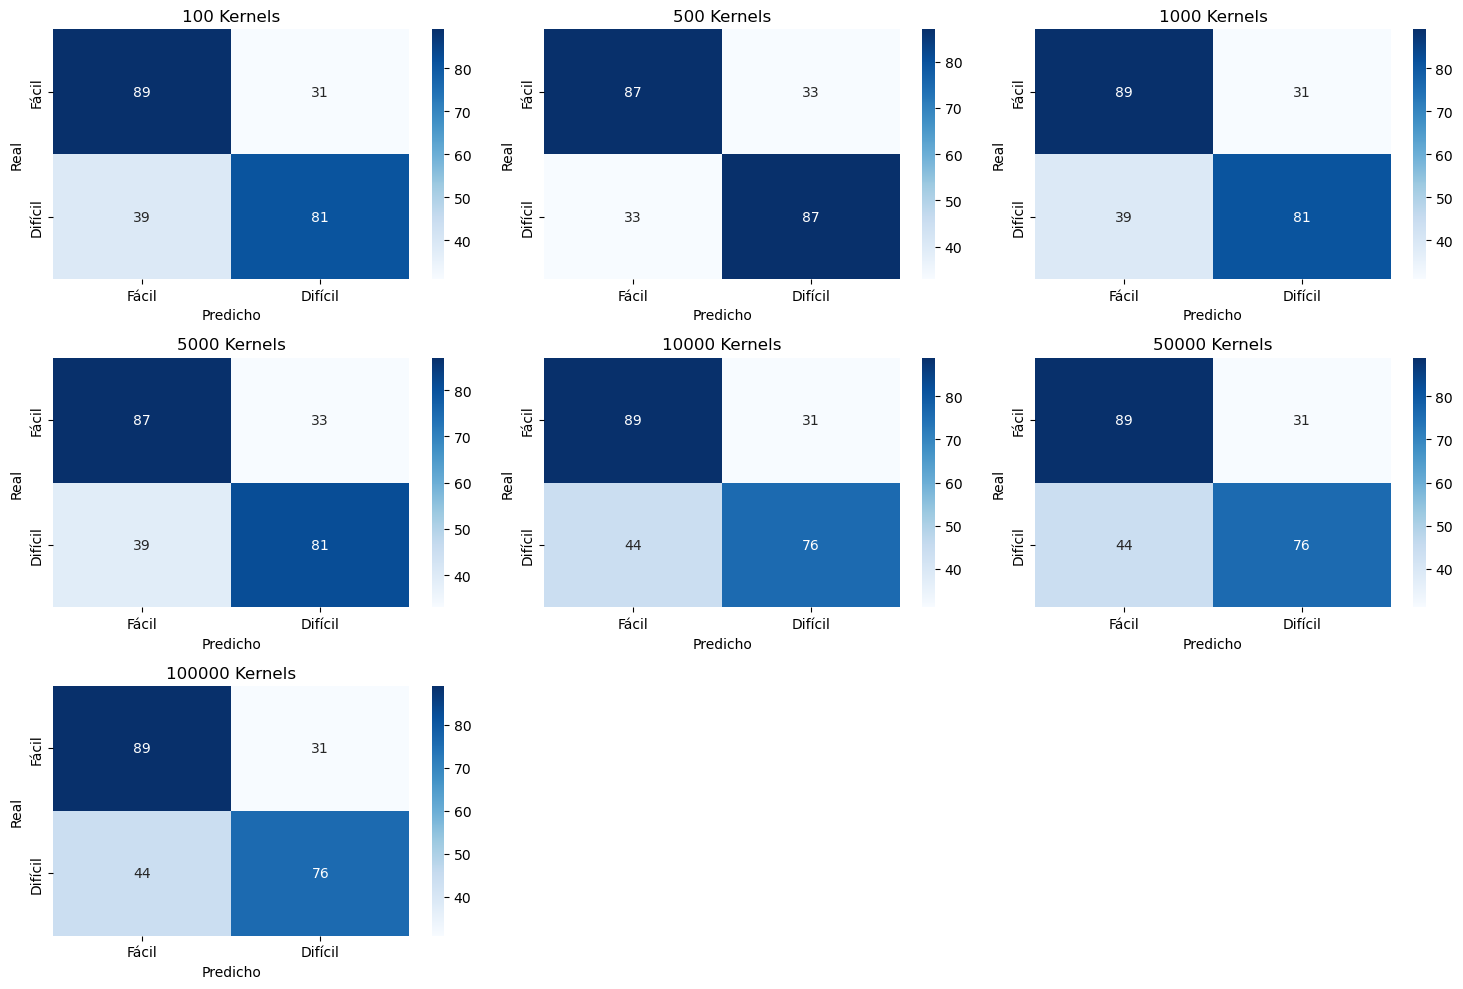

In [578]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionArrayRadioDistancia = {
    100: np.array([[89, 31], [39, 81]]),
    500: np.array([[87, 33], [33, 87]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[89, 31], [39, 81]]),
    5000: np.array([[87, 33], [39, 81]]),
    10000: np.array([[89, 31], [44, 76]]),
    50000: np.array([[89, 31], [44, 76]]),
    100000: np.array([[89, 31], [44, 76]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayRadioDistancia)

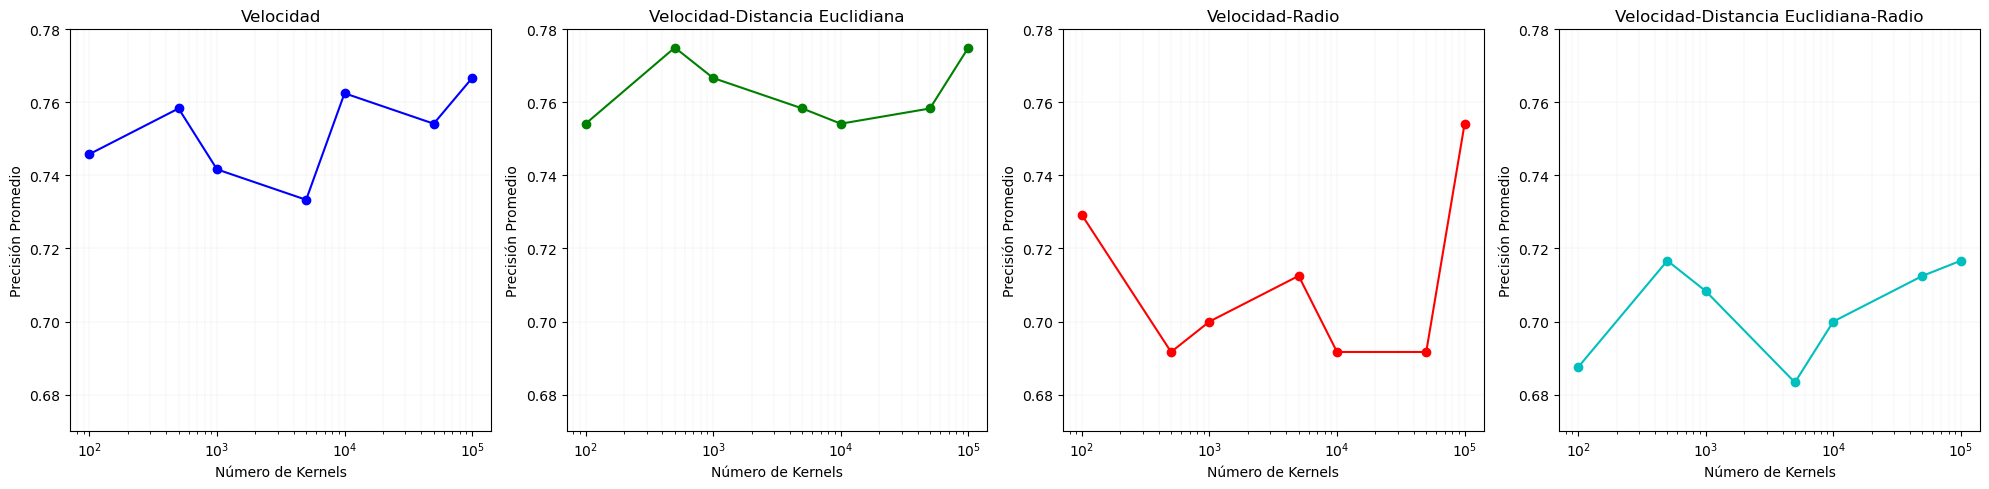

In [581]:
# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila, 4 columnas

# Colores para cada subplot
colores = ['b', 'g', 'r', 'c']

y_lim_inferior = 0.67
y_lim_superior = 0.78

axs[0].plot(numeroKernels, [np.mean(valores) for valores in arrayVelocidad], marker='o', linestyle='-', color=colores[0])
axs[0].set_title('Velocidad')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].set_ylim(y_lim_inferior, y_lim_superior)
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot
axs[1].plot(numeroKernels, [np.mean(valores) for valores in arrayDistanciaEuclidiana], marker='o', linestyle='-', color=colores[1])
axs[1].set_title('Velocidad-Distancia Euclidiana')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].set_ylim(y_lim_inferior, y_lim_superior)
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

# Tercer subplot
axs[2].plot(numeroKernels, [np.mean(valores) for valores in arrayRadio], marker='o', linestyle='-', color=colores[2])
axs[2].set_title('Velocidad-Radio')
axs[2].set_xlabel('Número de Kernels')
axs[2].set_ylabel('Precisión Promedio')
axs[2].set_xscale('log')
axs[2].set_ylim(y_lim_inferior, y_lim_superior)
axs[2].grid(True, which="both", ls="--", linewidth=0.1)

# Cuarto subplot
axs[3].plot(numeroKernels, [np.mean(valores) for valores in arrayRadioDistancia], marker='o', linestyle='-', color=colores[3])
axs[3].set_title('Velocidad-Distancia Euclidiana-Radio')
axs[3].set_xlabel('Número de Kernels')
axs[3].set_ylabel('Precisión Promedio')
axs[3].set_xscale('log')
axs[3].set_ylim(y_lim_inferior, y_lim_superior)
axs[3].grid(True, which="both", ls="--", linewidth=0.1)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


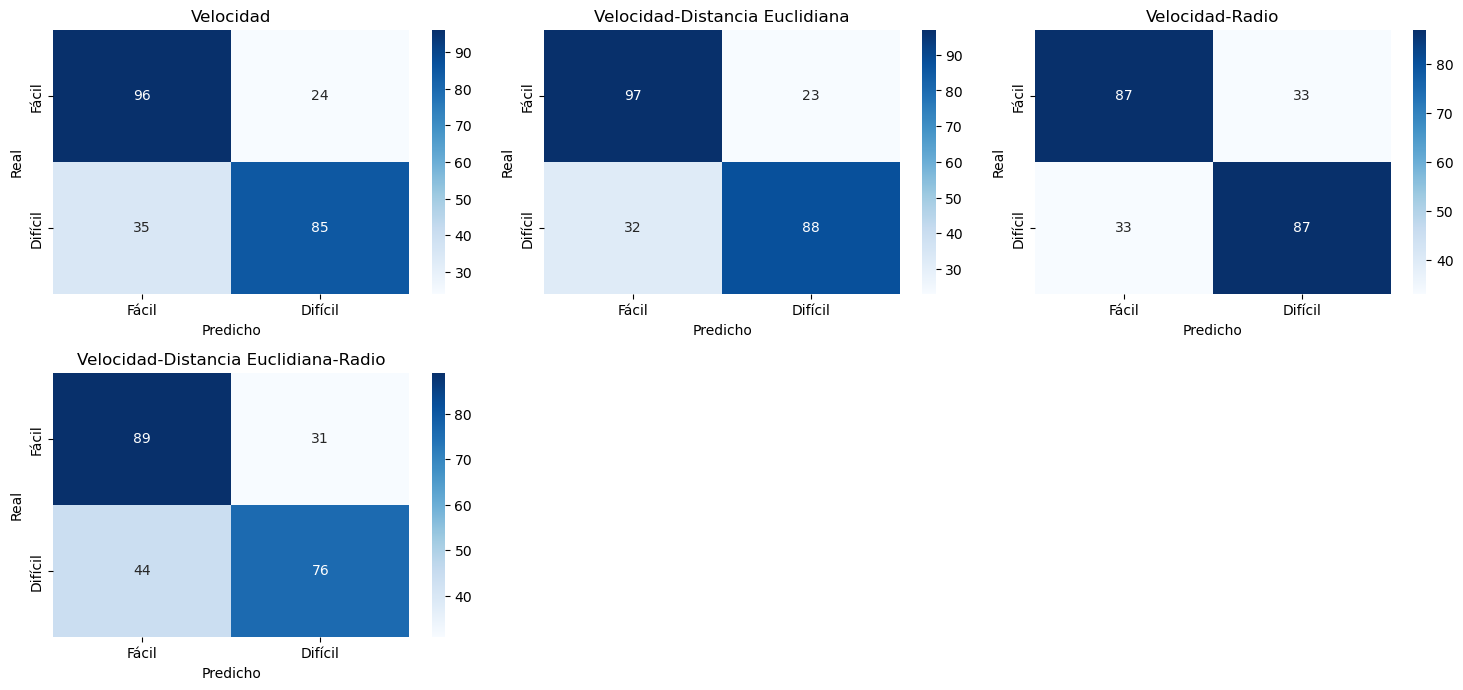

In [630]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = ["Velocidad", "Velocidad-Distancia Euclidiana", "Velocidad-Radio", "Velocidad-Distancia Euclidiana-Radio"]
matrices_confusionArrayRadio = {
    "Velocidad": np.array([[96, 24], [35, 85]]),
    'Velocidad-Distancia Euclidiana':  np.array([[97, 23], [32, 88]]), 
    'Velocidad-Radio': np.array([[87, 33], [33, 87]]),  
    "Velocidad-Distancia Euclidiana-Radio": np.array([[89, 31], [44, 76]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayRadio)

<h1 style="font-size:16px;">"ANALISIS NUEVO FEATURE ACELERACION"</h1>

In [460]:
datos_transformados = []
etiquetas = []


def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
#print(df_final[columnas_seleccionadas])

# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas



In [461]:
# Diccionario para almacenar las aceleraciones calculadas de cada archivo
aceleraciones_por_archivo = {}

for key, velocidades in velocidades_por_archivo.items():
    aceleraciones = [0]  # Inicializar el primer valor de aceleración como 0
    for i in range(1, len(velocidades)):
        # Calcular aceleración como cambio de velocidad dividido por cambio de tiempo
        # Asumiendo que el cambio de tiempo (delta_t) es constante y se deriva de la frecuencia de resampling
        delta_v = velocidades[i] - velocidades[i - 1]
        delta_t = 0.015  # Cambiar según tu frecuencia de resampling real
        aceleracion = delta_v / delta_t
        aceleraciones.append(aceleracion)
    
    aceleraciones_por_archivo[key] = aceleraciones

# Estirar las aceleraciones para que todas tengan la misma longitud
max_len_aceleraciones = max([len(a) for a in aceleraciones_por_archivo.values()])
aceleraciones_estiradas = {}

for key, aceleracion in aceleraciones_por_archivo.items():
    longitud_actual = len(aceleracion)
    x_shorter = np.linspace(0, 1, longitud_actual)
    x_longer = np.linspace(0, 1, max_len_aceleraciones)
    interpolator = interp1d(x_shorter, aceleracion, kind='linear', fill_value="extrapolate")
    stretched_aceleracion = interpolator(x_longer)
    aceleraciones_estiradas[key] = stretched_aceleracion

# Crear un DataFrame para las aceleraciones
aceleraciones_df = pd.DataFrame({f'A{j}': np.nan for j in range(1, max_len_aceleraciones + 1)}, index=df_final.index)
for i, aceleracion in enumerate(aceleraciones_estiradas.values()):
    aceleraciones_df.iloc[i, :len(aceleracion)] = aceleracion

# Añadir las aceleraciones al DataFrame final antes de la columna 'etiqueta'
columnas_antes_etiqueta = df_final.columns.tolist()[:-1]  # Todas las columnas excepto 'etiqueta'
df_final_con_aceleraciones = pd.concat([df_final[columnas_antes_etiqueta], aceleraciones_df, df_final[['etiqueta']]], axis=1)


In [470]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_aceleraciones.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_aceleraciones['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 1000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)


Scores de cross-validation: [0.70833333 0.75       0.79166667 0.79166667 0.83333333 0.70833333
 0.75       0.83333333 0.66666667 0.70833333]
Promedio de los scores: 0.7541666666666667
Matriz de confusión:
[[93 27]
 [35 85]]


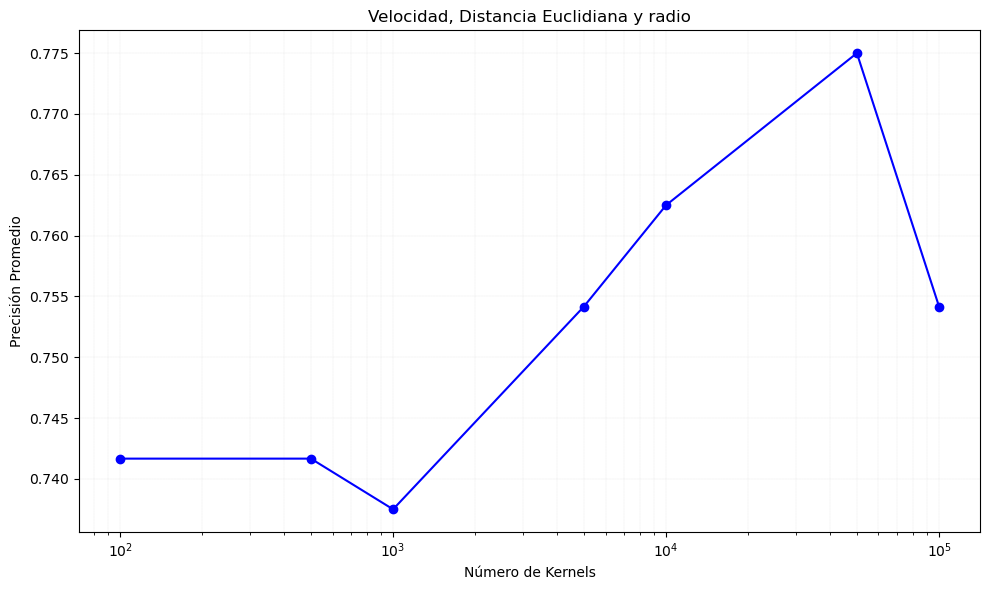

In [583]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

arrayAceleraciones = [ [0.625, 0.70833333, 0.83333333, 0.79166667, 0.83333333, 0.70833333, 
0.79166667, 0.83333333, 0.66666667, 0.625], [0.625, 0.7083333, 0.83333333, 0.79166667, 0.79166667, 0.75,
0.70833333, 0.83333333, 0.70833333, 0.66666667], [0.58333333, 0.70833333, 0.875, 0.70833333, 0.83333333, 0.70833333,
0.75, 0.79166667, 0.66666667, 0.75], [0.70833333, 0.75, 0.75, 0.75, 0.83333333, 0.70833333,
0.875, 0.79166667, 0.70833333, 0.66666667], [0.625, 0.79166667, 0.79166667, 0.75, 0.83333333, 0.75, 0.79166667, 0.79166667,
0.70833333, 0.79166667], [0.79166667, 0.79166667, 0.75, 0.75, 0.83333333, 0.75, 
0.83333333, 0.83333333, 0.70833333, 0.70833333], [0.70833333, 0.75, 0.79166667, 0.79166667, 0.83333333, 0.70833333,
0.75, 0.83333333, 0.66666667, 0.70833333]]

promedios = [np.mean(valores) for valores in arrayAceleraciones]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Velocidad, Distancia Euclidiana y radio')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


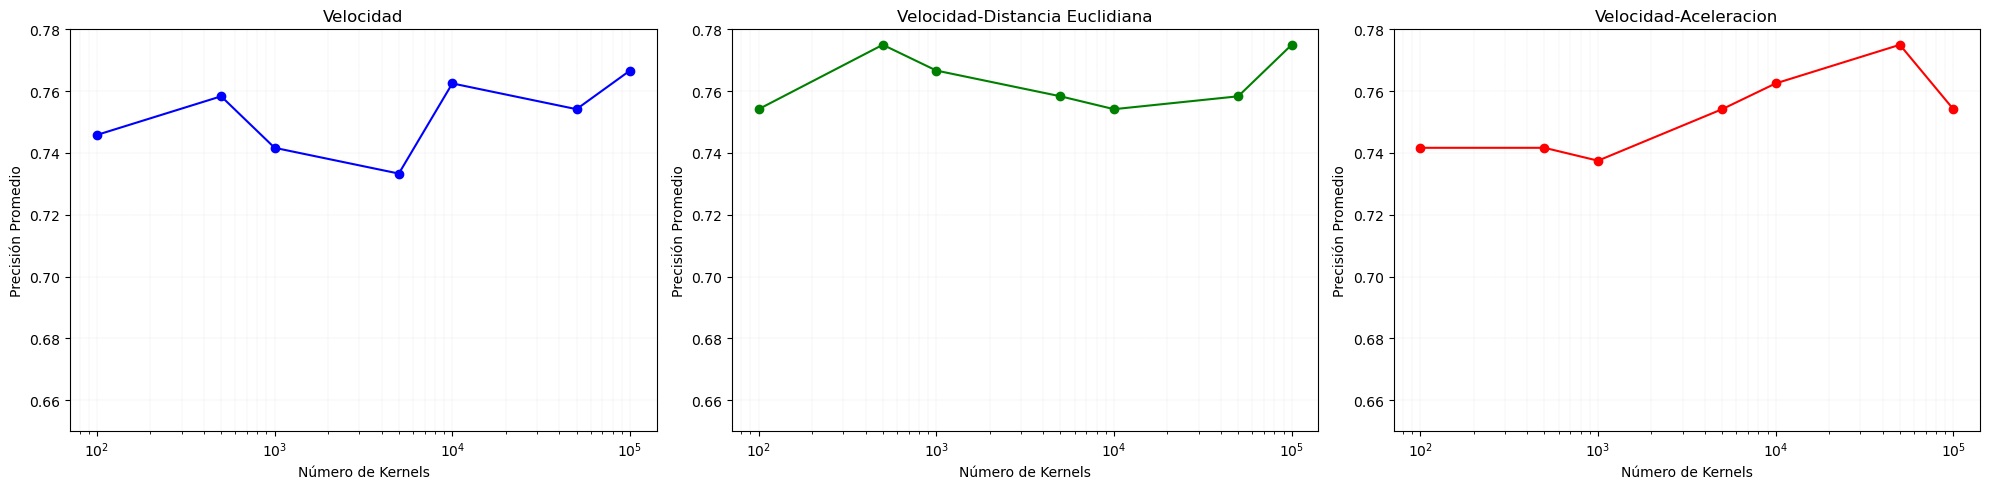

In [587]:
# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 fila, 4 columnas
colores = ['b', 'g', 'r', 'c']

y_lim_inferior = 0.65
y_lim_superior = 0.78

axs[0].plot(numeroKernels, [np.mean(valores) for valores in arrayVelocidad], marker='o', linestyle='-', color=colores[0])
axs[0].set_title('Velocidad')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].set_ylim(y_lim_inferior, y_lim_superior)
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot
axs[1].plot(numeroKernels, [np.mean(valores) for valores in arrayDistanciaEuclidiana], marker='o', linestyle='-', color=colores[1])
axs[1].set_title('Velocidad-Distancia Euclidiana')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].set_ylim(y_lim_inferior, y_lim_superior)
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

# Tercer subplot
axs[2].plot(numeroKernels, [np.mean(valores) for valores in arrayAceleraciones], marker='o', linestyle='-', color=colores[2])
axs[2].set_title('Velocidad-Aceleracion')
axs[2].set_xlabel('Número de Kernels')
axs[2].set_ylabel('Precisión Promedio')
axs[2].set_xscale('log')
axs[2].set_ylim(y_lim_inferior, y_lim_superior)
axs[2].grid(True, which="both", ls="--", linewidth=0.1)



# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

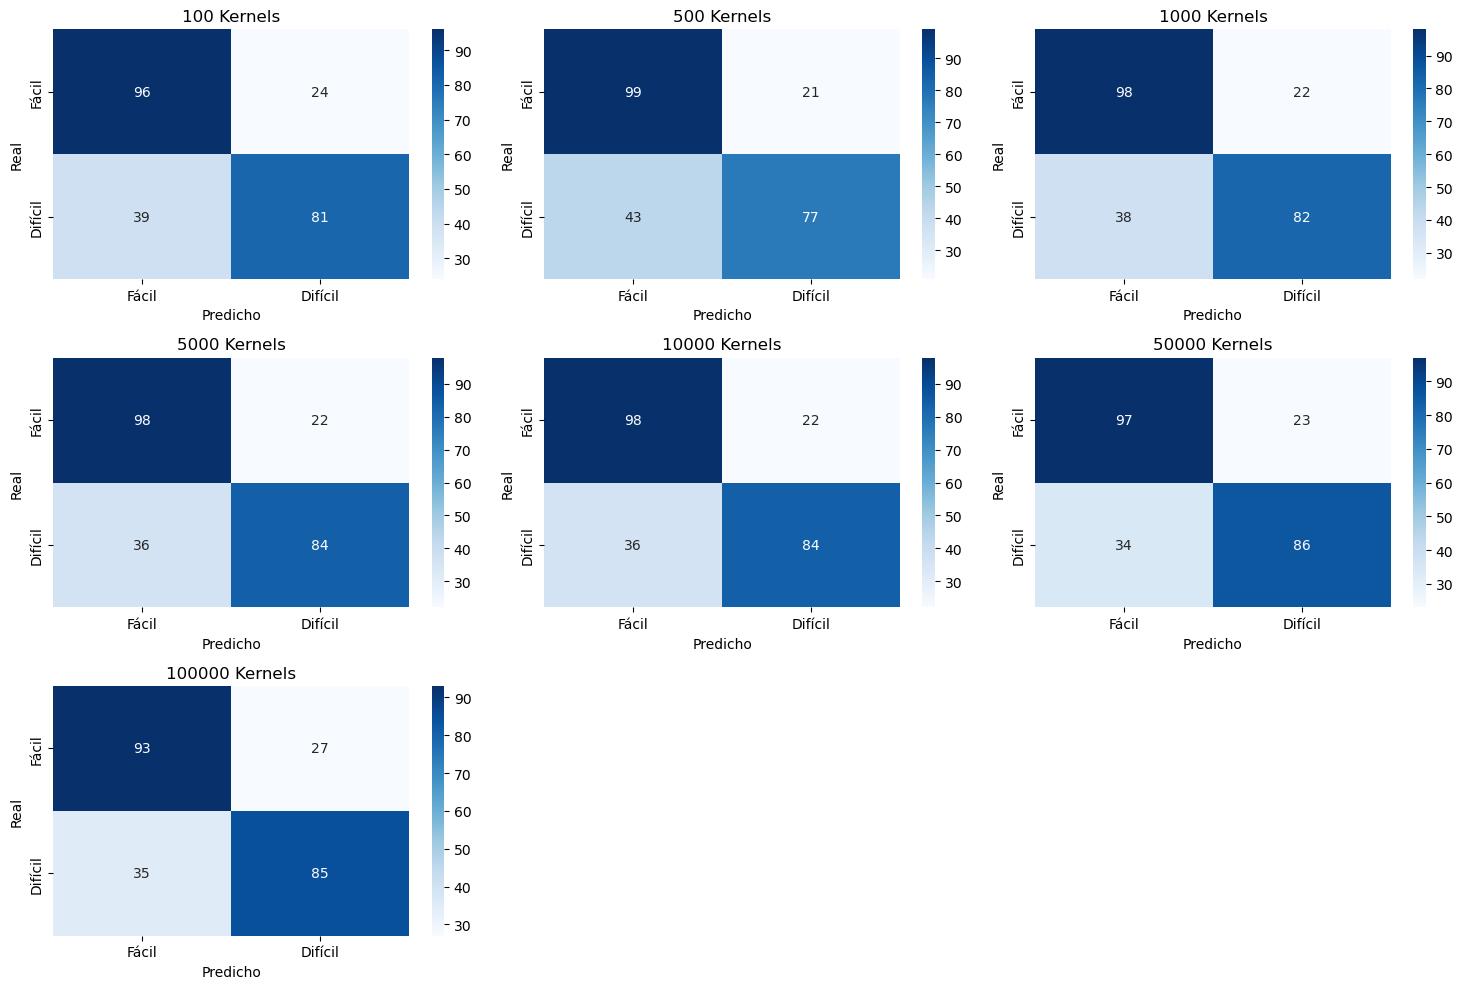

In [585]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionArrayAceleraciones = {
    100: np.array([[96, 24], [39, 81]]),
    500: np.array([[99, 21], [43, 77]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[98, 22], [38, 82]]),
    5000: np.array([[98, 22], [36, 84]]),
    10000: np.array([[98, 22], [36, 84]]),
    50000: np.array([[97, 23], [34, 86]]),
    100000: np.array([[93, 27], [35, 85]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayAceleraciones)

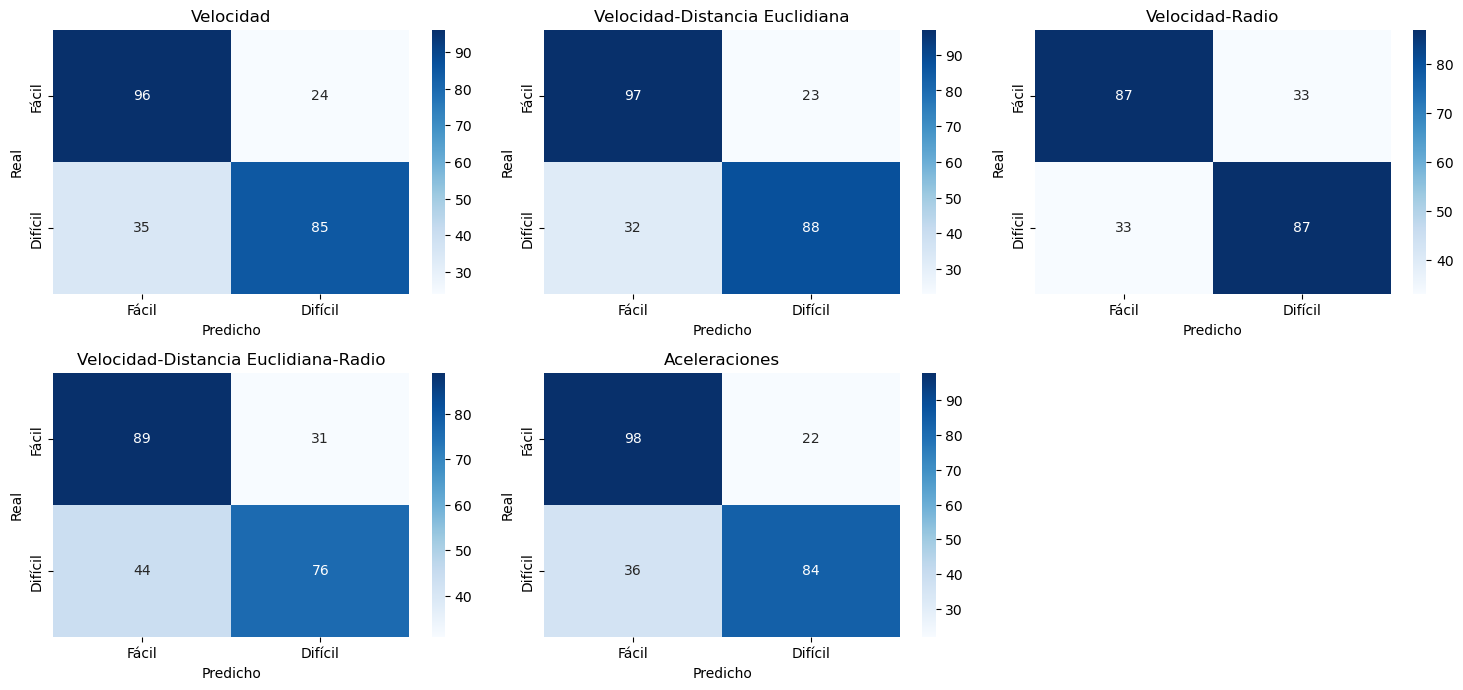

In [632]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = ["Velocidad", "Velocidad-Distancia Euclidiana", "Velocidad-Radio", "Velocidad-Distancia Euclidiana-Radio", "Aceleraciones"]
matrices_confusionArrayRadio = {
    "Velocidad": np.array([[96, 24], [35, 85]]),
    'Velocidad-Distancia Euclidiana':  np.array([[97, 23], [32, 88]]), 
    'Velocidad-Radio': np.array([[87, 33], [33, 87]]),  
    "Velocidad-Distancia Euclidiana-Radio": np.array([[89, 31], [44, 76]]),
    "Aceleraciones": np.array([[98, 22], [36, 84]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayRadio)

<h1 style="font-size:16px;">"ANALISIS NUEVO FEATURE ACELERACION JUNTO CON DISTANCIA EUCLIDIANA"</h1>

In [473]:
datos_transformados = []
etiquetas = []

def obtener_etiqueta(nombre_archivo):
    if 'Facil' in nombre_archivo:
        return 'facil'
    elif 'Dificil' in nombre_archivo:
        return 'dificil'
    else:
        return 'desconocido'

# Determinar el número máximo de coordenadas en X y Y para nombrar las columnas
max_len_x = max([df.shape[0] for df in series_estiradas.values()])
nombres_columnas = ['X{}'.format(i+1) for i in range(max_len_x)] + ['Y{}'.format(i+1) for i in range(max_len_x)]

# Transformar cada serie y almacenar los datos transformados y las etiquetas
for archivo, df in series_estiradas.items():
    # Obtener la etiqueta de la serie
  
    etiqueta = obtener_etiqueta(archivo)
    
    # Aplanar las series X e Y en un solo arreglo o lista
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Asegurarse de que cada serie tenga la misma longitud
    datos_serie.extend([np.nan] * (2 * max_len_x - len(datos_serie)))
    
    # Agregar los datos transformados y la etiqueta a las listas
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

# Crear el DataFrame final con nombres de columnas
df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

# Mostrar el DataFrame final
num_columnas_mostrar = 2

# Obtener las primeras y últimas columnas a mostrar
columnas_iniciales = df_final.columns[:num_columnas_mostrar].tolist()
columnas_finales = df_final.columns[-num_columnas_mostrar-1:].tolist()  # -1 para incluir la columna de etiquetas

# Combinar las columnas seleccionadas
columnas_seleccionadas = columnas_iniciales + columnas_finales

# Mostrar las columnas seleccionadas del DataFrame
print(df_final[columnas_seleccionadas])

# Assuming max_len_velocity represents the maximum length of velocity data across all series
max_len_velocity = max([len(v) for v in velocidades_estiradas.values()])
nombres_columnas += ['V{}'.format(i+1) for i in range(max_len_velocity)]

datos_transformados = []
etiquetas = []

for archivo, df in series_estiradas.items():
    etiqueta = obtener_etiqueta(archivo)
    
    # Flatten X, Y, and velocity series into a single list
    datos_serie = df['x'].tolist() + df['y'].tolist()
    
    # Retrieve the corresponding velocity data and flatten
    velocidad_serie = velocidades_estiradas[archivo].tolist()
    
    # Ensure each series (X, Y, velocity) has the same length
    total_length = 2 * max_len_x + max_len_velocity
    datos_serie.extend(velocidad_serie + [np.nan] * (total_length - len(datos_serie) - len(velocidad_serie)))
    
    datos_transformados.append(datos_serie)
    etiquetas.append(etiqueta)

df_final = pd.DataFrame(datos_transformados, columns=nombres_columnas)
df_final['etiqueta'] = etiquetas

        X1          X2       Y8020  Y8021 etiqueta
0    410.0  388.271571  408.938279  404.0    facil
1    525.0  530.957357  289.042643  295.0  dificil
2    367.0  362.059850  359.463748  358.0  dificil
3    486.0  492.910100  450.038529  453.0  dificil
4    546.0  547.897257  290.359601  297.0  dificil
..     ...         ...         ...    ...      ...
235  344.0  338.073317  330.743392  310.0    facil
236  565.5  586.750686  310.046384  314.0  dificil
237  506.0  490.187531  155.533521  157.0  dificil
238  604.0  608.950125  256.860349  243.0    facil
239  630.0  630.000000  414.880939  416.0  dificil

[240 rows x 5 columns]


In [474]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Asumiendo que tienes un diccionario de DataFrames con tus series originales
series_originales = series_resampled
# Paso 1: Calcular el promedio de X e Y para cada serie de tiempo
promedios = {key: (df['x'].mean(), df['y'].mean()) for key, df in series_originales.items()}

# Paso 2: Calcular la distancia euclidiana para cada punto en la serie respecto al promedio
distancias_euclidianas = {}
for key, df in series_originales.items():
    promedio_x, promedio_y = promedios[key]
    distancias = np.sqrt((df['x'] - promedio_x) ** 2 + (df['y'] - promedio_y) ** 2)
    distancias_euclidianas[key] = distancias

# Paso 3: Realizar el stretching de las distancias euclidianas
max_longitud = max(len(distancias) for distancias in distancias_euclidianas.values())
distancias_estiradas = {}
for key, distancias in distancias_euclidianas.items():
    x_original = np.linspace(0, 1, len(distancias))
    x_stretch = np.linspace(0, 1, max_longitud)
    interpolator = interp1d(x_original, distancias, kind='linear', fill_value="extrapolate")
    distancias_estiradas[key] = interpolator(x_stretch)



# Paso 4: Construir un nuevo DataFrame para las distancias y luego concatenar
distancias_df = pd.DataFrame({f'D{j}': np.nan for j in range(1, max_longitud + 1)}, index=df_final.index)
for i, distancias in enumerate(distancias_estiradas.values()):
    distancias_df.iloc[i, :len(distancias)] = distancias  # Uso de .iloc en lugar de .loc

df_final_sin_etiqueta = df_final.drop('etiqueta', axis=1)
df_final_con_distancias = pd.concat([df_final_sin_etiqueta, distancias_df], axis=1)

# Añadir la columna de etiquetas al final
df_final_con_distancias['etiqueta'] = df_final['etiqueta']

df_final_con_distancias_y_aceleraciones = pd.concat([df_final_sin_etiqueta, distancias_df, aceleraciones_df, df_final[['etiqueta']]], axis=1)

In [483]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Asumiendo que rocket_functions está disponible y tiene las funciones necesarias
from rocket_functions import generate_kernels, apply_kernels

# Extracción de características y etiquetas
X = df_final_con_aceleraciones.drop('etiqueta', axis=1).values  # Datos de series de tiempo
y = df_final_con_aceleraciones['etiqueta'].values  # Etiquetas

# Generación de kernels de ROCKET y transformación de los datos
num_kernels = 1000 # Puedes ajustar este número según necesidades
kernels = generate_kernels(X.shape[1], num_kernels)
X_transformed = apply_kernels(X, kernels)

# Creación del clasificador Ridge con pipeline para incluir la normalización
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Aplicación de cross-validation
cv_scores = cross_val_score(pipeline, X_transformed, y, cv=10)  # cv es el número de pliegues

# Imprimir los resultados de cross-validation
print(f'Scores de cross-validation: {cv_scores}')
print(f'Promedio de los scores: {np.mean(cv_scores)}')
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que la transformación ROCKET ya se ha realizado y X_transformed está listo
# y las etiquetas están en y

# Crear un pipeline que incluya el escalado y el clasificador
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Realizar predicciones mediante validación cruzada
y_pred = cross_val_predict(pipeline, X_transformed, y, cv=10)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred, labels=["facil", "dificil"])

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Scores de cross-validation: [0.70833333 0.66666667 0.79166667 0.75       0.79166667 0.75
 0.75       0.875      0.66666667 0.75      ]
Promedio de los scores: 0.75
Matriz de confusión:
[[99 21]
 [37 83]]


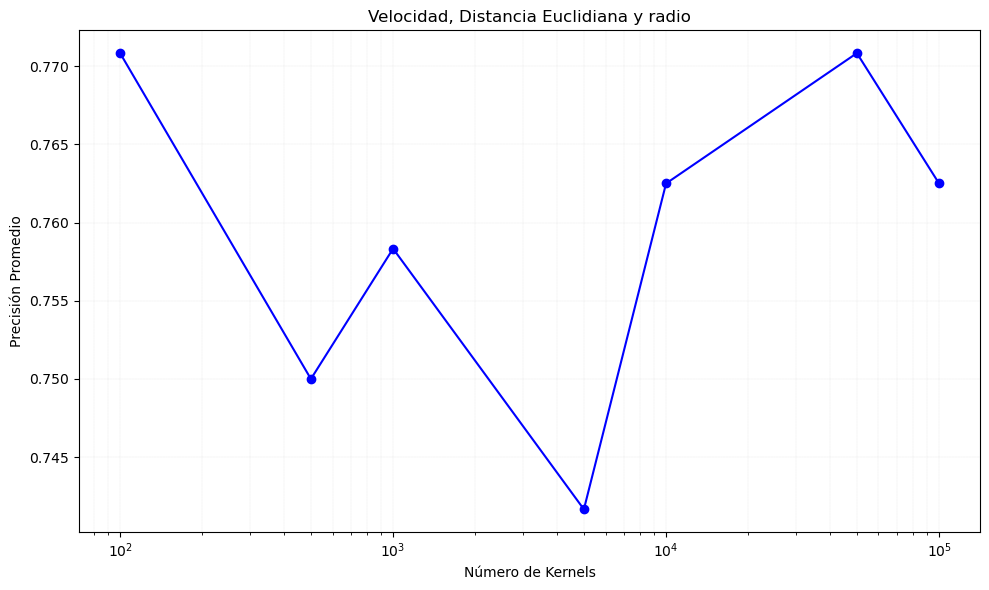

In [590]:
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]

arrayAceleracionesDistancias = [[0.70833333, 0.83333333, 0.83333333, 0.70833333, 0.83333333, 0.79166667,
0.75, 0.79166667, 0.70833333, 0.75], [0.70833333, 0.70833333, 0.83333333, 0.70833333, 0.83333333, 0.70833333,
0.75, 0.79166667, 0.70833333, 0.75], [0.70833333, 0.75, 0.79166667, 0.75, 0.83333333, 0.79166667,
0.70833333, 0.79166667, 0.70833333, 0.75],[0.70833333, 0.70833333, 0.75, 0.70833333, 0.83333333, 0.70833333,
0.79166667, 0.79166667, 0.70833333, 0.70833333], [0.79166667, 0.70833333, 0.79166667, 0.79166667, 0.79166667, 0.70833333,
0.79166667, 0.79166667, 0.70833333, 0.75], [0.70833333, 0.75, 0.83333333, 0.79166667, 0.79166667, 0.70833333,
0.875, 0.875, 0.66666667, 0.70833333], [0.70833333, 0.70833333, 0.79166667, 0.75, 0.79166667, 0.75,
0.75, 0.875, 0.75, 0.75]]


promedios = [np.mean(valores) for valores in arrayAceleracionesDistancias]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(numKernels, promedios, marker='o', linestyle='-', color='b')
plt.title('Velocidad, Distancia Euclidiana y radio')
plt.xlabel('Número de Kernels')
plt.ylabel('Precisión Promedio')
plt.xscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

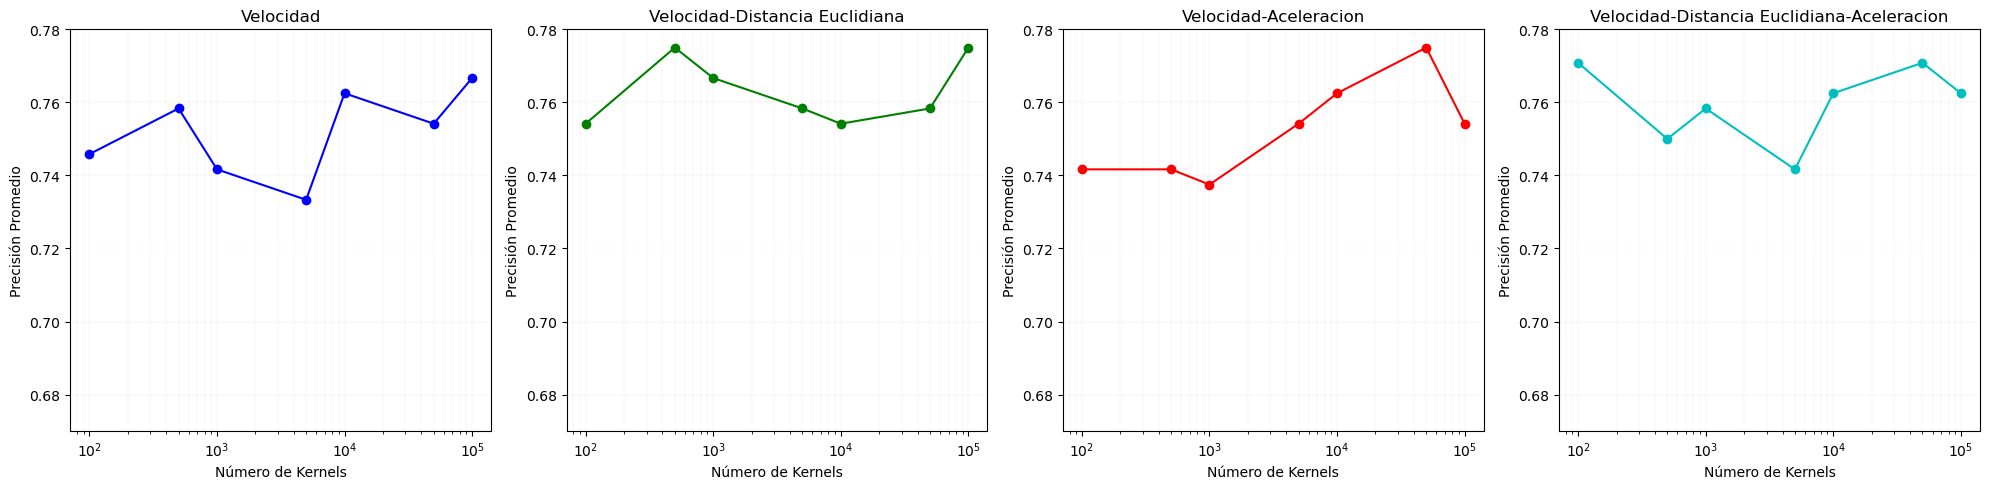

In [591]:
# Crear la figura y los ejes para los subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila, 4 columnas

# Colores para cada subplot
colores = ['b', 'g', 'r', 'c']

y_lim_inferior = 0.67
y_lim_superior = 0.78

axs[0].plot(numeroKernels, [np.mean(valores) for valores in arrayVelocidad], marker='o', linestyle='-', color=colores[0])
axs[0].set_title('Velocidad')
axs[0].set_xlabel('Número de Kernels')
axs[0].set_ylabel('Precisión Promedio')
axs[0].set_xscale('log')
axs[0].set_ylim(y_lim_inferior, y_lim_superior)
axs[0].grid(True, which="both", ls="--", linewidth=0.1)

# Segundo subplot
axs[1].plot(numeroKernels, [np.mean(valores) for valores in arrayDistanciaEuclidiana], marker='o', linestyle='-', color=colores[1])
axs[1].set_title('Velocidad-Distancia Euclidiana')
axs[1].set_xlabel('Número de Kernels')
axs[1].set_ylabel('Precisión Promedio')
axs[1].set_xscale('log')
axs[1].set_ylim(y_lim_inferior, y_lim_superior)
axs[1].grid(True, which="both", ls="--", linewidth=0.1)

# Tercer subplot
axs[2].plot(numeroKernels, [np.mean(valores) for valores in arrayAceleraciones], marker='o', linestyle='-', color=colores[2])
axs[2].set_title('Velocidad-Aceleracion')
axs[2].set_xlabel('Número de Kernels')
axs[2].set_ylabel('Precisión Promedio')
axs[2].set_xscale('log')
axs[2].set_ylim(y_lim_inferior, y_lim_superior)
axs[2].grid(True, which="both", ls="--", linewidth=0.1)

# Cuarto subplot
axs[3].plot(numeroKernels, [np.mean(valores) for valores in arrayAceleracionesDistancias], marker='o', linestyle='-', color=colores[3])
axs[3].set_title('Velocidad-Distancia Euclidiana-Aceleracion')
axs[3].set_xlabel('Número de Kernels')
axs[3].set_ylabel('Precisión Promedio')
axs[3].set_xscale('log')
axs[3].set_ylim(y_lim_inferior, y_lim_superior)
axs[3].grid(True, which="both", ls="--", linewidth=0.1)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

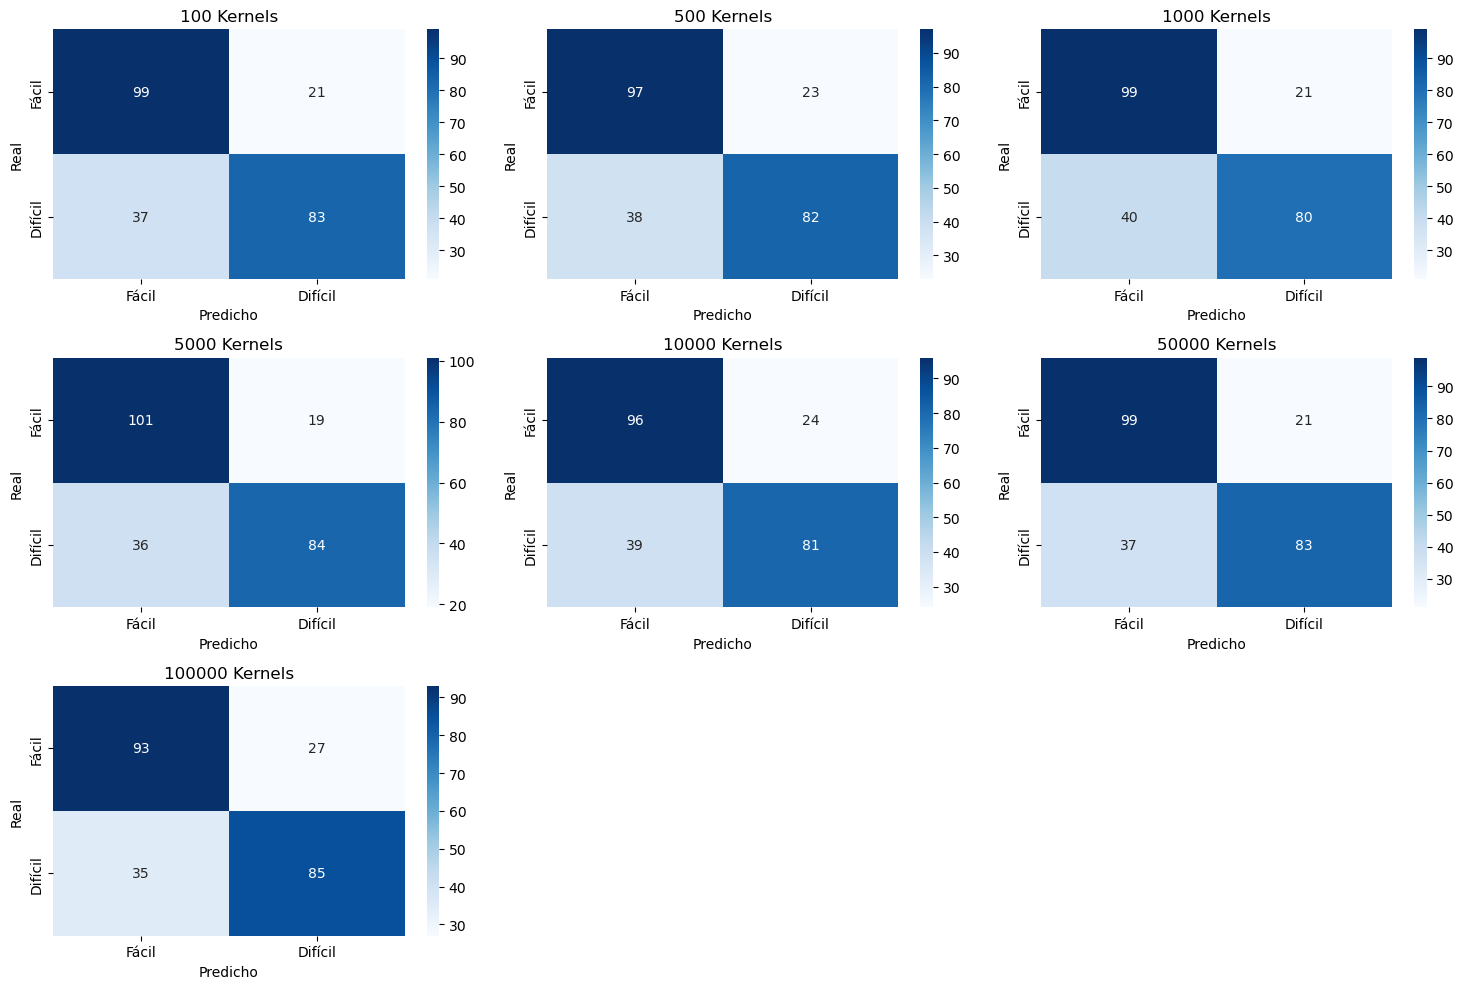

In [592]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = [100, 500, 1000, 5000, 10000, 50000, 100000]
matrices_confusionArrayAceleracionesDistancias = {
    100: np.array([[99, 21], [37, 83]]),
    500: np.array([[97, 23], [38, 82]]),  # Modifica estas matrices con tus datos reales
    1000: np.array([[99, 21], [40, 80]]),
    5000: np.array([[101, 19], [36, 84]]),
    10000: np.array([[96, 24], [39, 81]]),
    50000: np.array([[99, 21], [37, 83]]),
    100000: np.array([[93, 27], [35, 85]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(confusion_matrices[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel} Kernels')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayAceleracionesDistancias)

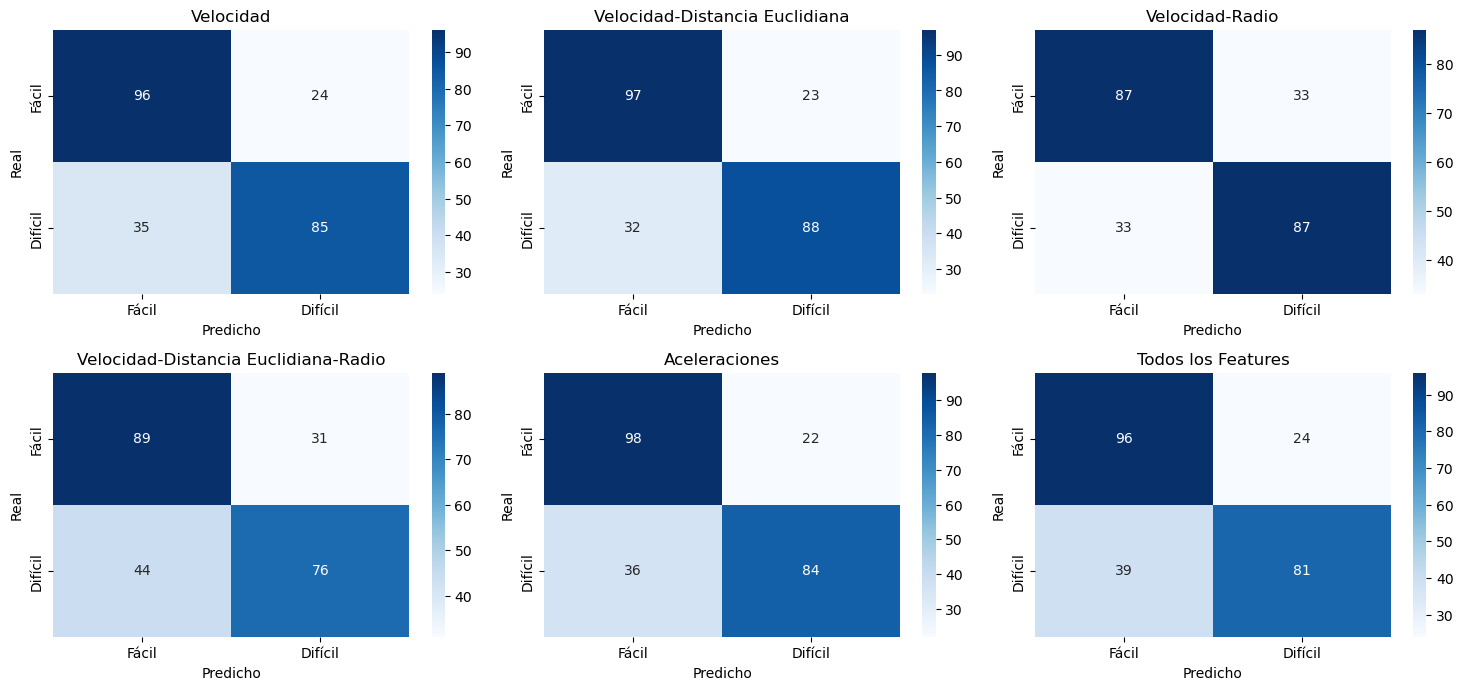

In [635]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Números de kernels y matrices de confusión de ejemplo
numeroKernels = ["Velocidad", "Velocidad-Distancia Euclidiana", "Velocidad-Radio", "Velocidad-Distancia Euclidiana-Radio", "Aceleraciones", "Todos los Features"]
matrices_confusionArrayRadio = {
    "Velocidad": np.array([[96, 24], [35, 85]]),
    'Velocidad-Distancia Euclidiana':  np.array([[97, 23], [32, 88]]), 
    'Velocidad-Radio': np.array([[87, 33], [33, 87]]),  
    "Velocidad-Distancia Euclidiana-Radio": np.array([[89, 31], [44, 76]]),
    "Aceleraciones": np.array([[98, 22], [36, 84]]),
    "Todos los Features": np.array([[96, 24], [39, 81]]),
}

def plot_confusion_matrices(kernels, confusion_matrices):
    # Definir el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Crear un subplot para cada matriz de confusión
    for i, kernel in enumerate(kernels):
        plt.subplot(3, 3, i + 1)  # Ajusta las dimensiones de la grilla de subplots según necesites
        sns.heatmap(matrices_confusionArrayRadio[kernel], annot=True, fmt="d", cmap='Blues')
        plt.title(f'{kernel}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.xticks([0.5, 1.5], ['Fácil', 'Difícil'])
        plt.yticks([0.5, 1.5], ['Fácil', 'Difícil'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(numeroKernels, matrices_confusionArrayRadio)

<h1 style="font-size:20px;">"CORRELACIONES"</h1>

<h1 style="font-size:16px;">"Distancias euclidianas y radio"</h1>

In [622]:
import numpy as np

# Suponiendo que distancias_estiradas y radios_estirados tienen las mismas claves
correlaciones = {}

for key in distancias_estiradas.keys():
    if key in radios_estirados:
        # Asegurándonos de que ambos arrays tengan la misma longitud
        longitud_minima = min(len(distancias_estiradas[key]), len(radios_estirados[key]))
        distancias = distancias_estiradas[key][:longitud_minima]
        radios = radios_estirados[key][:longitud_minima]
        
        # Calcular la correlación
        correlacion = np.corrcoef(distancias, radios)[0, 1]
        correlaciones[key] = correlacion

# Imprimir las correlaciones para cada serie de tiempo
for key, value in correlaciones.items():
    print(f"Correlación entre distancias y radios para {key}: {value}")




Correlación entre distancias y radios para P26-SecuencialFacil-01-05-2024-T12-40-05.334.txt: 0.9752638964073462
Correlación entre distancias y radios para P21-SecuencialDificil-12-22-2023-T09-40-24.301.txt: 0.9543153650606079
Correlación entre distancias y radios para P26-VerbalDificil-01-05-2024-T12-24-47.488.txt: 0.9692302719240747
Correlación entre distancias y radios para P27-NumericoDificil-02-19-2024-T14-26-46.331.txt: 0.9646139535099999
Correlación entre distancias y radios para P16-VerbalDificil-12-19-2023-T14-59-50.152.txt: 0.9708212033590817
Correlación entre distancias y radios para P12-SecuencialFacil-12-15-2023-T14-48-02.130.txt: 0.9854876270882418
Correlación entre distancias y radios para P31-SecuencialFacil-02-09-2024-T07-54-43.694.txt: 0.9837178068433314
Correlación entre distancias y radios para P33-SecuencialDificil-02-05-2024-T15-39-22.420.txt: 0.9918623322729931
Correlación entre distancias y radios para P8-SecuencialFacil-12-14-2023-T11-36-00.73.txt: 0.96607552006

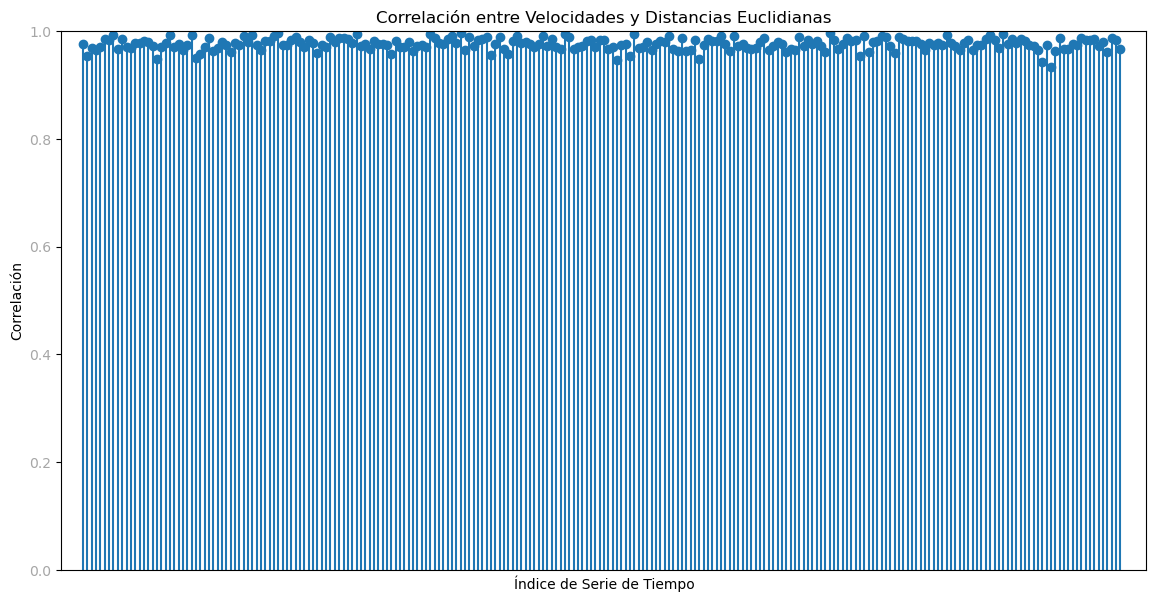

In [604]:
import matplotlib.pyplot as plt

# Suponiendo que 'correlaciones' es tu diccionario de correlaciones

values = list(correlaciones.values())

# Crear el gráfico 'stem' con las correlaciones
plt.figure(figsize=(14, 7))
(markerline, stemlines, baseline) = plt.stem(correlaciones.keys(), values)
plt.setp(baseline, visible=False)  # Ocultar la línea base

plt.xlabel('Índice de Serie de Tiempo')
plt.ylabel('Correlación')
plt.title('Correlación entre Velocidades y Distancias Euclidianas')
plt.xticks([])  # Ocultar las etiquetas del eje x si es necesario
plt.yticks(color='grey', alpha=0.7)  # Personalizar las marcas del eje y para que sean más sutiles

# Establecer los límites del eje X y Y para que coincidan con el rango de -1 a 1 en correlaciones
plt.xlim(-5, len(correlaciones.keys()) + 5)
plt.ylim(0, 1)

plt.show()

<h1 style="font-size:16px;">"Velocidades y aceleraciones"</h1>

In [621]:
import numpy as np

# Suponiendo que velocidades_estiradas y aceleraciones_estiradas tienen las mismas claves
correlaciones_vel_acel = {}

for key in velocidades_estiradas.keys():
    if key in aceleraciones_estiradas:
        # Asegurándonos de que ambos arrays tengan la misma longitud
        longitud_minima = min(len(velocidades_estiradas[key]), len(aceleraciones_estiradas[key]))
        velocidades = velocidades_estiradas[key][:longitud_minima]
        aceleraciones = aceleraciones_estiradas[key][:longitud_minima]
        
        # Calcular la correlación
        correlacion = np.corrcoef(velocidades, aceleraciones)[0, 1]
        correlaciones_vel_acel[key] = correlacion

# Imprimir las correlaciones para cada serie de tiempo
for key, value in correlaciones_vel_acel.items():
    print(f"Correlación entre velocidades y aceleraciones para {key}: {value}")


Correlación entre velocidades y aceleraciones para P1-NumericoDificil-02-08-2024-T11-47-20.498.txt: -0.011053922882948207
Correlación entre velocidades y aceleraciones para P1-NumericoFacil-02-08-2024-T11-49-55.568.txt: 0.013092577548197804
Correlación entre velocidades y aceleraciones para P1-SecuencialDificil-02-08-2024-T11-39-29.285.txt: 0.008844886107699889
Correlación entre velocidades y aceleraciones para P1-SecuencialFacil-02-08-2024-T11-34-56.743.txt: 0.028926464802370485
Correlación entre velocidades y aceleraciones para P1-VerbalDificil-02-08-2024-T11-41-49.49.txt: -0.01968363983940806
Correlación entre velocidades y aceleraciones para P1-VerbalFacil-02-08-2024-T11-44-58.825.txt: -0.01708340390219732
Correlación entre velocidades y aceleraciones para P10-NumericoDificil-12-15-2023-T09-12-54.44.txt: 0.018766791878405173
Correlación entre velocidades y aceleraciones para P10-NumericoFacil-12-15-2023-T09-06-20.902.txt: -0.005695862527729217
Correlación entre velocidades y aceler

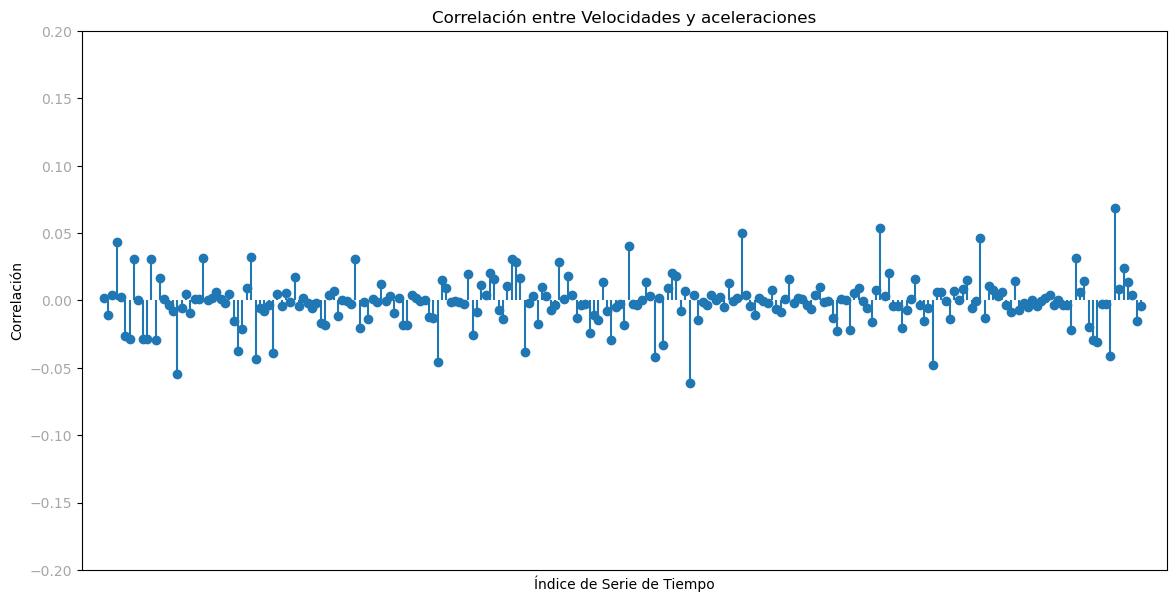

In [620]:
import matplotlib.pyplot as plt

# Suponiendo que 'correlaciones' es tu diccionario de correlaciones

values = list(correlaciones_vel_acel.values())

# Crear el gráfico 'stem' con las correlaciones
plt.figure(figsize=(14, 7))
(markerline, stemlines, baseline) = plt.stem(correlaciones_vel_acel.keys(), values)
plt.setp(baseline, visible=False)  # Ocultar la línea base

plt.xlabel('Índice de Serie de Tiempo')
plt.ylabel('Correlación')
plt.title('Correlación entre Velocidades y aceleraciones')
plt.xticks([])  # Ocultar las etiquetas del eje x si es necesario
plt.yticks(color='grey', alpha=0.7)  # Personalizar las marcas del eje y para que sean más sutiles

# Establecer los límites del eje X y Y para que coincidan con el rango de -1 a 1 en correlaciones
plt.xlim(-5, len(correlaciones.keys()) + 5)
plt.ylim(-0.2, 0.2)

plt.show()

In [612]:
import numpy as np

# Suponiendo que velocidades_estiradas y distancias_estiradas tienen las mismas claves
correlaciones_vel_dist = {}

for key in velocidades_estiradas.keys():
    if key in distancias_estiradas:
        # Asegurándonos de que ambos arrays tengan la misma longitud
        longitud_minima = min(len(velocidades_estiradas[key]), len(distancias_estiradas[key]))
        velocidades = velocidades_estiradas[key][:longitud_minima]
        distancias = distancias_estiradas[key][:longitud_minima]
        
        # Calcular la correlación
        correlacion = np.corrcoef(velocidades, distancias)[0, 1]
        correlaciones_vel_dist[key] = correlacion

# Imprimir las correlaciones para cada serie de tiempo
for key, value in correlaciones_vel_dist.items():
    print(f"Correlación entre velocidades y distancias para {key}: {value}")


Correlación entre velocidades y distancias para P1-NumericoDificil-02-08-2024-T11-47-20.498.txt: 0.16882936855469244
Correlación entre velocidades y distancias para P1-NumericoFacil-02-08-2024-T11-49-55.568.txt: 0.08530657414707617
Correlación entre velocidades y distancias para P1-SecuencialDificil-02-08-2024-T11-39-29.285.txt: 0.17080396981053625
Correlación entre velocidades y distancias para P1-SecuencialFacil-02-08-2024-T11-34-56.743.txt: 0.33513807805314916
Correlación entre velocidades y distancias para P1-VerbalDificil-02-08-2024-T11-41-49.49.txt: -0.170030768656214
Correlación entre velocidades y distancias para P1-VerbalFacil-02-08-2024-T11-44-58.825.txt: 0.15414092770583834
Correlación entre velocidades y distancias para P10-NumericoDificil-12-15-2023-T09-12-54.44.txt: 0.12451339145082183
Correlación entre velocidades y distancias para P10-NumericoFacil-12-15-2023-T09-06-20.902.txt: 0.4019921439400319
Correlación entre velocidades y distancias para P10-SecuencialDificil-12-1

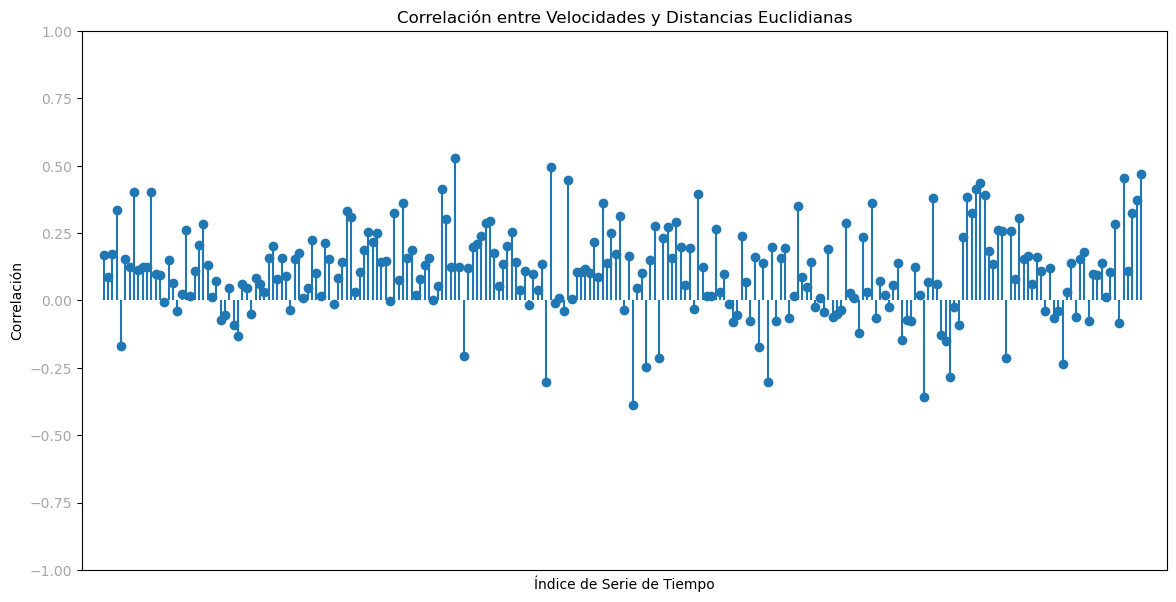

In [609]:
import matplotlib.pyplot as plt

# Suponiendo que 'correlaciones' es tu diccionario de correlaciones

values = list(correlaciones_vel_dist.values())

# Crear el gráfico 'stem' con las correlaciones
plt.figure(figsize=(14, 7))
(markerline, stemlines, baseline) = plt.stem(correlaciones_vel_dist.keys(), values)
plt.setp(baseline, visible=False)  # Ocultar la línea base

plt.xlabel('Índice de Serie de Tiempo')
plt.ylabel('Correlación')
plt.title('Correlación entre Velocidades y Distancias Euclidianas')
plt.xticks([])  # Ocultar las etiquetas del eje x si es necesario
plt.yticks(color='grey', alpha=0.7)  # Personalizar las marcas del eje y para que sean más sutiles

# Establecer los límites del eje X y Y para que coincidan con el rango de -1 a 1 en correlaciones
plt.xlim(-5, len(correlaciones.keys()) + 5)
plt.ylim(-1, 1)

plt.show()

In [640]:
import numpy as np

# Suponiendo que velocidades_estiradas y aceleraciones_estiradas tienen las mismas claves
correlaciones_vel_acel_dist = {}

for key in velocidades_estiradas.keys():
    if key in aceleraciones_estiradas:
        # Asegurándonos de que ambos arrays tengan la misma longitud
        longitud_minima = min(len(aceleraciones_estiradas[key]), len(distancias_estiradas[key]))
        velocidades = aceleraciones_estiradas[key][:longitud_minima]
        aceleraciones = distancias_estiradas[key][:longitud_minima]
        
        # Calcular la correlación
        correlacion = np.corrcoef(velocidades, aceleraciones)[0, 1]
        correlaciones_vel_acel_dist[key] = correlacion

# Imprimir las correlaciones para cada serie de tiempo
for key, value in correlaciones_vel_acel_dist.items():
    print(f"Correlación entre distancias y aceleraciones para {key}: {value}")

Correlación entre distancias y aceleraciones para P1-NumericoDificil-02-08-2024-T11-47-20.498.txt: 0.0021038675924548414
Correlación entre distancias y aceleraciones para P1-NumericoFacil-02-08-2024-T11-49-55.568.txt: -0.01112081550695077
Correlación entre distancias y aceleraciones para P1-SecuencialDificil-02-08-2024-T11-39-29.285.txt: 0.003761371704246151
Correlación entre distancias y aceleraciones para P1-SecuencialFacil-02-08-2024-T11-34-56.743.txt: 0.043658633231476056
Correlación entre distancias y aceleraciones para P1-VerbalDificil-02-08-2024-T11-41-49.49.txt: 0.0027723896498877414
Correlación entre distancias y aceleraciones para P1-VerbalFacil-02-08-2024-T11-44-58.825.txt: -0.026504920854276796
Correlación entre distancias y aceleraciones para P10-NumericoDificil-12-15-2023-T09-12-54.44.txt: -0.028612952441942546
Correlación entre distancias y aceleraciones para P10-NumericoFacil-12-15-2023-T09-06-20.902.txt: 0.030563110867084724
Correlación entre distancias y aceleraciones

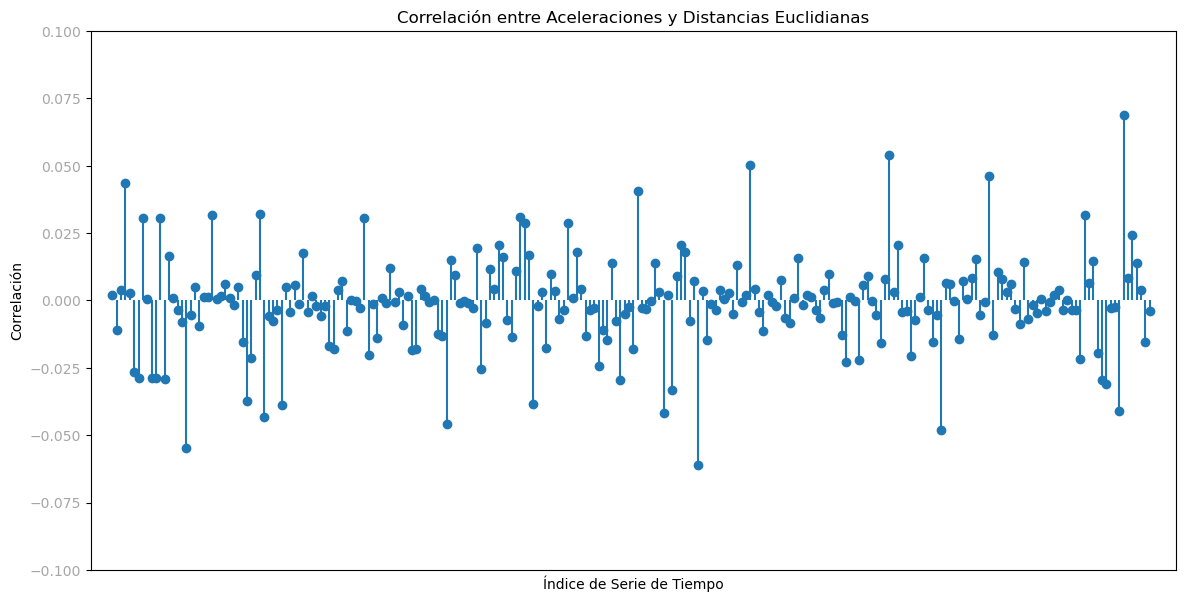

In [643]:
import matplotlib.pyplot as plt

# Suponiendo que 'correlaciones' es tu diccionario de correlaciones

values = list(correlaciones_vel_acel_dist.values())

# Crear el gráfico 'stem' con las correlaciones
plt.figure(figsize=(14, 7))
(markerline, stemlines, baseline) = plt.stem(correlaciones_vel_acel_dist.keys(), values)
plt.setp(baseline, visible=False)  # Ocultar la línea base

plt.xlabel('Índice de Serie de Tiempo')
plt.ylabel('Correlación')
plt.title('Correlación entre Aceleraciones y Distancias Euclidianas')
plt.xticks([])  # Ocultar las etiquetas del eje x si es necesario
plt.yticks(color='grey', alpha=0.7)  # Personalizar las marcas del eje y para que sean más sutiles

# Establecer los límites del eje X y Y para que coincidan con el rango de -1 a 1 en correlaciones
plt.xlim(-5, len(correlaciones_vel_acel_dist.keys()) + 5)
plt.ylim(-0.1, 0.1)

plt.show()